In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
# mpl.rcParams['font.family'] = 'STIXGeneral'
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['font.size'] = 12

## FV tests with $L_0 = L$

In [2]:
xm_values = [0.0, 0.0209150326797386, 0.0418300653594772, 0.0627450980392158, 0.0836601307189544, 0.104575163398693, 0.1254901960784316, 0.1464052287581702, 0.1673202614379088, 0.1882352941176474, 0.209150326797386, 0.2300653594771246, 0.2509803921568632, 0.2718954248366018, 0.2928104575163404, 0.313725490196079, 0.3346405228758176, 0.3555555555555562, 0.3764705882352948, 0.3973856209150334, 0.418300653594772, 0.4392156862745106, 0.4601307189542492, 0.4810457516339878, 0.5019607843137264, 0.522875816993465, 0.5437908496732036, 0.5647058823529422, 0.5856209150326808, 0.6065359477124194, 0.627450980392158, 0.6483660130718966, 0.6692810457516352, 0.6901960784313736, 0.7111111111111124, 0.7320261437908511, 0.7529411764705896, 0.773856209150328, 0.7947712418300668, 0.8156862745098055, 0.836601307189544, 0.8575163398692824, 0.8784313725490211, 0.8993464052287599, 0.9202614379084983, 0.9411764705882368, 0.9620915032679755, 0.9830065359477143, 1.0039215686274527, 1.0248366013071912, 1.04575163398693, 1.0666666666666687, 1.0875816993464071, 1.1084967320261456, 1.1294117647058843, 1.150326797385623, 1.1712418300653615, 1.1921568627451, 1.2130718954248387, 1.2339869281045774, 1.254901960784316, 1.2758169934640544, 1.2967320261437931, 1.3176470588235318, 1.3385620915032703, 1.3594771241830088, 1.3803921568627473, 1.4013071895424862, 1.4222222222222247, 1.4431372549019632, 1.4640522875817021, 1.4849673202614406, 1.5058823529411791, 1.5267973856209176, 1.547712418300656, 1.568627450980395, 1.5895424836601335, 1.610457516339872, 1.631372549019611, 1.6522875816993494, 1.673202614379088, 1.6941176470588264, 1.7150326797385649, 1.7359477124183038, 1.7568627450980423, 1.7777777777777808, 1.7986928104575197, 1.8196078431372582, 1.8405228758169967, 1.8614379084967352, 1.8823529411764737, 1.9032679738562126, 1.924183006535951, 1.9450980392156896, 1.9660130718954285, 1.986928104575167, 2.0078431372549055, 2.028758169934644, 2.0496732026143825, 2.0705882352941214, 2.09150326797386, 2.1124183006535984, 2.1333333333333373, 2.154248366013076, 2.1751633986928143, 2.1960784313725528, 2.2169934640522913, 2.23790849673203, 2.2588235294117687, 2.279738562091507, 2.300653594771246, 2.3215686274509846, 2.342483660130723, 2.3633986928104616, 2.3843137254902, 2.405228758169939, 2.4261437908496775, 2.447058823529416, 2.467973856209155, 2.4888888888888934, 2.509803921568632, 2.5307189542483703, 2.551633986928109, 2.5725490196078478, 2.5934640522875863, 2.6143790849673247, 2.6352941176470637, 2.656209150326802, 2.6771241830065406, 2.698039215686279, 2.7189542483660176, 2.739869281045756, 2.7607843137254946, 2.781699346405234, 2.8026143790849725, 2.823529411764711, 2.8444444444444494, 2.865359477124188, 2.8862745098039264, 2.907189542483665, 2.9281045751634043, 2.9490196078431428, 2.9699346405228813, 2.9908496732026197, 3.0117647058823582, 3.0326797385620967, 3.053594771241835, 3.0745098039215737, 3.095424836601312, 3.1163398692810516, 3.13725490196079, 3.1581699346405285, 3.179084967320267, 3.2000000000000055, 3.220915032679744, 3.2418300653594825, 3.262745098039222, 3.2836601307189603, 3.304575163398699, 3.3254901960784373, 3.346405228758176, 3.3673202614379143, 3.388235294117653, 3.4091503267973913, 3.4300653594771298, 3.450980392156869, 3.4718954248366076, 3.492810457516346, 3.5137254901960846, 3.534640522875823, 3.5555555555555616, 3.5764705882353, 3.5973856209150394, 3.618300653594778, 3.6392156862745164, 3.660130718954255, 3.6810457516339934, 3.701960784313732, 3.7228758169934704, 3.743790849673209, 3.7647058823529473, 3.7856209150326867, 3.806535947712425, 3.8274509803921637, 3.848366013071902, 3.8692810457516407, 3.890196078431379, 3.9111111111111176, 3.932026143790857, 3.9529411764705955, 3.973856209150334, 3.9947712418300725, 4.015686274509811, 4.0366013071895495, 4.057516339869288, 4.078431372549026, 4.099346405228765, 4.120261437908504, 4.141176470588243, 4.162091503267981, 4.18300653594772, 4.203921568627458, 4.224836601307197, 4.245751633986935, 4.266666666666675, 4.287581699346413, 4.308496732026152, 4.32941176470589, 4.3503267973856286, 4.371241830065367, 4.3921568627451055, 4.413071895424844, 4.4339869281045825, 4.454901960784322, 4.47581699346406, 4.496732026143799, 4.517647058823537, 4.538562091503276, 4.559477124183014, 4.580392156862753, 4.601307189542492, 4.622222222222231, 4.643137254901969, 4.664052287581708, 4.684967320261446, 4.705882352941185, 4.726797385620923, 4.747712418300662, 4.7686274509804, 4.7895424836601395, 4.810457516339878, 4.831372549019616, 4.852287581699355, 4.873202614379093, 4.894117647058832, 4.91503267973857, 4.93594771241831, 4.956862745098048, 4.977777777777787, 4.998692810457525, 5.019607843137264, 5.040522875817002, 5.061437908496741, 5.082352941176479, 5.103267973856218, 5.124183006535957, 5.1450980392156955, 5.166013071895434, 5.1869281045751725, 5.207843137254911, 5.2287581699346495, 5.249673202614388, 5.270588235294127, 5.291503267973866, 5.312418300653604, 5.333333333333343]
integral_values = [0.0, 0.009262620668846627, 0.016905762993954167, 0.023362071040424856, 0.02885797857186461, 0.03354824110552846, 0.03754922044401394, 0.040953078171202785, 0.043835243706541106, 0.046258858454727894, 0.048277648352147075, 0.049937894765022625, 0.05127984935912048, 0.05233878655447994, 0.05314580896178875, 0.053728478785696435, 0.05411132199880969, 0.05431623818819579, 0.05436283813924407, 0.05426872540110309, 0.054049733605432776, 0.053720128353044856, 0.05329278033166179, 0.05277931486990137, 0.052190241920483646, 0.05153506969671896, 0.05082240451496314, 0.05006003891751319, 0.04925502976983066, 0.04841376772794753, 0.04754203923645113, 0.04664508202551502, 0.04572763492713165, 0.04479398270175297, 0.043847996467124235, 0.042893170235960294, 0.04193265399913408, 0.04096928373242268, 0.04000560865553811, 0.03904391603045646, 0.03808625375059887, 0.03713445094212919, 0.03619013677264495, 0.03525475764014422, 0.03432959289577788, 0.03341576923707102, 0.03251427389363344, 0.0316259667145543, 0.03075159125542347, 0.02989178495301976, 0.02904708846696539, 0.028217954259909875, 0.027404754480941637, 0.026607788210818453, 0.025827288122162166, 0.02506342660289572, 0.024316321386841866, 0.02358604073149065, 0.02287260817942527, 0.022176006936727114, 0.021496183897384225, 0.0208330533516374, 0.02018650037362712, 0.01955638396204433, 0.018942539904984394, 0.0183447834189136, 0.01776291156983185, 0.017196705494755885, 0.016645932438884084, 0.016110347622591357, 0.015589695951294492, 0.015083713580212918, 0.01459212934511991, 0.014114666069326019, 0.013651041756353314, 0.013200970677039122, 0.012764164359146542, 0.012340332486949617, 0.01192918371770071, 0.0115304264213705, 0.011143769349574673, 0.010768922239161859, 0.010405596355531344, 0.010053504980374252, 0.009712363848185643, 0.009381891535574366, 0.009061809806986168, 0.008751843920992, 0.008451722898601938, 0.008161179758893961, 0.007879951723054578, 0.007607780389564417, 0.007344411884070343, 0.0070895969843608395, 0.006843091223831434, 0.006604654974761475, 0.006374053513235309, 0.006151057067318053, 0.005935440849976643, 0.005726985078126026, 0.0055254749790775185, 0.005330700785570619, 0.0051424577204809635, 0.004960545972214511, 0.004784770661721414, 0.004614941801992037, 0.004450874250831249, 0.004292387657645851, 0.0041393064049228675, 0.003991459545023396, 0.003848680732867544, 0.0037108081550401993, 0.0035776844558048216, 0.003449156660473146, 0.003325076096541904, 0.003205298312973749, 0.003089682997967942, 0.0029780938955370757, 0.0028703987211789396, 0.002766469076907389, 0.002666180365882649, 0.002569411706859896, 0.002476045848654772, 0.002385969084805902, 0.002299071168581317, 0.002215245228571068, 0.0021343876847600366, 0.0020563981655156785, 0.001981179425360428, 0.0019086372637166919, 0.0018386804446922566, 0.0017712206179795293, 0.0017061722409328266, 0.001643452501879528, 0.0015829812447131111, 0.001524680894808908, 0.0014684763862969326, 0.0014142950907200134, 0.0013620667470999937, 0.0013117233934296685, 0.001263199299603524, 0.0012164309017961064, 0.0011713567382919936, 0.001127917386773964, 0.0010860554030568746, 0.001045715261274209, 0.0010068432955035811, 0.0009693876428233177, 0.0009332981877883142, 0.0008985265083115722, 0.0008650258229361581, 0.0008327509394807726, 0.0008016582050408539, 0.0007717054573258969, 0.0007428519773127036, 0.0007150584431933466, 0.0006882868855959086, 0.0006625006440553825, 0.0006376643247115832, 0.0006137437592105044, 0.000590705964785165, 0.0005685191054917462, 0.0005471524545766134, 0.0005265763579496922, 0.000506762198739606, 0.00048768236290765214, 0.0004693102058857165, 0.0004516200202401982, 0.0004345870043013104, 0.00041818723176152006, 0.0004023976222077237, 0.00038719591256539636, 0.0003725606294312634, 0.0003584710622713332, 0.00034490723746143104, 0.0003318498931477242, 0.0003192804549050505, 0.00030718101217124005, 0.00029553429543598646, 0.00028432365416320663, 0.00027353303542622284, 0.00026314696323549746, 0.00025315051853905853, 0.0002435293198761556, 0.00023426950466510992, 0.00022535771110672478, 0.00021678106068504302, 0.00020852714124765137, 0.00020058399064814604, 0.00019294008093378716, 0.00018558430306177265, 0.0001785059521279816, 0.00017169471309242727, 0.00016514064698606738, 0.00015883417758401125, 0.0001527660785305521, 0.00014692746090184036, 0.00014130976119238885, 0.00013590472971197867, 0.00013070441937989457, 0.00012570113801250923, 0.00012088762233080971, 0.00011625665895902055, 0.00011180144359739437, 0.0001075153871631066, 0.00010339214360509368, 9.942560114320198e-05, 9.560987381256235e-05, 9.193929330312406e-05, 8.84084010845866e-05, 8.501194080725967e-05, 8.174485096966425e-05, 7.860225784397171e-05, 7.557946865064344e-05, 7.267196497390423e-05, 6.987539640993548e-05, 6.718557443993204e-05, 6.459846652040613e-05, 6.211019038336395e-05, 5.971700853921131e-05, 5.7415322975471324e-05, 5.5201670044617964e-05, 5.3072715534539446e-05, 5.1025249915359566e-05, 4.905618375654064e-05, 4.716254330839271e-05, 4.534146624230185e-05, 4.3590197544176825e-05, 4.1906085555792514e-05, 4.0286578158883724e-05, 3.8729219097012e-05, 3.7231644430392e-05, 3.579157911902495e-05, 3.440683372963969e-05, 3.307530126209296e-05, 3.179495409102521e-05, 3.056384101870994e-05, 2.9380084435170972e-05, 2.8241877581773384e-05, 2.7147481914624352e-05, 2.6095224564242103e-05, 2.508349588807305e-05, 2.4110747112552875e-05, 2.317548806152071e-05, 2.2276284967904584e-05, 2.1411758365702035e-05, 2.0580581059382345e-05, 1.9781476167935362e-05, 1.90132152408887e-05, 1.8274616443706893e-05, 1.7564542810076116e-05, 1.6881900558665156e-05, 1.6225637472036554e-05, 1.5594741335463943e-05, 1.498823843348873e-05, 1.4405192102126802e-05]

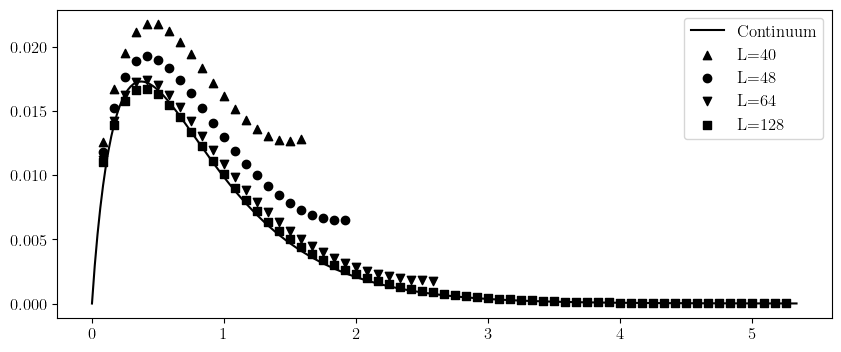

In [3]:
# periodic boundary conditions, L0 = L, kappa = 0.24

fig, ax = plt.subplots(figsize=(10, 4))

scale = 1/np.pi
ax.plot(xm_values, scale*np.array(integral_values), label='Continuum', color='black')

L = 32
xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022]
xG00_lattice = [0.014425675000000028, 0.019981486666666704, 0.023954100000000048, 0.026438133333333374, 0.027726083333333373, 0.028163050000000054, 0.02802805833333339, 0.02754280000000005, 0.026878125000000048, 0.026182666666666722, 0.025569500000000044, 0.025149900000000044, 0.025023808333333373, 0.025289950000000044, 0.02604962500000004]
# ax.scatter(xm_lattice, xG00_lattice, label=f'L={L}', marker='o', color='black')

L = 40
xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022, 1.3333333333333357, 1.4166666666666692, 1.5000000000000027, 1.5833333333333361]
xG00_lattice = [0.012583435000000025, 0.016693663333333365, 0.019544580500000033, 0.0211776666666667, 0.02182445833333338, 0.021769850000000035, 0.02124505833333338, 0.020418600000000037, 0.01941555000000003, 0.018327000000000034, 0.01722526666666669, 0.01616170000000003, 0.015181183333333367, 0.014317683333333359, 0.013601125000000023, 0.01306186666666669, 0.01272889166666669, 0.01263390000000002, 0.012812333333333356]
ax.scatter(xm_lattice, xG00_lattice, label=f'L={L}', marker='^', color='black')

L = 48
xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022, 1.3333333333333357, 1.4166666666666692, 1.5000000000000027, 1.5833333333333361, 1.6666666666666696, 1.750000000000003, 1.8333333333333366, 1.91666666666667]
xG00_lattice = [0.011777755166666681, 0.015258456666666687, 0.01762003300000003, 0.0188819166666667, 0.01925560833333337, 0.019007340000000032, 0.01835275750000004, 0.01743987333333337, 0.01638166500000003, 0.015251691666666697, 0.014105400833333358, 0.012982060000000021, 0.011908920833333355, 0.01090490333333335, 0.009982800000000016, 0.009154226666666683, 0.00842427916666668, 0.007800690000000013, 0.007290505833333344, 0.006898733333333347, 0.006634775000000014, 0.00650765500000001, 0.006531425000000013]
ax.scatter(xm_lattice, xG00_lattice, label=f'L={L}', marker='o', color='black')

L = 64
xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022, 1.3333333333333357, 1.4166666666666692, 1.5000000000000027, 1.5833333333333361, 1.6666666666666696, 1.750000000000003, 1.8333333333333366, 1.91666666666667, 2.0000000000000036, 2.083333333333337, 2.1666666666666705, 2.250000000000004, 2.3333333333333375, 2.416666666666671, 2.5000000000000044, 2.583333333333338]
xG00_lattice = [0.011219178500000015, 0.014252974333333347, 0.016258074850000026, 0.01724357400000003, 0.017414067500000033, 0.017021202600000035, 0.016269170166666694, 0.015302953333333359, 0.014219392500000025, 0.013092425000000019, 0.011962756666666689, 0.01086718000000002, 0.009824045833333354, 0.008844815000000018, 0.007936462500000014, 0.007102440000000016, 0.006342062500000009, 0.00565242000000001, 0.0050323241666666765, 0.004477423333333342, 0.003984027250000007, 0.003548301166666673, 0.003166776083333339, 0.0028361660000000054, 0.0025537958333333383, 0.0023169033333333366, 0.002124396000000004, 0.0019751643333333372, 0.0018687962500000045, 0.0018061975000000028, 0.0017893200000000035]
ax.scatter(xm_lattice, xG00_lattice, label=f'L={L}', marker='v', color='black')

L = 128
xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022, 1.3333333333333357, 1.4166666666666692, 1.5000000000000027, 1.5833333333333361, 1.6666666666666696, 1.750000000000003, 1.8333333333333366, 1.91666666666667, 2.0000000000000036, 2.083333333333337, 2.1666666666666705, 2.250000000000004, 2.3333333333333375, 2.416666666666671, 2.5000000000000044, 2.583333333333338, 2.6666666666666714, 2.750000000000005, 2.8333333333333384, 2.916666666666672, 3.0000000000000053, 3.083333333333339, 3.1666666666666723, 3.2500000000000058, 3.3333333333333393, 3.4166666666666727, 3.500000000000006, 3.5833333333333397, 3.666666666666673, 3.7500000000000067, 3.83333333333334, 3.9166666666666736, 4.000000000000007, 4.083333333333341, 4.166666666666674, 4.250000000000007, 4.333333333333341, 4.416666666666675, 4.500000000000008, 4.583333333333341, 4.666666666666675, 4.750000000000009, 4.833333333333342, 4.916666666666675, 5.000000000000009, 5.083333333333343, 5.166666666666676, 5.250000000000009]
xG00_lattice = [0.011038219550833351, 0.013909141795666689, 0.015787702079000036, 0.016672130620666713, 0.01675909320833336, 0.016304820096700028, 0.015506612108166687, 0.014506780636400025, 0.013406642091000018, 0.012273146333333346, 0.011146736087666692, 0.010061666393000013, 0.009035014679166682, 0.008078084793333348, 0.0071956168500000115, 0.006389205733333346, 0.005657694123333342, 0.00499694977500001, 0.004404668476666672, 0.0038740828166666727, 0.003402294017500008, 0.0029831199383333383, 0.002612041996666671, 0.0022841113200000045, 0.0019950652291666707, 0.0017406813883333368, 0.001517312857500003, 0.0013213462266666695, 0.0011498468825000031, 0.0009998561250000016, 0.0008687208016666682, 0.0007543263200000014, 0.000654572737500001, 0.000567662895000001, 0.0004920346666666674, 0.000426270540000001, 0.0003690956275000006, 0.0003194423450000007, 0.00027636212500000047, 0.00023895080000000071, 0.00020654811558333365, 0.00017847142950000043, 0.00015415762300000028, 0.0001331107946666669, 0.00011489990625000016, 9.915629283333349e-05, 8.555329708333348e-05, 7.380938000000016e-05, 6.367710883333347e-05, 5.494882916666672e-05, 4.743940525000006e-05, 4.098208833333342e-05, 3.545590025000006e-05, 3.0735432000000066e-05, 2.672156666666672e-05, 2.3333025333333387e-05, 2.0496482750000045e-05, 1.8156286166666688e-05, 1.6266103333333365e-05, 1.478916500000003e-05, 1.3699822250000023e-05, 1.2980857333333352e-05, 1.2625567500000026e-05]
ax.scatter(xm_lattice, xG00_lattice, label=f'L={L}', marker='s', color='black')

ax.legend()


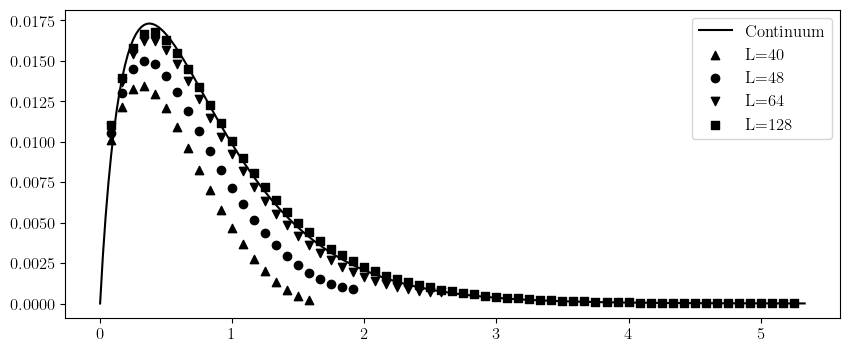

In [4]:
# anti-periodic boundary conditions, L0 = L, kappa = 0.24

fig, ax = plt.subplots(figsize=(10, 4))

scale = 1/np.pi
ax.plot(xm_values, scale*np.array(integral_values), label='Continuum', color='black')

L = 40
xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022, 1.3333333333333357, 1.4166666666666692, 1.5000000000000027, 1.5833333333333361]
xG00_lattice = [0.010104216666666686, 0.012123333333333352, 0.01323855000000003, 0.01345596666666669, 0.01297700000000002, 0.012052920000000019, 0.010878781666666684, 0.009589121333333351, 0.008274855000000015, 0.006995050000000014, 0.005785253833333346, 0.00467091200000001, 0.003664849500000007, 0.002774419666666672, 0.0020032117500000035, 0.0013555013333333356, 0.0008347878333333343, 0.00044855400000000107, 0.0002065585000000004]
ax.scatter(xm_lattice, xG00_lattice, label=f'L={L}', marker='^', color='black')

L = 48
xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022, 1.3333333333333357, 1.4166666666666692, 1.5000000000000027, 1.5833333333333361, 1.6666666666666696, 1.750000000000003, 1.8333333333333366, 1.91666666666667]
xG00_lattice = [0.010565366666666695, 0.012996716666666694, 0.014479345000000018, 0.015006900000000028, 0.014790425000000032, 0.014077960000000021, 0.013067955833333356, 0.011902700000000021, 0.010674952500000019, 0.009449714000000017, 0.008266160833333352, 0.007152602000000013, 0.006123439833333344, 0.0051862486666666725, 0.004344267500000008, 0.003596824000000006, 0.0029425385000000056, 0.0023785650000000044, 0.0019027170000000034, 0.001513886000000003, 0.0012118337000000025, 0.0009985140000000018, 0.000878707333333335]
ax.scatter(xm_lattice, xG00_lattice, label=f'L={L}', marker='o', color='black')

L = 64
xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022, 1.3333333333333357, 1.4166666666666692, 1.5000000000000027, 1.5833333333333361, 1.6666666666666696, 1.750000000000003, 1.8333333333333366, 1.91666666666667, 2.0000000000000036, 2.083333333333337, 2.1666666666666705, 2.250000000000004, 2.3333333333333375, 2.416666666666671, 2.5000000000000044, 2.583333333333338]
xG00_lattice = [0.010907985000000025, 0.013667706666666684, 0.015438045000000036, 0.01622277333333336, 0.01622184583333336, 0.01569112500000002, 0.01482866233333336, 0.013777917333333353, 0.012633861000000026, 0.011468433333333354, 0.010318751116666688, 0.009219078000000016, 0.00818584433333335, 0.00722819486666668, 0.006351613000000011, 0.005555577600000012, 0.004838269416666674, 0.004196201400000007, 0.0036257570166666735, 0.0031196753333333385, 0.0026752334000000044, 0.0022861633666666705, 0.001948007616666671, 0.001656366400000003, 0.0014074625000000027, 0.0011983304666666687, 0.0010260832500000015, 0.0008890607600000016, 0.0007862296333333347, 0.0007173435000000013, 0.0006831888500000011]
ax.scatter(xm_lattice, xG00_lattice, label=f'L={L}', marker='v', color='black')

L = 128
xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022, 1.3333333333333357, 1.4166666666666692, 1.5000000000000027, 1.5833333333333361, 1.6666666666666696, 1.750000000000003, 1.8333333333333366, 1.91666666666667, 2.0000000000000036, 2.083333333333337, 2.1666666666666705, 2.250000000000004, 2.3333333333333375, 2.416666666666671, 2.5000000000000044, 2.583333333333338, 2.6666666666666714, 2.750000000000005, 2.8333333333333384, 2.916666666666672, 3.0000000000000053, 3.083333333333339, 3.1666666666666723, 3.2500000000000058, 3.3333333333333393, 3.4166666666666727, 3.500000000000006, 3.5833333333333397, 3.666666666666673, 3.7500000000000067, 3.83333333333334, 3.9166666666666736, 4.000000000000007, 4.083333333333341, 4.166666666666674, 4.250000000000007, 4.333333333333341, 4.416666666666675, 4.500000000000008, 4.583333333333341, 4.666666666666675, 4.750000000000009, 4.833333333333342, 4.916666666666675, 5.000000000000009, 5.083333333333343, 5.166666666666676, 5.250000000000009]
xG00_lattice = [0.01103660322250004, 0.013906561473333353, 0.015782862057500027, 0.016666050536666723, 0.01675265713333336, 0.016296765115000028, 0.01549825988666669, 0.014497866613333353, 0.013397007712500028, 0.012259006541666697, 0.011135197470833354, 0.010049344040000017, 0.009023527987500014, 0.00806622032766668, 0.007183716585000007, 0.006377068696000014, 0.0056448338273333435, 0.004984817712000007, 0.004392345668833343, 0.0038624339133333406, 0.003390820335000004, 0.0029721102029666713, 0.002601242342833337, 0.0022737470510000033, 0.00198502647916667, 0.001731126229300003, 0.0015081770880000021, 0.0013126807166666692, 0.0011414737985333348, 0.0009918602400000019, 0.0008612337436666684, 0.0007472022789333347, 0.0006478291682500014, 0.0005613159625666676, 0.0004860686973333345, 0.0004206462780000008, 0.00036384049160000066, 0.0003145382935700006, 0.00027175199025000036, 0.00023466868733333375, 0.0002025596041500003, 0.00017474447830000036, 0.00015068237375000023, 0.00012987017853333355, 0.00011188935075000017, 9.635495340000016e-05, 8.295159015000013e-05, 7.13846336000001e-05, 6.142131216666676e-05, 5.2844218333333446e-05, 4.546814560000007e-05, 3.914399753333342e-05, 3.3727411250000055e-05, 2.9108078730000055e-05, 2.518343978333337e-05, 2.1870462245333386e-05, 1.9101567730000038e-05, 1.681651507000003e-05, 1.4969886116666693e-05, 1.352583630000002e-05, 1.2457736996666692e-05, 1.1749036476666684e-05, 1.1392281085500023e-05]
ax.scatter(xm_lattice, xG00_lattice, label=f'L={L}', marker='s', color='black')


ax.legend()


## Anti-periodic B.C. with $\kappa = 0.24$

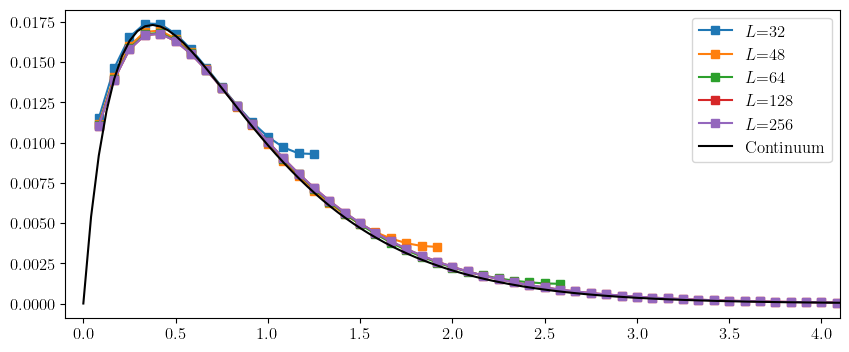

In [5]:
# anti-periodic boundary conditions, kappa = 0.24, L0 = 256

xm_values = [0.0, 0.0418300653594772, 0.0836601307189544, 0.1254901960784316, 0.1673202614379088, 0.209150326797386, 0.2509803921568632, 0.2928104575163404, 0.3346405228758176, 0.3764705882352948, 0.418300653594772, 0.4601307189542492, 0.5019607843137264, 0.5437908496732036, 0.5856209150326808, 0.627450980392158, 0.6692810457516352, 0.7111111111111124, 0.7529411764705896, 0.7947712418300668, 0.836601307189544, 0.8784313725490211, 0.9202614379084983, 0.9620915032679755, 1.0039215686274527, 1.04575163398693, 1.0875816993464071, 1.1294117647058843, 1.1712418300653615, 1.2130718954248387, 1.254901960784316, 1.2967320261437931, 1.3385620915032703, 1.3803921568627473, 1.4222222222222247, 1.4640522875817021, 1.5058823529411791, 1.547712418300656, 1.5895424836601335, 1.631372549019611, 1.673202614379088, 1.7150326797385649, 1.7568627450980423, 1.7986928104575197, 1.8405228758169967, 1.8823529411764737, 1.924183006535951, 1.9660130718954285, 2.0078431372549055, 2.0496732026143825, 2.09150326797386, 2.1333333333333373, 2.1751633986928143, 2.2169934640522913, 2.2588235294117687, 2.300653594771246, 2.342483660130723, 2.3843137254902, 2.4261437908496775, 2.467973856209155, 2.509803921568632, 2.551633986928109, 2.5934640522875863, 2.6352941176470637, 2.6771241830065406, 2.7189542483660176, 2.7607843137254946, 2.8026143790849725, 2.8444444444444494, 2.8862745098039264, 2.9281045751634043, 2.9699346405228813, 3.0117647058823582, 3.053594771241835, 3.095424836601312, 3.13725490196079, 3.179084967320267, 3.220915032679744, 3.262745098039222, 3.304575163398699, 3.346405228758176, 3.388235294117653, 3.4300653594771298, 3.4718954248366076, 3.5137254901960846, 3.5555555555555616, 3.5973856209150394, 3.6392156862745164, 3.6810457516339934, 3.7228758169934704, 3.7647058823529473, 3.806535947712425, 3.848366013071902, 3.890196078431379, 3.932026143790857, 3.973856209150334, 4.015686274509811, 4.057516339869288, 4.099346405228765, 4.141176470588243, 4.18300653594772, 4.224836601307197, 4.266666666666675, 4.308496732026152, 4.3503267973856286, 4.3921568627451055, 4.4339869281045825, 4.47581699346406, 4.517647058823537, 4.559477124183014, 4.601307189542492, 4.643137254901969, 4.684967320261446, 4.726797385620923, 4.7686274509804, 4.810457516339878, 4.852287581699355, 4.894117647058832, 4.93594771241831, 4.977777777777787, 5.019607843137264, 5.061437908496741, 5.103267973856218, 5.1450980392156955, 5.1869281045751725, 5.2287581699346495, 5.270588235294127, 5.312418300653604, 5.354248366013081, 5.396078431372558, 5.437908496732035, 5.479738562091512, 5.521568627450989, 5.563398692810468, 5.605228758169945, 5.647058823529422, 5.688888888888899, 5.730718954248376, 5.772549019607853, 5.81437908496733, 5.8562091503268086, 5.8980392156862855, 5.9398692810457625, 5.9816993464052395, 6.0235294117647165, 6.065359477124193, 6.10718954248367, 6.149019607843147, 6.190849673202624, 6.232679738562103, 6.27450980392158, 6.316339869281057, 6.358169934640534, 6.400000000000011, 6.441830065359488, 6.483660130718965, 6.525490196078444, 6.567320261437921, 6.609150326797398, 6.650980392156875, 6.692810457516352, 6.734640522875829, 6.776470588235306, 6.8183006535947825, 6.8601307189542595, 6.901960784313738, 6.943790849673215, 6.985620915032692, 7.027450980392169, 7.069281045751646, 7.111111111111123, 7.1529411764706, 7.194771241830079, 7.236601307189556, 7.278431372549033, 7.32026143790851, 7.362091503267987, 7.403921568627464, 7.445751633986941, 7.487581699346418, 7.529411764705895, 7.571241830065373, 7.61307189542485, 7.654901960784327, 7.696732026143804, 7.738562091503281, 7.780392156862758, 7.822222222222235, 7.864052287581714, 7.905882352941191, 7.947712418300668, 7.989542483660145, 8.031372549019622, 8.073202614379099, 8.115032679738576, 8.156862745098053, 8.19869281045753, 8.240522875817009, 8.282352941176486, 8.324183006535963, 8.36601307189544, 8.407843137254916, 8.449673202614393, 8.49150326797387, 8.53333333333335, 8.575163398692826, 8.616993464052303, 8.65882352941178, 8.700653594771257, 8.742483660130734, 8.784313725490211, 8.826143790849688, 8.867973856209165, 8.909803921568644, 8.95163398692812, 8.993464052287598, 9.035294117647075, 9.077124183006552, 9.118954248366029, 9.160784313725506, 9.202614379084984, 9.244444444444461, 9.286274509803938, 9.328104575163415, 9.369934640522892, 9.41176470588237, 9.453594771241846, 9.495424836601323, 9.5372549019608, 9.579084967320279, 9.620915032679756, 9.662745098039233, 9.70457516339871, 9.746405228758187, 9.788235294117664, 9.83006535947714, 9.87189542483662, 9.913725490196097, 9.955555555555573, 9.99738562091505, 10.039215686274527, 10.081045751634004, 10.122875816993481, 10.164705882352958, 10.206535947712435, 10.248366013071914, 10.290196078431391, 10.332026143790868, 10.373856209150345, 10.415686274509822, 10.457516339869299, 10.499346405228776, 10.541176470588255, 10.583006535947732, 10.624836601307209, 10.666666666666686]
integral_values = [0.0, 0.016905762993954167, 0.02885797857186461, 0.03754922044401394, 0.043835243706541106, 0.048277648352147075, 0.05127984935912048, 0.05314580896178875, 0.05411132199880969, 0.05436283813924407, 0.054049733605432776, 0.05329278033166179, 0.052190241920483646, 0.05082240451496314, 0.04925502976983066, 0.04754203923645113, 0.04572763492713165, 0.043847996467124235, 0.04193265399913408, 0.04000560865553811, 0.03808625375059887, 0.03619013677264495, 0.03432959289577788, 0.03251427389363344, 0.03075159125542347, 0.02904708846696539, 0.027404754480941637, 0.025827288122162166, 0.024316321386841866, 0.02287260817942527, 0.021496183897384225, 0.02018650037362712, 0.018942539904984394, 0.01776291156983185, 0.016645932438884084, 0.015589695951294492, 0.01459212934511991, 0.013651041756353314, 0.012764164359146542, 0.01192918371770071, 0.011143769349574673, 0.010405596355531344, 0.009712363848185643, 0.009061809806986168, 0.008451722898601938, 0.007879951723054578, 0.007344411884070343, 0.006843091223831434, 0.006374053513235309, 0.005935440849976643, 0.0055254749790775185, 0.0051424577204809635, 0.004784770661721414, 0.004450874250831249, 0.0041393064049228675, 0.003848680732867544, 0.0035776844558048216, 0.003325076096541904, 0.003089682997967942, 0.0028703987211789396, 0.002666180365882649, 0.002476045848654772, 0.002299071168581317, 0.0021343876847600366, 0.001981179425360428, 0.0018386804446922566, 0.0017061722409328266, 0.0015829812447131111, 0.0014684763862969326, 0.0013620667470999937, 0.001263199299603524, 0.0011713567382919936, 0.0010860554030568746, 0.0010068432955035811, 0.0009332981877883142, 0.0008650258229361581, 0.0008016582050408539, 0.0007428519773127036, 0.0006882868855959086, 0.0006376643247115832, 0.000590705964785165, 0.0005471524545766134, 0.000506762198739606, 0.0004693102058857165, 0.0004345870043013104, 0.0004023976222077237, 0.0003725606294312634, 0.00034490723746143104, 0.0003192804549050505, 0.00029553429543598646, 0.00027353303542622284, 0.00025315051853905853, 0.00023426950466510992, 0.00021678106068504302, 0.00020058399064814604, 0.00018558430306177265, 0.00017169471309242727, 0.00015883417758401125, 0.00014692746090184036, 0.00013590472971197867, 0.00012570113801250923, 0.00011625665895902055, 0.0001075153871631066, 9.942560114320198e-05, 9.193929330312406e-05, 8.501194080725967e-05, 7.860225784397171e-05, 7.267196497390423e-05, 6.718557443993204e-05, 6.211019038336395e-05, 5.7415322975471324e-05, 5.3072715534539446e-05, 4.905618375654064e-05, 4.534146624230185e-05, 4.1906085555792514e-05, 3.8729219097012e-05, 3.579157911902495e-05, 3.307530126209296e-05, 3.056384101870994e-05, 2.8241877581773384e-05, 2.6095224564242103e-05, 2.4110747112552875e-05, 2.2276284967904584e-05, 2.0580581059382345e-05, 1.90132152408887e-05, 1.7564542810076116e-05, 1.6225637472036554e-05, 1.498823843348873e-05, 1.384470133470762e-05, 1.2787952746547949e-05, 1.1811447978705168e-05, 1.0909131962915444e-05, 1.0075402991192336e-05, 9.305079104505049e-06, 8.593366941587491e-06, 7.935832870892782e-06, 7.3283762411359595e-06, 6.767204597452473e-06, 6.2488107209984995e-06, 5.769951359879598e-06, 5.327627528665658e-06, 4.919066262476728e-06, 4.541703719748502e-06, 4.193169535348565e-06, 3.8712723327503404e-06, 3.573986310518227e-06, 3.299438824445809e-06, 3.045898892350914e-06, 2.8117665537952115e-06, 2.5955630218890015e-06, 2.395921568889219e-06, 2.2115790915237313e-06, 2.0413683059007083e-06, 1.8842105255075075e-06, 1.7391089791898653e-06, 1.605142629146136e-06, 1.4814604518904234e-06, 1.3672761478479437e-06, 1.2618632477607433e-06, 1.164550586415675e-06, 1.0747181163717362e-06, 9.917930363727736e-07, 9.15246210994927e-07, 8.445888598064638e-07, 7.793694959204034e-07, 7.191710953064862e-07, 6.636084796069639e-07, 6.123258964779821e-07, 5.649947826624684e-07, 5.213116960977547e-07, 4.809964043782377e-07, 4.437901178357674e-07, 4.094538563736547e-07, 3.777669399991749e-07, 3.485255937488279e-07, 3.2154165839484307e-07, 2.966413989643004e-07, 2.7366440369772244e-07, 2.52462566625379e-07, 2.3289914745012234e-07, 2.1484790289831177e-07, 1.9819228413804287e-07, 1.8282469526906666e-07, 1.6864580826380664e-07, 1.555639300860478e-07, 1.4349441803513144e-07, 1.3235913966083854e-07, 1.220859738692977e-07, 1.1260835009485869e-07, 1.0386482264845902e-07, 9.579867757096276e-08, 8.835756952161243e-08, 8.149318641826108e-08, 7.516093971861738e-08, 6.931967839134325e-08, 6.393142477347079e-08, 5.896113064714197e-08, 5.43764519949415e-08, 5.014754100986573e-08, 4.624676188419334e-08, 4.264888626198108e-08, 3.933036413049869e-08, 3.6269553673106365e-08, 3.344648543803784e-08, 3.084273348275804e-08, 2.8441296413213266e-08, 2.6226487561131838e-08, 2.4183833600154306e-08, 2.229998095482734e-08, 2.0562609405720832e-08, 1.8960352339418628e-08, 1.7482723134178393e-08, 1.612004721090694e-08, 1.4863399315002802e-08, 1.370454562779438e-08, 1.2635890336956735e-08, 1.1650426323617588e-08, 1.0741689650032153e-08, 9.903717555886397e-09, 9.131009693627145e-09, 8.418492353854086e-09, 7.76148545087348e-09, 7.1556720561240625e-09, 6.597070283454286e-09, 6.082007345255865e-09, 5.607095612338658e-09, 5.1692105232515564e-09, 4.7654702005941185e-09, 4.3932166427993824e-09, 4.0499983699672435e-09, 3.733554411654847e-09, 3.441799533143271e-09, 3.1728106046540772e-09, 2.9248140253336065e-09, 2.696174120605311e-09, 2.485382437752854e-09, 2.291047870378869e-09, 2.1118875477235728e-09, 1.9467184297563104e-09, 1.7944495535048524e-09, 1.654074880288501e-09, 1.524666697400467e-09, 1.4053695313660988e-09, 1.2953945332094437e-09, 1.194014299212626e-09, 1.1005580934696371e-09, 1.014407441136839e-09, 9.349920636827691e-10, 8.617861296558602e-10, 7.943047965336366e-10, 7.321010211047982e-10, 6.747626175778949e-10, 6.219095442183135e-10, 5.731914007995437e-10, 5.282851205242989e-10, 4.868928413353291e-10]

fig, ax = plt.subplots(figsize=(10, 4))

L = 32

xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022]
xG00_lattice = [0.011499652149530918, 0.01460559946434534, 0.016553560246240488, 0.01739313380059798, 0.017364571159737552, 0.016757863280512056, 0.015799381095186547, 0.014659481288830746, 0.013463133400377055, 0.012299803595188886, 0.011245883723047955, 0.010361639021842206, 0.009703868157565835, 0.009325983443303107, 0.009288377352472777]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L$={L}', marker='s')

L = 48

xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022, 1.3333333333333357, 1.4166666666666692, 1.5000000000000027, 1.5833333333333361, 1.6666666666666696, 1.750000000000003, 1.8333333333333366, 1.91666666666667]
xG00_lattice = [0.011158270926940907, 0.014091641917538218, 0.016000430199208764, 0.016881767071674374, 0.016947258672142126, 0.01645624418068054, 0.015613668517120934, 0.01456556268032336, 0.01341527845522501, 0.012230568223451676, 0.011060708239815684, 0.00993665686212003, 0.008880859598315707, 0.007905470615665253, 0.0070189318491890125, 0.006226483742152305, 0.005530197462333377, 0.004932106270452003, 0.004434014127387974, 0.004039198849160006, 0.0037504519824922557, 0.0035742837838715416, 0.003519384589860522]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L$={L}', marker='s')

L = 64

xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022, 1.3333333333333357, 1.4166666666666692, 1.5000000000000027, 1.5833333333333361, 1.6666666666666696, 1.750000000000003, 1.8333333333333366, 1.91666666666667, 2.0000000000000036, 2.083333333333337, 2.1666666666666705, 2.250000000000004, 2.3333333333333375, 2.416666666666671, 2.5000000000000044, 2.583333333333338]
xG00_lattice = [0.01106335333065685, 0.013956186562836656, 0.015845153245691784, 0.01672797540989371, 0.01681303576627253, 0.016350632057688018, 0.015543273701955448, 0.014532770213426019, 0.013417910149647033, 0.012269734353238356, 0.01113220466897552, 0.010034587720475014, 0.008995587069162436, 0.008027277402947848, 0.007134535774000012, 0.00631882800816908, 0.005580055184757453, 0.004914389105612709, 0.0043184395436556885, 0.0037883946542133355, 0.0033192580175248725, 0.0029067362114270374, 0.002546695450648953, 0.0022355053647676046, 0.001969581606947919, 0.0017465305202137029, 0.0015639268944910981, 0.0014206305954245556, 0.001315831384415186, 0.0012497940177370018, 0.0012238464241237181]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L$={L}', marker='s')

L = 128

xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022, 1.3333333333333357, 1.4166666666666692, 1.5000000000000027, 1.5833333333333361, 1.6666666666666696, 1.750000000000003, 1.8333333333333366, 1.91666666666667, 2.0000000000000036, 2.083333333333337, 2.1666666666666705, 2.250000000000004, 2.3333333333333375, 2.416666666666671, 2.5000000000000044, 2.583333333333338, 2.6666666666666714, 2.750000000000005, 2.8333333333333384, 2.916666666666672, 3.0000000000000053, 3.083333333333339, 3.1666666666666723, 3.2500000000000058, 3.3333333333333393, 3.4166666666666727, 3.500000000000006, 3.5833333333333397, 3.666666666666673, 3.7500000000000067, 3.83333333333334, 3.9166666666666736, 4.000000000000007, 4.083333333333341, 4.166666666666674, 4.250000000000007, 4.333333333333341, 4.416666666666675, 4.500000000000008, 4.583333333333341, 4.666666666666675, 4.750000000000009, 4.833333333333342, 4.916666666666675, 5.000000000000009, 5.083333333333343, 5.166666666666676, 5.250000000000009]
xG00_lattice = [0.011037568082250846, 0.013907849787940373, 0.01578498483953403, 0.016668753729319374, 0.01675592202566004, 0.016300491026195022, 0.015502383958310696, 0.014502317565414022, 0.013401825066055377, 0.01226591762704561, 0.011140982318908862, 0.010056145994055824, 0.00902955383296829, 0.008072534369695263, 0.007189478276487264, 0.006383122293771344, 0.005651544895234615, 0.004990992492671107, 0.004398447656985668, 0.0038681124096085033, 0.0033966177290538574, 0.0029775867604563723, 0.0026065844213705508, 0.0022789493724934846, 0.001990013153530844, 0.001735992612729529, 0.001512705204338838, 0.0013171200170431826, 0.0011456981983961284, 0.0009958883784717024, 0.0008649044863265111, 0.0007507576020612279, 0.0006512103586350466, 0.0005644959242529277, 0.0004890501059538507, 0.00042345295657318313, 0.00036646969437902907, 0.00031697666638679054, 0.00027404959967418184, 0.00023681890106660037, 0.00020456390814079054, 0.00017660942181708036, 0.0001524175929109682, 0.00013148608407175292, 0.00011339315720835011, 9.775468047171015e-05, 8.425025701052181e-05, 7.259626922272016e-05, 6.255104179333346e-05, 5.3894576905250116e-05, 4.645282830171358e-05, 4.006344273314939e-05, 3.4593422577106566e-05, 2.9921378341014076e-05, 2.5952009249017545e-05, 2.2601222186050712e-05, 1.979852196449453e-05, 1.748619504312369e-05, 1.5617584293161868e-05, 1.4156850747980023e-05, 1.3078325635347352e-05, 1.2364606037835022e-05, 1.2008637251824515e-05]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L$={L}', marker='s')

L = 256

xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022, 1.3333333333333357, 1.4166666666666692, 1.5000000000000027, 1.5833333333333361, 1.6666666666666696, 1.750000000000003, 1.8333333333333366, 1.91666666666667, 2.0000000000000036, 2.083333333333337, 2.1666666666666705, 2.250000000000004, 2.3333333333333375, 2.416666666666671, 2.5000000000000044, 2.583333333333338, 2.6666666666666714, 2.750000000000005, 2.8333333333333384, 2.916666666666672, 3.0000000000000053, 3.083333333333339, 3.1666666666666723, 3.2500000000000058, 3.3333333333333393, 3.4166666666666727, 3.500000000000006, 3.5833333333333397, 3.666666666666673, 3.7500000000000067, 3.83333333333334, 3.9166666666666736, 4.000000000000007, 4.083333333333341, 4.166666666666674, 4.250000000000007, 4.333333333333341, 4.416666666666675, 4.500000000000008, 4.583333333333341, 4.666666666666675, 4.750000000000009, 4.833333333333342, 4.916666666666675, 5.000000000000009, 5.083333333333343, 5.166666666666676, 5.250000000000009, 5.333333333333343, 5.416666666666677, 5.50000000000001, 5.583333333333343, 5.666666666666677, 5.750000000000011, 5.833333333333344, 5.916666666666677, 6.000000000000011, 6.083333333333345, 6.166666666666678, 6.250000000000011, 6.333333333333345, 6.4166666666666785, 6.5000000000000115, 6.583333333333345, 6.6666666666666785, 6.750000000000012, 6.8333333333333455, 6.9166666666666785, 7.000000000000012, 7.083333333333346, 7.166666666666679, 7.250000000000012, 7.333333333333346, 7.41666666666668, 7.500000000000013, 7.583333333333346, 7.66666666666668, 7.750000000000014, 7.833333333333347, 7.91666666666668, 8.000000000000014, 8.083333333333348, 8.166666666666682, 8.250000000000014, 8.333333333333348, 8.416666666666682, 8.500000000000014, 8.583333333333348, 8.666666666666682, 8.750000000000016, 8.83333333333335, 8.916666666666682, 9.000000000000016, 9.08333333333335, 9.166666666666682, 9.250000000000016, 9.33333333333335, 9.416666666666684, 9.500000000000018, 9.58333333333335, 9.666666666666684, 9.750000000000018, 9.83333333333335, 9.916666666666684, 10.000000000000018, 10.083333333333352, 10.166666666666686, 10.250000000000018, 10.333333333333352, 10.416666666666686, 10.500000000000018, 10.583333333333352]
xG00_lattice = [0.011037532617228531, 0.01390777896097294, 0.015784803321843604, 0.016668514266520194, 0.01675561169469825, 0.016300287799243782, 0.015502055635160647, 0.014501870132668298, 0.013401630419736698, 0.01226573925184162, 0.011140844745688836, 0.010056050189853723, 0.00902940723842064, 0.008072362214833016, 0.007189352863971891, 0.006383317126532944, 0.005651792662102385, 0.0049913236970883105, 0.004398457952422249, 0.0038685762715655074, 0.003396918787954132, 0.0029779571354883226, 0.0026070092285121484, 0.002279299933404567, 0.0019904192320170035, 0.0017363226692407299, 0.0015132596389114982, 0.001317543018469349, 0.0011461358162304983, 0.0009963580472638863, 0.0008655337155927011, 0.0007513348167411206, 0.0006518051575262157, 0.0005651254103170577, 0.0004896829178776505, 0.0004241028915228669, 0.00036712647978778205, 0.0003176379476721473, 0.0002747270911938805, 0.00023750717021480045, 0.00020525254228243053, 0.00017730593517476038, 0.00015311360260792856, 0.00013217250469709014, 0.00011406512260500021, 9.840356883175683e-05, 8.487145751770996e-05, 7.318029088199209e-05, 6.308356662004378e-05, 5.436287370316676e-05, 4.683711436253905e-05, 4.034375050875004e-05, 3.474335329657125e-05, 2.9913684158430046e-05, 2.575140820468338e-05, 2.21621537713147e-05, 1.9070231022694514e-05, 1.6406365827289856e-05, 1.4112544965518348e-05, 1.213718124898002e-05, 1.0436436683102516e-05, 8.972571231098352e-06, 7.712927890447513e-06, 6.629272146134414e-06, 5.696613093394184e-06, 4.894899542874011e-06, 4.205280636600839e-06, 3.612642656191344e-06, 3.102672930805502e-06, 2.664559406366671e-06, 2.288070733181336e-06, 1.9645087783248035e-06, 1.6865448341802423e-06, 1.4477065021915364e-06, 1.2425863679775027e-06, 1.0664339251180019e-06, 9.150973254756682e-07, 7.852094269630017e-07, 6.736674573641677e-07, 5.779336382146675e-07, 4.95738188224651e-07, 4.2524461637150053e-07, 3.647043959762171e-07, 3.1276815600002043e-07, 2.681998803116088e-07, 2.299725694872004e-07, 1.9717273338075044e-07, 1.6903144808146695e-07, 1.4490342745611702e-07, 1.2420999639750024e-07, 1.064596186957335e-07, 9.123903871640012e-08, 7.819523561430014e-08, 6.700593980703347e-08, 5.741285448175011e-08, 4.9192142963200115e-08, 4.214477212606674e-08, 3.610426820980009e-08, 3.092739225015007e-08, 2.6491066391166724e-08, 2.268918201128173e-08, 1.9430931211540028e-08, 1.6640540647523355e-08, 1.424962922448002e-08, 1.2200915728925025e-08, 1.0447277656726695e-08, 8.944372103728348e-09, 7.657930922760013e-09, 6.556699449821674e-09, 5.613730889066673e-09, 4.80703560347501e-09, 4.117174676720005e-09, 3.5275358999916764e-09, 3.023978780670004e-09, 2.5943136972341676e-09, 2.228284087570002e-09, 1.9171546093050022e-09, 1.6534430511066692e-09, 1.430769569705003e-09, 1.244025312600002e-09, 1.0886498257983355e-09, 9.609510614493357e-10, 8.579567460950011e-10, 7.774267019066686e-10, 7.174005333333341e-10, 6.766299674400007e-10, 6.543822436416674e-10]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L$={L}', marker='s')

scale = 1/np.pi
ax.plot(xm_values, scale*np.array(integral_values), label='Continuum', color='black')

ax.set_xlim(-0.1, 4.1)
ax.legend()

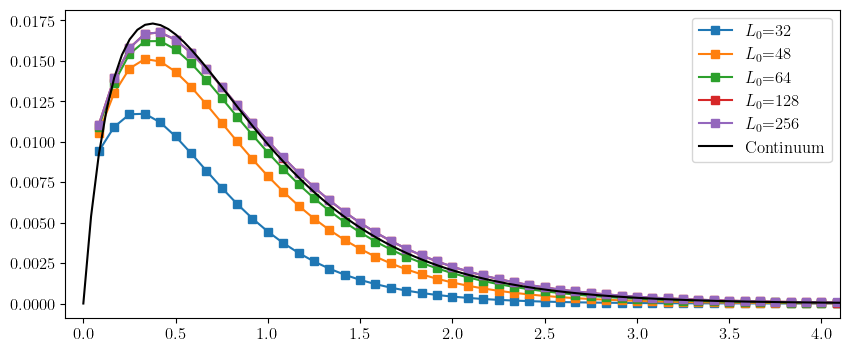

In [6]:
# anti-periodic boundary conditions, kappa = 0.24, L = 256

xm_values = [0.0, 0.0418300653594772, 0.0836601307189544, 0.1254901960784316, 0.1673202614379088, 0.209150326797386, 0.2509803921568632, 0.2928104575163404, 0.3346405228758176, 0.3764705882352948, 0.418300653594772, 0.4601307189542492, 0.5019607843137264, 0.5437908496732036, 0.5856209150326808, 0.627450980392158, 0.6692810457516352, 0.7111111111111124, 0.7529411764705896, 0.7947712418300668, 0.836601307189544, 0.8784313725490211, 0.9202614379084983, 0.9620915032679755, 1.0039215686274527, 1.04575163398693, 1.0875816993464071, 1.1294117647058843, 1.1712418300653615, 1.2130718954248387, 1.254901960784316, 1.2967320261437931, 1.3385620915032703, 1.3803921568627473, 1.4222222222222247, 1.4640522875817021, 1.5058823529411791, 1.547712418300656, 1.5895424836601335, 1.631372549019611, 1.673202614379088, 1.7150326797385649, 1.7568627450980423, 1.7986928104575197, 1.8405228758169967, 1.8823529411764737, 1.924183006535951, 1.9660130718954285, 2.0078431372549055, 2.0496732026143825, 2.09150326797386, 2.1333333333333373, 2.1751633986928143, 2.2169934640522913, 2.2588235294117687, 2.300653594771246, 2.342483660130723, 2.3843137254902, 2.4261437908496775, 2.467973856209155, 2.509803921568632, 2.551633986928109, 2.5934640522875863, 2.6352941176470637, 2.6771241830065406, 2.7189542483660176, 2.7607843137254946, 2.8026143790849725, 2.8444444444444494, 2.8862745098039264, 2.9281045751634043, 2.9699346405228813, 3.0117647058823582, 3.053594771241835, 3.095424836601312, 3.13725490196079, 3.179084967320267, 3.220915032679744, 3.262745098039222, 3.304575163398699, 3.346405228758176, 3.388235294117653, 3.4300653594771298, 3.4718954248366076, 3.5137254901960846, 3.5555555555555616, 3.5973856209150394, 3.6392156862745164, 3.6810457516339934, 3.7228758169934704, 3.7647058823529473, 3.806535947712425, 3.848366013071902, 3.890196078431379, 3.932026143790857, 3.973856209150334, 4.015686274509811, 4.057516339869288, 4.099346405228765, 4.141176470588243, 4.18300653594772, 4.224836601307197, 4.266666666666675, 4.308496732026152, 4.3503267973856286, 4.3921568627451055, 4.4339869281045825, 4.47581699346406, 4.517647058823537, 4.559477124183014, 4.601307189542492, 4.643137254901969, 4.684967320261446, 4.726797385620923, 4.7686274509804, 4.810457516339878, 4.852287581699355, 4.894117647058832, 4.93594771241831, 4.977777777777787, 5.019607843137264, 5.061437908496741, 5.103267973856218, 5.1450980392156955, 5.1869281045751725, 5.2287581699346495, 5.270588235294127, 5.312418300653604, 5.354248366013081, 5.396078431372558, 5.437908496732035, 5.479738562091512, 5.521568627450989, 5.563398692810468, 5.605228758169945, 5.647058823529422, 5.688888888888899, 5.730718954248376, 5.772549019607853, 5.81437908496733, 5.8562091503268086, 5.8980392156862855, 5.9398692810457625, 5.9816993464052395, 6.0235294117647165, 6.065359477124193, 6.10718954248367, 6.149019607843147, 6.190849673202624, 6.232679738562103, 6.27450980392158, 6.316339869281057, 6.358169934640534, 6.400000000000011, 6.441830065359488, 6.483660130718965, 6.525490196078444, 6.567320261437921, 6.609150326797398, 6.650980392156875, 6.692810457516352, 6.734640522875829, 6.776470588235306, 6.8183006535947825, 6.8601307189542595, 6.901960784313738, 6.943790849673215, 6.985620915032692, 7.027450980392169, 7.069281045751646, 7.111111111111123, 7.1529411764706, 7.194771241830079, 7.236601307189556, 7.278431372549033, 7.32026143790851, 7.362091503267987, 7.403921568627464, 7.445751633986941, 7.487581699346418, 7.529411764705895, 7.571241830065373, 7.61307189542485, 7.654901960784327, 7.696732026143804, 7.738562091503281, 7.780392156862758, 7.822222222222235, 7.864052287581714, 7.905882352941191, 7.947712418300668, 7.989542483660145, 8.031372549019622, 8.073202614379099, 8.115032679738576, 8.156862745098053, 8.19869281045753, 8.240522875817009, 8.282352941176486, 8.324183006535963, 8.36601307189544, 8.407843137254916, 8.449673202614393, 8.49150326797387, 8.53333333333335, 8.575163398692826, 8.616993464052303, 8.65882352941178, 8.700653594771257, 8.742483660130734, 8.784313725490211, 8.826143790849688, 8.867973856209165, 8.909803921568644, 8.95163398692812, 8.993464052287598, 9.035294117647075, 9.077124183006552, 9.118954248366029, 9.160784313725506, 9.202614379084984, 9.244444444444461, 9.286274509803938, 9.328104575163415, 9.369934640522892, 9.41176470588237, 9.453594771241846, 9.495424836601323, 9.5372549019608, 9.579084967320279, 9.620915032679756, 9.662745098039233, 9.70457516339871, 9.746405228758187, 9.788235294117664, 9.83006535947714, 9.87189542483662, 9.913725490196097, 9.955555555555573, 9.99738562091505, 10.039215686274527, 10.081045751634004, 10.122875816993481, 10.164705882352958, 10.206535947712435, 10.248366013071914, 10.290196078431391, 10.332026143790868, 10.373856209150345, 10.415686274509822, 10.457516339869299, 10.499346405228776, 10.541176470588255, 10.583006535947732, 10.624836601307209, 10.666666666666686]
integral_values = [0.0, 0.016905762993954167, 0.02885797857186461, 0.03754922044401394, 0.043835243706541106, 0.048277648352147075, 0.05127984935912048, 0.05314580896178875, 0.05411132199880969, 0.05436283813924407, 0.054049733605432776, 0.05329278033166179, 0.052190241920483646, 0.05082240451496314, 0.04925502976983066, 0.04754203923645113, 0.04572763492713165, 0.043847996467124235, 0.04193265399913408, 0.04000560865553811, 0.03808625375059887, 0.03619013677264495, 0.03432959289577788, 0.03251427389363344, 0.03075159125542347, 0.02904708846696539, 0.027404754480941637, 0.025827288122162166, 0.024316321386841866, 0.02287260817942527, 0.021496183897384225, 0.02018650037362712, 0.018942539904984394, 0.01776291156983185, 0.016645932438884084, 0.015589695951294492, 0.01459212934511991, 0.013651041756353314, 0.012764164359146542, 0.01192918371770071, 0.011143769349574673, 0.010405596355531344, 0.009712363848185643, 0.009061809806986168, 0.008451722898601938, 0.007879951723054578, 0.007344411884070343, 0.006843091223831434, 0.006374053513235309, 0.005935440849976643, 0.0055254749790775185, 0.0051424577204809635, 0.004784770661721414, 0.004450874250831249, 0.0041393064049228675, 0.003848680732867544, 0.0035776844558048216, 0.003325076096541904, 0.003089682997967942, 0.0028703987211789396, 0.002666180365882649, 0.002476045848654772, 0.002299071168581317, 0.0021343876847600366, 0.001981179425360428, 0.0018386804446922566, 0.0017061722409328266, 0.0015829812447131111, 0.0014684763862969326, 0.0013620667470999937, 0.001263199299603524, 0.0011713567382919936, 0.0010860554030568746, 0.0010068432955035811, 0.0009332981877883142, 0.0008650258229361581, 0.0008016582050408539, 0.0007428519773127036, 0.0006882868855959086, 0.0006376643247115832, 0.000590705964785165, 0.0005471524545766134, 0.000506762198739606, 0.0004693102058857165, 0.0004345870043013104, 0.0004023976222077237, 0.0003725606294312634, 0.00034490723746143104, 0.0003192804549050505, 0.00029553429543598646, 0.00027353303542622284, 0.00025315051853905853, 0.00023426950466510992, 0.00021678106068504302, 0.00020058399064814604, 0.00018558430306177265, 0.00017169471309242727, 0.00015883417758401125, 0.00014692746090184036, 0.00013590472971197867, 0.00012570113801250923, 0.00011625665895902055, 0.0001075153871631066, 9.942560114320198e-05, 9.193929330312406e-05, 8.501194080725967e-05, 7.860225784397171e-05, 7.267196497390423e-05, 6.718557443993204e-05, 6.211019038336395e-05, 5.7415322975471324e-05, 5.3072715534539446e-05, 4.905618375654064e-05, 4.534146624230185e-05, 4.1906085555792514e-05, 3.8729219097012e-05, 3.579157911902495e-05, 3.307530126209296e-05, 3.056384101870994e-05, 2.8241877581773384e-05, 2.6095224564242103e-05, 2.4110747112552875e-05, 2.2276284967904584e-05, 2.0580581059382345e-05, 1.90132152408887e-05, 1.7564542810076116e-05, 1.6225637472036554e-05, 1.498823843348873e-05, 1.384470133470762e-05, 1.2787952746547949e-05, 1.1811447978705168e-05, 1.0909131962915444e-05, 1.0075402991192336e-05, 9.305079104505049e-06, 8.593366941587491e-06, 7.935832870892782e-06, 7.3283762411359595e-06, 6.767204597452473e-06, 6.2488107209984995e-06, 5.769951359879598e-06, 5.327627528665658e-06, 4.919066262476728e-06, 4.541703719748502e-06, 4.193169535348565e-06, 3.8712723327503404e-06, 3.573986310518227e-06, 3.299438824445809e-06, 3.045898892350914e-06, 2.8117665537952115e-06, 2.5955630218890015e-06, 2.395921568889219e-06, 2.2115790915237313e-06, 2.0413683059007083e-06, 1.8842105255075075e-06, 1.7391089791898653e-06, 1.605142629146136e-06, 1.4814604518904234e-06, 1.3672761478479437e-06, 1.2618632477607433e-06, 1.164550586415675e-06, 1.0747181163717362e-06, 9.917930363727736e-07, 9.15246210994927e-07, 8.445888598064638e-07, 7.793694959204034e-07, 7.191710953064862e-07, 6.636084796069639e-07, 6.123258964779821e-07, 5.649947826624684e-07, 5.213116960977547e-07, 4.809964043782377e-07, 4.437901178357674e-07, 4.094538563736547e-07, 3.777669399991749e-07, 3.485255937488279e-07, 3.2154165839484307e-07, 2.966413989643004e-07, 2.7366440369772244e-07, 2.52462566625379e-07, 2.3289914745012234e-07, 2.1484790289831177e-07, 1.9819228413804287e-07, 1.8282469526906666e-07, 1.6864580826380664e-07, 1.555639300860478e-07, 1.4349441803513144e-07, 1.3235913966083854e-07, 1.220859738692977e-07, 1.1260835009485869e-07, 1.0386482264845902e-07, 9.579867757096276e-08, 8.835756952161243e-08, 8.149318641826108e-08, 7.516093971861738e-08, 6.931967839134325e-08, 6.393142477347079e-08, 5.896113064714197e-08, 5.43764519949415e-08, 5.014754100986573e-08, 4.624676188419334e-08, 4.264888626198108e-08, 3.933036413049869e-08, 3.6269553673106365e-08, 3.344648543803784e-08, 3.084273348275804e-08, 2.8441296413213266e-08, 2.6226487561131838e-08, 2.4183833600154306e-08, 2.229998095482734e-08, 2.0562609405720832e-08, 1.8960352339418628e-08, 1.7482723134178393e-08, 1.612004721090694e-08, 1.4863399315002802e-08, 1.370454562779438e-08, 1.2635890336956735e-08, 1.1650426323617588e-08, 1.0741689650032153e-08, 9.903717555886397e-09, 9.131009693627145e-09, 8.418492353854086e-09, 7.76148545087348e-09, 7.1556720561240625e-09, 6.597070283454286e-09, 6.082007345255865e-09, 5.607095612338658e-09, 5.1692105232515564e-09, 4.7654702005941185e-09, 4.3932166427993824e-09, 4.0499983699672435e-09, 3.733554411654847e-09, 3.441799533143271e-09, 3.1728106046540772e-09, 2.9248140253336065e-09, 2.696174120605311e-09, 2.485382437752854e-09, 2.291047870378869e-09, 2.1118875477235728e-09, 1.9467184297563104e-09, 1.7944495535048524e-09, 1.654074880288501e-09, 1.524666697400467e-09, 1.4053695313660988e-09, 1.2953945332094437e-09, 1.194014299212626e-09, 1.1005580934696371e-09, 1.014407441136839e-09, 9.349920636827691e-10, 8.617861296558602e-10, 7.943047965336366e-10, 7.321010211047982e-10, 6.747626175778949e-10, 6.219095442183135e-10, 5.731914007995437e-10, 5.282851205242989e-10, 4.868928413353291e-10]

fig, ax = plt.subplots(figsize=(10, 4))

L0 = 32

xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022, 1.3333333333333357, 1.4166666666666692, 1.5000000000000027, 1.5833333333333361, 1.6666666666666696, 1.750000000000003, 1.8333333333333366, 1.91666666666667, 2.0000000000000036, 2.083333333333337, 2.1666666666666705, 2.250000000000004, 2.3333333333333375, 2.416666666666671, 2.5000000000000044, 2.583333333333338, 2.6666666666666714, 2.750000000000005, 2.8333333333333384, 2.916666666666672, 3.0000000000000053, 3.083333333333339, 3.1666666666666723, 3.2500000000000058, 3.3333333333333393, 3.4166666666666727, 3.500000000000006, 3.5833333333333397, 3.666666666666673, 3.7500000000000067, 3.83333333333334, 3.9166666666666736, 4.000000000000007, 4.083333333333341, 4.166666666666674, 4.250000000000007, 4.333333333333341, 4.416666666666675, 4.500000000000008, 4.583333333333341, 4.666666666666675, 4.750000000000009, 4.833333333333342, 4.916666666666675, 5.000000000000009, 5.083333333333343, 5.166666666666676, 5.250000000000009, 5.333333333333343, 5.416666666666677, 5.50000000000001, 5.583333333333343, 5.666666666666677, 5.750000000000011, 5.833333333333344, 5.916666666666677, 6.000000000000011, 6.083333333333345, 6.166666666666678, 6.250000000000011, 6.333333333333345, 6.4166666666666785, 6.5000000000000115, 6.583333333333345, 6.6666666666666785, 6.750000000000012, 6.8333333333333455, 6.9166666666666785, 7.000000000000012, 7.083333333333346, 7.166666666666679, 7.250000000000012, 7.333333333333346, 7.41666666666668, 7.500000000000013, 7.583333333333346, 7.66666666666668, 7.750000000000014, 7.833333333333347, 7.91666666666668, 8.000000000000014, 8.083333333333348, 8.166666666666682, 8.250000000000014, 8.333333333333348, 8.416666666666682, 8.500000000000014, 8.583333333333348, 8.666666666666682, 8.750000000000016, 8.83333333333335, 8.916666666666682, 9.000000000000016, 9.08333333333335, 9.166666666666682, 9.250000000000016, 9.33333333333335, 9.416666666666684, 9.500000000000018, 9.58333333333335, 9.666666666666684, 9.750000000000018, 9.83333333333335, 9.916666666666684, 10.000000000000018, 10.083333333333352, 10.166666666666686, 10.250000000000018, 10.333333333333352, 10.416666666666686, 10.500000000000018, 10.583333333333352]
xG00_lattice = [0.009403200000000013, 0.010909700000000019, 0.01169370000000002, 0.011728066666666688, 0.011195241666666687, 0.010324590000000017, 0.00929190500000002, 0.008209920000000015, 0.007150740000000011, 0.006155650000000012, 0.0052519500000000096, 0.004445260200000007, 0.0037378250000000062, 0.003124870000000006, 0.0025996625000000054, 0.0021532000000000044, 0.0017767748333333366, 0.0014613300000000027, 0.001198083000000002, 0.000979583333333335, 0.0007989397500000016, 0.0006501553666666679, 0.0005279880000000009, 0.00042792644000000076, 0.00034627258333333396, 0.0002797242933333338, 0.00022565223000000037, 0.000181779266666667, 0.00014625449166666692, 0.00011752115000000022, 9.433186333333347e-05, 7.564474666666679e-05, 6.059201500000011e-05, 4.849981000000008e-05, 3.878035000000007e-05, 3.098598000000005e-05, 2.473716400000004e-05, 1.9735794000000032e-05, 1.5732626000000027e-05, 1.2534806666666689e-05, 9.981272333333354e-06, 7.942599000000013e-06, 6.316950833333344e-06, 5.020429333333341e-06, 3.9887775000000076e-06, 3.1672686666666723e-06, 2.5138944833333377e-06, 1.994236800000004e-06, 1.5814733666666693e-06, 1.2534766666666694e-06, 9.931969500000015e-07, 7.866343333333347e-07, 6.227438166666677e-07, 4.930155000000009e-07, 3.8999033333333415e-07, 3.084464133333338e-07, 2.4385996500000047e-07, 1.9277266666666698e-07, 1.523262983333336e-07, 1.2034390000000025e-07, 9.503230666666684e-08, 7.502072333333348e-08, 5.922220500000008e-08, 4.673397333333342e-08, 3.687127166666674e-08, 2.908180000000006e-08, 2.2933497000000044e-08, 1.8079647333333363e-08, 1.4251122000000022e-08, 1.1232001666666686e-08, 8.848682666666684e-09, 6.970320000000012e-09, 5.489770333333343e-09, 4.322767966666673e-09, 3.4033350000000054e-09, 2.6790785333333374e-09, 2.10852821666667e-09, 1.6591042000000032e-09, 1.3053222666666687e-09, 1.0266720000000018e-09, 8.075146500000014e-10, 6.350244000000013e-10, 4.993224666666676e-10, 3.9254908000000077e-10, 3.085321500000006e-10, 2.4249577666666713e-10, 1.9055247500000033e-10, 1.4972554666666695e-10, 1.176278883333335e-10, 9.238305000000018e-11, 7.255945666666681e-11, 5.698127333333344e-11, 4.4738549000000085e-11, 3.512494866666673e-11, 2.7567796666666727e-11, 2.1636720000000044e-11, 1.6978104000000026e-11, 1.331875533333336e-11, 1.044654600000002e-11, 8.192650000000014e-12, 6.423347500000013e-12, 5.0342593000000065e-12, 3.94410003333334e-12, 3.088517466666672e-12, 2.4172680000000044e-12, 1.8908227000000034e-12, 1.4776949666666697e-12, 1.153654200000002e-12, 8.994812616666683e-13, 6.999802333333345e-13, 5.43527835500001e-13, 4.2089189333333404e-13, 3.246657616666673e-13, 2.4922585000000037e-13, 1.90077941666667e-13, 1.4367160666666692e-13, 1.073297550000002e-13, 7.885487666666681e-14, 5.658807000000009e-14, 3.918380000000007e-14, 2.5634031500000044e-14, 1.5143453333333364e-14, 7.100585000000013e-15, 1.04137266666667e-15, -3.3795833333333394e-15, -6.405126000000011e-15, -8.195542833333348e-15]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L_0$={L0}', marker='s')

L0 = 48

xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022, 1.3333333333333357, 1.4166666666666692, 1.5000000000000027, 1.5833333333333361, 1.6666666666666696, 1.750000000000003, 1.8333333333333366, 1.91666666666667, 2.0000000000000036, 2.083333333333337, 2.1666666666666705, 2.250000000000004, 2.3333333333333375, 2.416666666666671, 2.5000000000000044, 2.583333333333338, 2.6666666666666714, 2.750000000000005, 2.8333333333333384, 2.916666666666672, 3.0000000000000053, 3.083333333333339, 3.1666666666666723, 3.2500000000000058, 3.3333333333333393, 3.4166666666666727, 3.500000000000006, 3.5833333333333397, 3.666666666666673, 3.7500000000000067, 3.83333333333334, 3.9166666666666736, 4.000000000000007, 4.083333333333341, 4.166666666666674, 4.250000000000007, 4.333333333333341, 4.416666666666675, 4.500000000000008, 4.583333333333341, 4.666666666666675, 4.750000000000009, 4.833333333333342, 4.916666666666675, 5.000000000000009, 5.083333333333343, 5.166666666666676, 5.250000000000009, 5.333333333333343, 5.416666666666677, 5.50000000000001, 5.583333333333343, 5.666666666666677, 5.750000000000011, 5.833333333333344, 5.916666666666677, 6.000000000000011, 6.083333333333345, 6.166666666666678, 6.250000000000011, 6.333333333333345, 6.4166666666666785, 6.5000000000000115, 6.583333333333345, 6.6666666666666785, 6.750000000000012, 6.8333333333333455, 6.9166666666666785, 7.000000000000012, 7.083333333333346, 7.166666666666679, 7.250000000000012, 7.333333333333346, 7.41666666666668, 7.500000000000013, 7.583333333333346, 7.66666666666668, 7.750000000000014, 7.833333333333347, 7.91666666666668, 8.000000000000014, 8.083333333333348, 8.166666666666682, 8.250000000000014, 8.333333333333348, 8.416666666666682, 8.500000000000014, 8.583333333333348, 8.666666666666682, 8.750000000000016, 8.83333333333335, 8.916666666666682, 9.000000000000016, 9.08333333333335, 9.166666666666682, 9.250000000000016, 9.33333333333335, 9.416666666666684, 9.500000000000018, 9.58333333333335, 9.666666666666684, 9.750000000000018, 9.83333333333335, 9.916666666666684, 10.000000000000018, 10.083333333333352, 10.166666666666686, 10.250000000000018, 10.333333333333352, 10.416666666666686, 10.500000000000018, 10.583333333333352]
xG00_lattice = [0.010546633333333366, 0.012999333333333356, 0.014524030000000031, 0.015109300000000023, 0.014959366666666694, 0.014324490000000016, 0.013394194333333363, 0.012310762666666685, 0.011165577000000019, 0.010019700000000022, 0.008914187333333348, 0.007874226000000014, 0.006914245433333346, 0.006039037666666677, 0.005250802500000008, 0.00454740693333334, 0.003924019333333341, 0.003375324000000006, 0.0028953435000000044, 0.0024771266666666716, 0.002114262850000003, 0.0018007419833333369, 0.001530744300000003, 0.0012987908000000022, 0.001100215000000002, 0.0009304416333333348, 0.0007858300500000015, 0.0006627161333333344, 0.0005583466666666678, 0.0004697535000000009, 0.00039481238333333396, 0.0003315008000000006, 0.00027804315000000055, 0.00023301673333333376, 0.00019511263333333364, 0.00016323048000000033, 0.00013645686333333356, 0.00011400107666666684, 9.516175500000017e-05, 7.938353333333348e-05, 6.619292833333346e-05, 5.5155870000000105e-05, 4.593208400000008e-05, 3.823142400000007e-05, 3.180279000000006e-05, 2.6446948666666714e-05, 2.197922883333338e-05, 1.8258112000000027e-05, 1.5160208000000023e-05, 1.2583866666666692e-05, 1.0441417000000016e-05, 8.658923000000016e-06, 7.178810250000014e-06, 5.949351900000012e-06, 4.928969833333341e-06, 4.082105066666673e-06, 3.3798188000000058e-06, 2.797531400000005e-06, 2.314727333333338e-06, 1.9147600000000034e-06, 1.5833892000000025e-06, 1.3090673800000025e-06, 1.081968195000002e-06, 8.941188266666682e-07, 7.386088666666679e-07, 6.100805700000011e-07, 5.03781375000001e-07, 4.158988800000006e-07, 3.4325165500000056e-07, 2.832754166666671e-07, 2.3370797833333382e-07, 1.9278708000000033e-07, 1.5900302766666697e-07, 1.3108165133333352e-07, 1.0806933750000017e-07, 8.907876400000014e-08, 7.341024716666681e-08, 6.048677700000011e-08, 4.983086950000009e-08, 4.104702666666674e-08, 3.380525550000005e-08, 2.7839246000000047e-08, 2.2918776166666706e-08, 1.886546340000003e-08, 1.552839783333336e-08, 1.277923736666669e-08, 1.0515066500000016e-08, 8.65068453333335e-09, 7.116211566666679e-09, 5.852854500000012e-09, 4.813081000000008e-09, 3.957156133333339e-09, 3.2536019000000056e-09, 2.6741308000000045e-09, 2.1979507166666703e-09, 1.8060547200000028e-09, 1.4837831333333355e-09, 1.218731756666669e-09, 1.0008494100000016e-09, 8.21641666666668e-10, 6.743904666666678e-10, 5.533375900000008e-10, 4.5383688333333414e-10, 3.7211737333333404e-10, 3.0493767500000074e-10, 2.497731000000005e-10, 2.0440138666666704e-10, 1.6714368000000034e-10, 1.3655229333333355e-10, 1.1142010000000021e-10, 9.077876000000015e-11, 7.383786666666684e-11, 5.992804333333344e-11, 4.851403000000009e-11, 3.914506083333342e-11, 3.147172800000005e-11, 2.5184893500000037e-11, 2.0043101023333365e-11, 1.5849689333333366e-11, 1.2439540000000023e-11, 9.683367833333351e-12, 7.474494700000009e-12, 5.7295450000000096e-12, 4.3817053333333415e-12, 3.3816895833333386e-12, 2.693735100000006e-12, 2.2945936666666694e-12]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L_0$={L0}', marker='s')

L0 = 64

xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022, 1.3333333333333357, 1.4166666666666692, 1.5000000000000027, 1.5833333333333361, 1.6666666666666696, 1.750000000000003, 1.8333333333333366, 1.91666666666667, 2.0000000000000036, 2.083333333333337, 2.1666666666666705, 2.250000000000004, 2.3333333333333375, 2.416666666666671, 2.5000000000000044, 2.583333333333338, 2.6666666666666714, 2.750000000000005, 2.8333333333333384, 2.916666666666672, 3.0000000000000053, 3.083333333333339, 3.1666666666666723, 3.2500000000000058, 3.3333333333333393, 3.4166666666666727, 3.500000000000006, 3.5833333333333397, 3.666666666666673, 3.7500000000000067, 3.83333333333334, 3.9166666666666736, 4.000000000000007, 4.083333333333341, 4.166666666666674, 4.250000000000007, 4.333333333333341, 4.416666666666675, 4.500000000000008, 4.583333333333341, 4.666666666666675, 4.750000000000009, 4.833333333333342, 4.916666666666675, 5.000000000000009, 5.083333333333343, 5.166666666666676, 5.250000000000009, 5.333333333333343, 5.416666666666677, 5.50000000000001, 5.583333333333343, 5.666666666666677, 5.750000000000011, 5.833333333333344, 5.916666666666677, 6.000000000000011, 6.083333333333345, 6.166666666666678, 6.250000000000011, 6.333333333333345, 6.4166666666666785, 6.5000000000000115, 6.583333333333345, 6.6666666666666785, 6.750000000000012, 6.8333333333333455, 6.9166666666666785, 7.000000000000012, 7.083333333333346, 7.166666666666679, 7.250000000000012, 7.333333333333346, 7.41666666666668, 7.500000000000013, 7.583333333333346, 7.66666666666668, 7.750000000000014, 7.833333333333347, 7.91666666666668, 8.000000000000014, 8.083333333333348, 8.166666666666682, 8.250000000000014, 8.333333333333348, 8.416666666666682, 8.500000000000014, 8.583333333333348, 8.666666666666682, 8.750000000000016, 8.83333333333335, 8.916666666666682, 9.000000000000016, 9.08333333333335, 9.166666666666682, 9.250000000000016, 9.33333333333335, 9.416666666666684, 9.500000000000018, 9.58333333333335, 9.666666666666684, 9.750000000000018, 9.83333333333335, 9.916666666666684, 10.000000000000018, 10.083333333333352, 10.166666666666686, 10.250000000000018, 10.333333333333352, 10.416666666666686, 10.500000000000018, 10.583333333333352]
xG00_lattice = [0.010896936666666695, 0.013647140000000025, 0.015422095000000035, 0.016208533333333358, 0.01621982500000002, 0.015703375000000026, 0.014855673000000026, 0.013821916000000028, 0.01269456750000003, 0.011544397333333352, 0.010413433066666684, 0.009330565600000016, 0.008313168500000018, 0.0073721202333333425, 0.00650957800000001, 0.005727514933333342, 0.005023466850000008, 0.004392663120000007, 0.003831786050000007, 0.0033338686666666735, 0.0028949462500000044, 0.002508836403333338, 0.002170332900000004, 0.0018744532000000026, 0.001616396666666669, 0.0013918783666666686, 0.0011969834850000017, 0.0010280576600000019, 0.0008820003450000016, 0.000755798350000001, 0.0006470170683333345, 0.0005533656533333344, 0.00047282636500000096, 0.00040367548333333395, 0.00034434201666666716, 0.0002935071600000006, 0.00024996867000000035, 0.0002127733366666671, 0.00018097514500000036, 0.00015384740000000028, 0.0001306916546666669, 0.00011096407000000023, 9.415701400000016e-05, 7.985492533333351e-05, 6.76918950000001e-05, 5.7354587100000085e-05, 4.857169143666676e-05, 4.111484880000008e-05, 3.4789360550000055e-05, 2.942477083333338e-05, 2.4877411550000048e-05, 2.1023756866666693e-05, 1.7762563100000022e-05, 1.5001110000000036e-05, 1.2664622666666687e-05, 1.0688304666666681e-05, 9.017828450000014e-06, 7.60594116666668e-06, 6.41318790000001e-06, 5.40578900000001e-06, 4.555685366666674e-06, 3.838131700000007e-06, 3.232411350000004e-06, 2.7221120000000043e-06, 2.2916280833333377e-06, 1.928803800000003e-06, 1.62301447666667e-06, 1.365363953333336e-06, 1.148404490000002e-06, 9.657032000000012e-07, 8.119238133333342e-07, 6.824724000000012e-07, 5.735573500000012e-07, 4.819384433333343e-07, 4.0488875000000083e-07, 3.400863200000007e-07, 2.8560827166666724e-07, 2.398232200000005e-07, 2.0132360000000039e-07, 1.6898004000000027e-07, 1.4181895800000025e-07, 1.1900344300000023e-07, 9.984253983333352e-08, 8.375624600000018e-08, 7.024880250000013e-08, 5.891312466666679e-08, 4.939693250000009e-08, 4.141451600000008e-08, 3.471585916666672e-08, 2.9092575000000054e-08, 2.438407183333338e-08, 2.0429872666666705e-08, 1.711552005000003e-08, 1.4336243933333357e-08, 1.2006779250000016e-08, 1.0053937600000018e-08, 8.417482166666681e-09, 7.0459076333333465e-09, 5.897047200000007e-09, 4.9339966666666755e-09, 4.127551850000008e-09, 3.451372300000007e-09, 2.886003350000004e-09, 2.4122018266666707e-09, 2.0151923750000044e-09, 1.6829169500000026e-09, 1.4047865933333358e-09, 1.1719105200000023e-09, 9.770529283333354e-10, 8.138903483333345e-10, 6.774630070000013e-10, 5.633975013333343e-10, 4.679883700000008e-10, 3.8819527000000076e-10, 3.2162260833333386e-10, 2.6603865333333374e-10, 2.1972834000000044e-10, 1.81237871666667e-10, 1.4933133483333364e-10, 1.2300478000000027e-10, 1.014266366666668e-10, 8.391798466666684e-11, 6.994362200000012e-11, 5.90719880000001e-11, 5.0974583333333426e-11, 4.542108690000008e-11, 4.225491083333339e-11]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L_0$={L0}', marker='s')

L0 = 128

xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022, 1.3333333333333357, 1.4166666666666692, 1.5000000000000027, 1.5833333333333361, 1.6666666666666696, 1.750000000000003, 1.8333333333333366, 1.91666666666667, 2.0000000000000036, 2.083333333333337, 2.1666666666666705, 2.250000000000004, 2.3333333333333375, 2.416666666666671, 2.5000000000000044, 2.583333333333338, 2.6666666666666714, 2.750000000000005, 2.8333333333333384, 2.916666666666672, 3.0000000000000053, 3.083333333333339, 3.1666666666666723, 3.2500000000000058, 3.3333333333333393, 3.4166666666666727, 3.500000000000006, 3.5833333333333397, 3.666666666666673, 3.7500000000000067, 3.83333333333334, 3.9166666666666736, 4.000000000000007, 4.083333333333341, 4.166666666666674, 4.250000000000007, 4.333333333333341, 4.416666666666675, 4.500000000000008, 4.583333333333341, 4.666666666666675, 4.750000000000009, 4.833333333333342, 4.916666666666675, 5.000000000000009, 5.083333333333343, 5.166666666666676, 5.250000000000009, 5.333333333333343, 5.416666666666677, 5.50000000000001, 5.583333333333343, 5.666666666666677, 5.750000000000011, 5.833333333333344, 5.916666666666677, 6.000000000000011, 6.083333333333345, 6.166666666666678, 6.250000000000011, 6.333333333333345, 6.4166666666666785, 6.5000000000000115, 6.583333333333345, 6.6666666666666785, 6.750000000000012, 6.8333333333333455, 6.9166666666666785, 7.000000000000012, 7.083333333333346, 7.166666666666679, 7.250000000000012, 7.333333333333346, 7.41666666666668, 7.500000000000013, 7.583333333333346, 7.66666666666668, 7.750000000000014, 7.833333333333347, 7.91666666666668, 8.000000000000014, 8.083333333333348, 8.166666666666682, 8.250000000000014, 8.333333333333348, 8.416666666666682, 8.500000000000014, 8.583333333333348, 8.666666666666682, 8.750000000000016, 8.83333333333335, 8.916666666666682, 9.000000000000016, 9.08333333333335, 9.166666666666682, 9.250000000000016, 9.33333333333335, 9.416666666666684, 9.500000000000018, 9.58333333333335, 9.666666666666684, 9.750000000000018, 9.83333333333335, 9.916666666666684, 10.000000000000018, 10.083333333333352, 10.166666666666686, 10.250000000000018, 10.333333333333352, 10.416666666666686, 10.500000000000018, 10.583333333333352]
xG00_lattice = [0.011036570485833357, 0.013906494075000025, 0.01578268853750004, 0.016665867850000012, 0.01675239398750002, 0.01629550151000004, 0.015497862846666698, 0.014497714413333362, 0.01339668783000004, 0.012258711950000029, 0.011135144322500016, 0.010049264458000015, 0.009023438406666681, 0.008066387623000014, 0.0071836325275000095, 0.006377035280000011, 0.005645127360666679, 0.00498513627900001, 0.004392494619333343, 0.0038626078700000075, 0.003391244962000004, 0.002972416444066673, 0.0026016883128333365, 0.002274165110400003, 0.0019854715708333376, 0.0017316667227166697, 0.0015087178395000022, 0.0013132375181333356, 0.0011422454508333354, 0.000992457930000002, 0.0008618465325500015, 0.0007478572784000018, 0.0006485459106500012, 0.0005620534390000012, 0.00048679888541666765, 0.00042141462090000063, 0.00036461723876666743, 0.0003153148711333338, 0.0002725573162000005, 0.00023547418466666708, 0.00020337197746666708, 0.00017557448563200034, 0.000151516163816667, 0.00013070045486666688, 0.00011271178950000026, 9.716263750000017e-05, 8.373165463333353e-05, 7.213549120000011e-05, 6.212303046833349e-05, 5.3486492250000096e-05, 4.60386078850001e-05, 3.9618509060000085e-05, 3.408240684000007e-05, 2.931213690000005e-05, 2.520544464166672e-05, 2.1669194026666707e-05, 1.862277865500004e-05, 1.600174412000003e-05, 1.3746762230000023e-05, 1.1807391100000029e-05, 1.0139002150000009e-05, 8.704673210000013e-06, 7.472077546500012e-06, 6.41280341333335e-06, 5.5023438730000085e-06, 4.7205943290000096e-06, 4.049148417000008e-06, 3.472406366000007e-06, 2.977752845000003e-06, 2.552716495000004e-06, 2.1881951145000043e-06, 1.875373872000003e-06, 1.6070503240000032e-06, 1.376910896000003e-06, 1.1795627250000018e-06, 1.010316399333335e-06, 8.652734346666682e-07, 7.40939485000001e-07, 6.343757143333344e-07, 5.430860666666674e-07, 4.648252365000005e-07, 3.978190230000007e-07, 3.404476293333339e-07, 2.912978600000007e-07, 2.4920897691666725e-07, 2.1318603353333363e-07, 1.8233827865000033e-07, 1.5594359293333365e-07, 1.3335413641666684e-07, 1.140203310000002e-07, 9.747355951666685e-08, 8.332626146666683e-08, 7.122293400000013e-08, 6.086909370000009e-08, 5.2010934400000073e-08, 4.4442336160000067e-08, 3.796719906333343e-08, 3.243191697666672e-08, 2.770085455500006e-08, 2.365758833333337e-08, 2.0200784433333368e-08, 1.7247112170000024e-08, 1.4723419460000026e-08, 1.2567139000000025e-08, 1.0724599025000018e-08, 9.151681366666682e-09, 7.807947468333348e-09, 6.660548820000011e-09, 5.681260031666675e-09, 4.845357733333344e-09, 4.132092845000006e-09, 3.52393533333334e-09, 3.0054771966666724e-09, 2.5639654500000033e-09, 2.1882652716666707e-09, 1.8691543652000034e-09, 1.598549745000003e-09, 1.3698353320000021e-09, 1.1772645605000017e-09, 1.0158666200000024e-09, 8.819217454666684e-10, 7.719858050000013e-10, 6.834363390000014e-10, 6.141852473333343e-10, 5.625851604166675e-10, 5.274577350000009e-10, 5.08126089833334e-10]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L_0$={L0}', marker='s')

L0 = 256

xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022, 1.3333333333333357, 1.4166666666666692, 1.5000000000000027, 1.5833333333333361, 1.6666666666666696, 1.750000000000003, 1.8333333333333366, 1.91666666666667, 2.0000000000000036, 2.083333333333337, 2.1666666666666705, 2.250000000000004, 2.3333333333333375, 2.416666666666671, 2.5000000000000044, 2.583333333333338, 2.6666666666666714, 2.750000000000005, 2.8333333333333384, 2.916666666666672, 3.0000000000000053, 3.083333333333339, 3.1666666666666723, 3.2500000000000058, 3.3333333333333393, 3.4166666666666727, 3.500000000000006, 3.5833333333333397, 3.666666666666673, 3.7500000000000067, 3.83333333333334, 3.9166666666666736, 4.000000000000007, 4.083333333333341, 4.166666666666674, 4.250000000000007, 4.333333333333341, 4.416666666666675, 4.500000000000008, 4.583333333333341, 4.666666666666675, 4.750000000000009, 4.833333333333342, 4.916666666666675, 5.000000000000009, 5.083333333333343, 5.166666666666676, 5.250000000000009, 5.333333333333343, 5.416666666666677, 5.50000000000001, 5.583333333333343, 5.666666666666677, 5.750000000000011, 5.833333333333344, 5.916666666666677, 6.000000000000011, 6.083333333333345, 6.166666666666678, 6.250000000000011, 6.333333333333345, 6.4166666666666785, 6.5000000000000115, 6.583333333333345, 6.6666666666666785, 6.750000000000012, 6.8333333333333455, 6.9166666666666785, 7.000000000000012, 7.083333333333346, 7.166666666666679, 7.250000000000012, 7.333333333333346, 7.41666666666668, 7.500000000000013, 7.583333333333346, 7.66666666666668, 7.750000000000014, 7.833333333333347, 7.91666666666668, 8.000000000000014, 8.083333333333348, 8.166666666666682, 8.250000000000014, 8.333333333333348, 8.416666666666682, 8.500000000000014, 8.583333333333348, 8.666666666666682, 8.750000000000016, 8.83333333333335, 8.916666666666682, 9.000000000000016, 9.08333333333335, 9.166666666666682, 9.250000000000016, 9.33333333333335, 9.416666666666684, 9.500000000000018, 9.58333333333335, 9.666666666666684, 9.750000000000018, 9.83333333333335, 9.916666666666684, 10.000000000000018, 10.083333333333352, 10.166666666666686, 10.250000000000018, 10.333333333333352, 10.416666666666686, 10.500000000000018, 10.583333333333352]
xG00_lattice = [0.011037532617228531, 0.01390777896097294, 0.015784803321843604, 0.016668514266520194, 0.01675561169469825, 0.016300287799243782, 0.015502055635160647, 0.014501870132668298, 0.013401630419736698, 0.01226573925184162, 0.011140844745688836, 0.010056050189853723, 0.00902940723842064, 0.008072362214833016, 0.007189352863971891, 0.006383317126532944, 0.005651792662102385, 0.0049913236970883105, 0.004398457952422249, 0.0038685762715655074, 0.003396918787954132, 0.0029779571354883226, 0.0026070092285121484, 0.002279299933404567, 0.0019904192320170035, 0.0017363226692407299, 0.0015132596389114982, 0.001317543018469349, 0.0011461358162304983, 0.0009963580472638863, 0.0008655337155927011, 0.0007513348167411206, 0.0006518051575262157, 0.0005651254103170577, 0.0004896829178776505, 0.0004241028915228669, 0.00036712647978778205, 0.0003176379476721473, 0.0002747270911938805, 0.00023750717021480045, 0.00020525254228243053, 0.00017730593517476038, 0.00015311360260792856, 0.00013217250469709014, 0.00011406512260500021, 9.840356883175683e-05, 8.487145751770996e-05, 7.318029088199209e-05, 6.308356662004378e-05, 5.436287370316676e-05, 4.683711436253905e-05, 4.034375050875004e-05, 3.474335329657125e-05, 2.9913684158430046e-05, 2.575140820468338e-05, 2.21621537713147e-05, 1.9070231022694514e-05, 1.6406365827289856e-05, 1.4112544965518348e-05, 1.213718124898002e-05, 1.0436436683102516e-05, 8.972571231098352e-06, 7.712927890447513e-06, 6.629272146134414e-06, 5.696613093394184e-06, 4.894899542874011e-06, 4.205280636600839e-06, 3.612642656191344e-06, 3.102672930805502e-06, 2.664559406366671e-06, 2.288070733181336e-06, 1.9645087783248035e-06, 1.6865448341802423e-06, 1.4477065021915364e-06, 1.2425863679775027e-06, 1.0664339251180019e-06, 9.150973254756682e-07, 7.852094269630017e-07, 6.736674573641677e-07, 5.779336382146675e-07, 4.95738188224651e-07, 4.2524461637150053e-07, 3.647043959762171e-07, 3.1276815600002043e-07, 2.681998803116088e-07, 2.299725694872004e-07, 1.9717273338075044e-07, 1.6903144808146695e-07, 1.4490342745611702e-07, 1.2420999639750024e-07, 1.064596186957335e-07, 9.123903871640012e-08, 7.819523561430014e-08, 6.700593980703347e-08, 5.741285448175011e-08, 4.9192142963200115e-08, 4.214477212606674e-08, 3.610426820980009e-08, 3.092739225015007e-08, 2.6491066391166724e-08, 2.268918201128173e-08, 1.9430931211540028e-08, 1.6640540647523355e-08, 1.424962922448002e-08, 1.2200915728925025e-08, 1.0447277656726695e-08, 8.944372103728348e-09, 7.657930922760013e-09, 6.556699449821674e-09, 5.613730889066673e-09, 4.80703560347501e-09, 4.117174676720005e-09, 3.5275358999916764e-09, 3.023978780670004e-09, 2.5943136972341676e-09, 2.228284087570002e-09, 1.9171546093050022e-09, 1.6534430511066692e-09, 1.430769569705003e-09, 1.244025312600002e-09, 1.0886498257983355e-09, 9.609510614493357e-10, 8.579567460950011e-10, 7.774267019066686e-10, 7.174005333333341e-10, 6.766299674400007e-10, 6.543822436416674e-10]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L_0$={L0}', marker='s')

scale = 1/np.pi
ax.plot(xm_values, scale*np.array(integral_values), label='Continuum', color='black')

ax.set_xlim(-0.1, 4.1)
ax.legend()

## Periodic B.C. with $\kappa = 0.24$

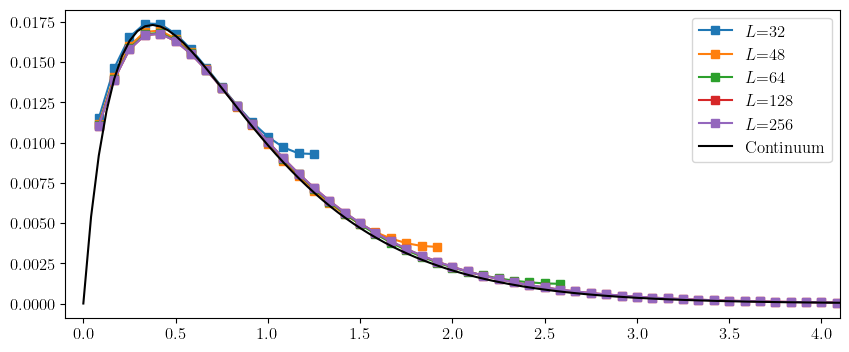

In [7]:
# periodic boundary conditions, kappa = 0.24, L0 = 256

fig, ax = plt.subplots(figsize=(10, 4))

L = 32

xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022]
xG00_lattice = [0.011499652444900949, 0.01460560002541126, 0.01655356163179256, 0.01739313499341774, 0.017364573424373045, 0.016757865005153194, 0.01579938361809267, 0.014659484157261326, 0.013463136028469998, 0.012299806791490002, 0.011245887038358531, 0.010361644978030037, 0.00970389342245487, 0.00932598755388537, 0.009288382254217535]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L$={L}', marker='s')

L = 48

xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022, 1.3333333333333357, 1.4166666666666692, 1.5000000000000027, 1.5833333333333361, 1.6666666666666696, 1.750000000000003, 1.8333333333333366, 1.91666666666667]
xG00_lattice = [0.011158271077368939, 0.014091642155383216, 0.0160004305970938, 0.016881767546005528, 0.016947259439085448, 0.016456244909077017, 0.015613669461511362, 0.014565563753787886, 0.013415279601464113, 0.012230569598455438, 0.011060709687568768, 0.00993666038000202, 0.008880861428900521, 0.007905472315178678, 0.0070189336496775095, 0.00622648590740134, 0.005530199512499085, 0.004932111740281505, 0.0044340197798952595, 0.004039201529308336, 0.003750454792978256, 0.0035742866576468388, 0.0035193876366697552]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L$={L}', marker='s')

L = 64

xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022, 1.3333333333333357, 1.4166666666666692, 1.5000000000000027, 1.5833333333333361, 1.6666666666666696, 1.750000000000003, 1.8333333333333366, 1.91666666666667, 2.0000000000000036, 2.083333333333337, 2.1666666666666705, 2.250000000000004, 2.3333333333333375, 2.416666666666671, 2.5000000000000044, 2.583333333333338]
xG00_lattice = [0.011063353395263004, 0.013956186732260824, 0.015845153454220388, 0.016727975690919623, 0.016813036267432736, 0.016350632548597026, 0.015543274290275083, 0.0145327707665531, 0.013417910761775204, 0.012269735220299019, 0.011132205493847004, 0.010034588650502413, 0.008995588023214604, 0.008027278403422612, 0.007134536808726014, 0.0063188294004639985, 0.005580056924283593, 0.0049143902965245075, 0.00431844076305634, 0.003788396245793337, 0.0033192593882262564, 0.0029067379403993395, 0.0025467008206663364, 0.002235507256634004, 0.0019695831962000037, 0.0017465320970175026, 0.0015639285201210023, 0.0014206323688853344, 0.0013158335582774195, 0.0012497958750225014, 0.0012238482810247515]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L$={L}', marker='s')

L = 128

xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022, 1.3333333333333357, 1.4166666666666692, 1.5000000000000027, 1.5833333333333361, 1.6666666666666696, 1.750000000000003, 1.8333333333333366, 1.91666666666667, 2.0000000000000036, 2.083333333333337, 2.1666666666666705, 2.250000000000004, 2.3333333333333375, 2.416666666666671, 2.5000000000000044, 2.583333333333338, 2.6666666666666714, 2.750000000000005, 2.8333333333333384, 2.916666666666672, 3.0000000000000053, 3.083333333333339, 3.1666666666666723, 3.2500000000000058, 3.3333333333333393, 3.4166666666666727, 3.500000000000006, 3.5833333333333397, 3.666666666666673, 3.7500000000000067, 3.83333333333334, 3.9166666666666736, 4.000000000000007, 4.083333333333341, 4.166666666666674, 4.250000000000007, 4.333333333333341, 4.416666666666675, 4.500000000000008, 4.583333333333341, 4.666666666666675, 4.750000000000009, 4.833333333333342, 4.916666666666675, 5.000000000000009, 5.083333333333343, 5.166666666666676, 5.250000000000009]
xG00_lattice = [0.011037568116181206, 0.013907849858719876, 0.015784984936506142, 0.016668753937396787, 0.01675592216123907, 0.01630049135900967, 0.015502384160021834, 0.014502317795373362, 0.013401825484003956, 0.012265917925359108, 0.011140982721920642, 0.010056146397408039, 0.009029554255244092, 0.008072534788757028, 0.0071894787372506815, 0.00638312300204196, 0.005651545339582002, 0.004990992909392138, 0.004398448148516626, 0.0038681132414754376, 0.003396618182258041, 0.0029775872791423076, 0.002606585023813922, 0.0022789498994998034, 0.0019900136944650043, 0.0017359930707814529, 0.0015127061544828024, 0.0013171206430197691, 0.001145699234921544, 0.0009958889332447516, 0.0008649049419071098, 0.0007507580615784013, 0.0006512108085153014, 0.0005644963739078009, 0.0004890505498655008, 0.0004234540526217008, 0.0003664701029903171, 0.0003169771664868672, 0.00027405007991530036, 0.0002368194386026671, 0.00020456499939856704, 0.00017660983753595028, 0.0001524179801864835, 0.0001314864773563002, 0.00011339353764937529, 9.775522813306681e-05, 8.425067491110018e-05, 7.259664822880018e-05, 6.255148252424181e-05, 5.3894938849583453e-05, 4.6453239577350116e-05, 4.0063846402233395e-05, 3.4593782504850066e-05, 2.9921740844850077e-05, 2.595239645395839e-05, 2.260156585120004e-05, 1.979908403027504e-05, 1.748656889711668e-05, 1.5617941173158373e-05, 1.4157213301500032e-05, 1.3078690404225022e-05, 1.23650067541167e-05, 1.2009001151700015e-05]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L$={L}', marker='s')

L = 256

xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022, 1.3333333333333357, 1.4166666666666692, 1.5000000000000027, 1.5833333333333361, 1.6666666666666696, 1.750000000000003, 1.8333333333333366, 1.91666666666667, 2.0000000000000036, 2.083333333333337, 2.1666666666666705, 2.250000000000004, 2.3333333333333375, 2.416666666666671, 2.5000000000000044, 2.583333333333338, 2.6666666666666714, 2.750000000000005, 2.8333333333333384, 2.916666666666672, 3.0000000000000053, 3.083333333333339, 3.1666666666666723, 3.2500000000000058, 3.3333333333333393, 3.4166666666666727, 3.500000000000006, 3.5833333333333397, 3.666666666666673, 3.7500000000000067, 3.83333333333334, 3.9166666666666736, 4.000000000000007, 4.083333333333341, 4.166666666666674, 4.250000000000007, 4.333333333333341, 4.416666666666675, 4.500000000000008, 4.583333333333341, 4.666666666666675, 4.750000000000009, 4.833333333333342, 4.916666666666675, 5.000000000000009, 5.083333333333343, 5.166666666666676, 5.250000000000009, 5.333333333333343, 5.416666666666677, 5.50000000000001, 5.583333333333343, 5.666666666666677, 5.750000000000011, 5.833333333333344, 5.916666666666677, 6.000000000000011, 6.083333333333345, 6.166666666666678, 6.250000000000011, 6.333333333333345, 6.4166666666666785, 6.5000000000000115, 6.583333333333345, 6.6666666666666785, 6.750000000000012, 6.8333333333333455, 6.9166666666666785, 7.000000000000012, 7.083333333333346, 7.166666666666679, 7.250000000000012, 7.333333333333346, 7.41666666666668, 7.500000000000013, 7.583333333333346, 7.66666666666668, 7.750000000000014, 7.833333333333347, 7.91666666666668, 8.000000000000014, 8.083333333333348, 8.166666666666682, 8.250000000000014, 8.333333333333348, 8.416666666666682, 8.500000000000014, 8.583333333333348, 8.666666666666682, 8.750000000000016, 8.83333333333335, 8.916666666666682, 9.000000000000016, 9.08333333333335, 9.166666666666682, 9.250000000000016, 9.33333333333335, 9.416666666666684, 9.500000000000018, 9.58333333333335, 9.666666666666684, 9.750000000000018, 9.83333333333335, 9.916666666666684, 10.000000000000018, 10.083333333333352, 10.166666666666686, 10.250000000000018, 10.333333333333352, 10.416666666666686, 10.500000000000018, 10.583333333333352]
xG00_lattice = [0.011037532644634104, 0.013907779020084644, 0.0157848034042632, 0.016668514368054856, 0.01675561183681554, 0.01630028808180941, 0.015502055870615301, 0.01450187033830087, 0.01340163066086346, 0.012265739885434033, 0.011140845277876798, 0.010056050554569948, 0.00902940763973702, 0.008072362620226765, 0.007189353294022882, 0.0063833175577077215, 0.005651793045421866, 0.004991324144478011, 0.00439845834059307, 0.0038685767292786733, 0.0033969192210316444, 0.002977957607781572, 0.002607009679326563, 0.0022793003714612066, 0.0019904197156370867, 0.0017363231340429028, 0.0015132601381493288, 0.0013175434767933704, 0.0011461362588141427, 0.0009963585943282526, 0.0008655341628813939, 0.000751335316358134, 0.0006518055494200265, 0.0005651258260786175, 0.0004896833295182508, 0.0004241032458330009, 0.0003671269075825838, 0.0003176382980558341, 0.0002747274927364505, 0.00023750829046700038, 0.00020525299938265043, 0.00017730632446905038, 0.0001531138924251337, 0.00013217279054210032, 0.00011406539967225018, 9.840459365663351e-05, 8.487172134753347e-05, 7.318062683640013e-05, 6.308380817870842e-05, 5.4363090752916745e-05, 4.683734074317506e-05, 4.034394283746674e-05, 3.474356410487508e-05, 2.991388923405006e-05, 2.5751569937958398e-05, 2.2162334488466688e-05, 1.9070433294975046e-05, 1.640662261266669e-05, 1.4112783956425021e-05, 1.2137337757000019e-05, 1.0436575899691687e-05, 8.972684612100019e-06, 7.713043973827513e-06, 6.629394058026679e-06, 5.696730248083349e-06, 4.894992110195008e-06, 4.205379306105005e-06, 3.612721737913345e-06, 3.1027552035075027e-06, 2.664641444150004e-06, 2.2881496562725044e-06, 1.964569626360004e-06, 1.6866012982533373e-06, 1.4477583468900032e-06, 1.242633620125002e-06, 1.0664919797066683e-06, 9.151389859150013e-07, 7.852485892550009e-07, 6.737091520500014e-07, 5.77965275066668e-07, 4.957716564675012e-07, 4.252744103266672e-07, 3.6473238567750077e-07, 3.1279547754000055e-07, 2.6822420572083384e-07, 2.2999234165833373e-07, 1.9719271483750029e-07, 1.6905002048000022e-07, 1.4492109521250032e-07, 1.2422480625000035e-07, 1.0647323098533351e-07, 9.125133907500015e-08, 7.82072408742502e-08, 6.70161313371668e-08, 5.7422704938333427e-08, 4.9200759872000095e-08, 4.215280744925007e-08, 3.611141820650004e-08, 3.093409691625005e-08, 2.649686162500004e-08, 2.2695007166250033e-08, 1.943628581000004e-08, 1.6645349642333357e-08, 1.4253715866000015e-08, 1.2204918670000018e-08, 1.0450722735166687e-08, 8.947769712000016e-09, 7.660883655000014e-09, 6.559406023916677e-09, 5.616162401666678e-09, 4.809288379000011e-09, 4.11926228933334e-09, 3.529532305833343e-09, 3.0256819800000033e-09, 2.5959089533333373e-09, 2.2297795161666714e-09, 1.9185754497000043e-09, 1.654774192783336e-09, 1.4320864153750013e-09, 1.2452318600000025e-09, 1.089748863958335e-09, 9.620207072666685e-10, 8.589880459500013e-10, 7.784122599000016e-10, 7.18368939583335e-10, 6.775785229500008e-10, 6.553226278416673e-10]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L$={L}', marker='s')

scale = 1/np.pi
ax.plot(xm_values, scale*np.array(integral_values), label='Continuum', color='black')

ax.set_xlim(-0.1, 4.1)
ax.legend()

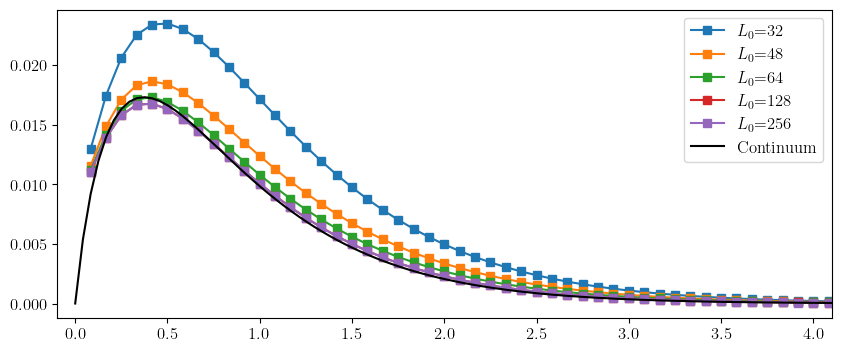

In [8]:
# periodic boundary conditions, kappa = 0.24, L = 256

fig, ax = plt.subplots(figsize=(10, 4))

L0 = 32

xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022, 1.3333333333333357, 1.4166666666666692, 1.5000000000000027, 1.5833333333333361, 1.6666666666666696, 1.750000000000003, 1.8333333333333366, 1.91666666666667, 2.0000000000000036, 2.083333333333337, 2.1666666666666705, 2.250000000000004, 2.3333333333333375, 2.416666666666671, 2.5000000000000044, 2.583333333333338, 2.6666666666666714, 2.750000000000005, 2.8333333333333384, 2.916666666666672, 3.0000000000000053, 3.083333333333339, 3.1666666666666723, 3.2500000000000058, 3.3333333333333393, 3.4166666666666727, 3.500000000000006, 3.5833333333333397, 3.666666666666673, 3.7500000000000067, 3.83333333333334, 3.9166666666666736, 4.000000000000007, 4.083333333333341, 4.166666666666674, 4.250000000000007, 4.333333333333341, 4.416666666666675, 4.500000000000008, 4.583333333333341, 4.666666666666675, 4.750000000000009, 4.833333333333342, 4.916666666666675, 5.000000000000009, 5.083333333333343, 5.166666666666676, 5.250000000000009, 5.333333333333343, 5.416666666666677, 5.50000000000001, 5.583333333333343, 5.666666666666677, 5.750000000000011, 5.833333333333344, 5.916666666666677, 6.000000000000011, 6.083333333333345, 6.166666666666678, 6.250000000000011, 6.333333333333345, 6.4166666666666785, 6.5000000000000115, 6.583333333333345, 6.6666666666666785, 6.750000000000012, 6.8333333333333455, 6.9166666666666785, 7.000000000000012, 7.083333333333346, 7.166666666666679, 7.250000000000012, 7.333333333333346, 7.41666666666668, 7.500000000000013, 7.583333333333346, 7.66666666666668, 7.750000000000014, 7.833333333333347, 7.91666666666668, 8.000000000000014, 8.083333333333348, 8.166666666666682, 8.250000000000014, 8.333333333333348, 8.416666666666682, 8.500000000000014, 8.583333333333348, 8.666666666666682, 8.750000000000016, 8.83333333333335, 8.916666666666682, 9.000000000000016, 9.08333333333335, 9.166666666666682, 9.250000000000016, 9.33333333333335, 9.416666666666684, 9.500000000000018, 9.58333333333335, 9.666666666666684, 9.750000000000018, 9.83333333333335, 9.916666666666684, 10.000000000000018, 10.083333333333352, 10.166666666666686, 10.250000000000018, 10.333333333333352, 10.416666666666686, 10.500000000000018, 10.583333333333352]
xG00_lattice = [0.012951625000000022, 0.01743249333333336, 0.020626760000000032, 0.022534600000000033, 0.023397625000000047, 0.02348175000000005, 0.02301938333333338, 0.022179800000000038, 0.021088350000000044, 0.019840833333333363, 0.01850805000000004, 0.01713930000000003, 0.015776041666666695, 0.014444266666666691, 0.013164500000000023, 0.011948666666666689, 0.010805766666666687, 0.009741600000000019, 0.008757258333333351, 0.007851000000000014, 0.007021350000000013, 0.006264976666666677, 0.00558031750000001, 0.0049605800000000096, 0.004402333333333341, 0.00390082333333334, 0.0034512750000000067, 0.003049503333333339, 0.0026911033333333386, 0.002372025000000004, 0.002088366666666671, 0.0018368000000000028, 0.0016140300000000022, 0.0014167233333333355, 0.0012427916666666687, 0.0010891800000000019, 0.0009538476666666684, 0.0008346953333333348, 0.0007299337500000011, 0.0006378966666666678, 0.0005571353333333345, 0.0004862900000000008, 0.00042421291666666747, 0.0003698676666666672, 0.0003223237500000006, 0.0002807456666666671, 0.0002444078333333338, 0.00021268800000000037, 0.00018499133333333366, 0.00016083333333333357, 0.0001397910000000002, 0.00012145250000000023, 0.00010547706666666689, 9.156960000000017e-05, 7.946858333333348e-05, 6.894253333333345e-05, 5.979347500000009e-05, 5.184233333333344e-05, 4.493440000000007e-05, 3.8937500000000066e-05, 3.3730458333333394e-05, 2.9210783333333386e-05, 2.529082500000004e-05, 2.1892266666666704e-05, 1.8945333333333367e-05, 1.639110000000003e-05, 1.4177925833333362e-05, 1.2261136666666682e-05, 1.0600700000000022e-05, 9.163641666666682e-06, 7.919695000000013e-06, 6.843000000000012e-06, 5.911661666666676e-06, 5.106185000000009e-06, 4.409812500000006e-06, 3.8075366666666736e-06, 3.2873866666666723e-06, 2.8371200000000064e-06, 2.44794666666667e-06, 2.1125866666666704e-06, 1.822547250000003e-06, 1.5721245000000028e-06, 1.355888000000003e-06, 1.1692800000000017e-06, 1.0082133333333347e-06, 8.691733333333346e-07, 7.491280000000009e-07, 6.456486666666678e-07, 5.563464166666674e-07, 4.79520000000001e-07, 4.130186666666672e-07, 3.5573333333333424e-07, 3.0652800000000035e-07, 2.6395200000000046e-07, 2.27290666666667e-07, 1.9571200000000037e-07, 1.6849546666666691e-07, 1.4506613333333353e-07, 1.2487200000000027e-07, 1.0746666666666694e-07, 9.248906666666688e-08, 7.958720000000007e-08, 6.850186666666673e-08, 5.893333333333345e-08, 5.070800000000007e-08, 4.3622456995884864e-08, 3.7549866666666717e-08, 3.228480000000007e-08, 2.7793546666666722e-08, 2.3918400000000044e-08, 2.058976000000002e-08, 1.7731840000000025e-08, 1.5277600000000037e-08, 1.3172320000000033e-08, 1.1371200000000027e-08, 9.830613333333348e-09, 8.514480000000018e-09, 7.394666666666679e-09, 6.448213333333342e-09, 5.651200000000013e-09, 4.988426666666677e-09, 4.440800000000008e-09, 3.9983200000000065e-09, 3.653866666666671e-09, 3.3933333333333415e-09, 3.2198880000000074e-09, 3.125554666666673e-09]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L_0$={L0}', marker='s')

L0 = 48

xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022, 1.3333333333333357, 1.4166666666666692, 1.5000000000000027, 1.5833333333333361, 1.6666666666666696, 1.750000000000003, 1.8333333333333366, 1.91666666666667, 2.0000000000000036, 2.083333333333337, 2.1666666666666705, 2.250000000000004, 2.3333333333333375, 2.416666666666671, 2.5000000000000044, 2.583333333333338, 2.6666666666666714, 2.750000000000005, 2.8333333333333384, 2.916666666666672, 3.0000000000000053, 3.083333333333339, 3.1666666666666723, 3.2500000000000058, 3.3333333333333393, 3.4166666666666727, 3.500000000000006, 3.5833333333333397, 3.666666666666673, 3.7500000000000067, 3.83333333333334, 3.9166666666666736, 4.000000000000007, 4.083333333333341, 4.166666666666674, 4.250000000000007, 4.333333333333341, 4.416666666666675, 4.500000000000008, 4.583333333333341, 4.666666666666675, 4.750000000000009, 4.833333333333342, 4.916666666666675, 5.000000000000009, 5.083333333333343, 5.166666666666676, 5.250000000000009, 5.333333333333343, 5.416666666666677, 5.50000000000001, 5.583333333333343, 5.666666666666677, 5.750000000000011, 5.833333333333344, 5.916666666666677, 6.000000000000011, 6.083333333333345, 6.166666666666678, 6.250000000000011, 6.333333333333345, 6.4166666666666785, 6.5000000000000115, 6.583333333333345, 6.6666666666666785, 6.750000000000012, 6.8333333333333455, 6.9166666666666785, 7.000000000000012, 7.083333333333346, 7.166666666666679, 7.250000000000012, 7.333333333333346, 7.41666666666668, 7.500000000000013, 7.583333333333346, 7.66666666666668, 7.750000000000014, 7.833333333333347, 7.91666666666668, 8.000000000000014, 8.083333333333348, 8.166666666666682, 8.250000000000014, 8.333333333333348, 8.416666666666682, 8.500000000000014, 8.583333333333348, 8.666666666666682, 8.750000000000016, 8.83333333333335, 8.916666666666682, 9.000000000000016, 9.08333333333335, 9.166666666666682, 9.250000000000016, 9.33333333333335, 9.416666666666684, 9.500000000000018, 9.58333333333335, 9.666666666666684, 9.750000000000018, 9.83333333333335, 9.916666666666684, 10.000000000000018, 10.083333333333352, 10.166666666666686, 10.250000000000018, 10.333333333333352, 10.416666666666686, 10.500000000000018, 10.583333333333352]
xG00_lattice = [0.011540734166666684, 0.014858340000000022, 0.017108523000000042, 0.018301093266666704, 0.018638270833333373, 0.018375605000000027, 0.017717840000000033, 0.016812980000000036, 0.01576455000000003, 0.014642658333333357, 0.013500675833333357, 0.012372350000000018, 0.01128181166666669, 0.010242738333333352, 0.009265087500000015, 0.008353893333333348, 0.007510033333333349, 0.006735000000000011, 0.006026594166666677, 0.0053805666666666765, 0.004795245000000009, 0.00426570833333334, 0.003788694166666674, 0.003360040000000007, 0.002975708333333338, 0.0026318933333333394, 0.0023249700000000035, 0.002051513333333337, 0.0018081500000000034, 0.0015921275000000026, 0.0014004766666666688, 0.0012307120000000023, 0.0010807610000000021, 0.0009482430000000018, 0.0008312908333333349, 0.0007282080000000013, 0.0006374853333333346, 0.0005576563333333343, 0.0004875390000000008, 0.00042595000000000084, 0.00037193833333333396, 0.00032459000000000063, 0.0002831370833333339, 0.0002468180000000003, 0.00021504750000000042, 0.00018730050000000036, 0.000163037516666667, 0.00014186280000000025, 0.0001233885333333336, 0.00010727208333333355, 9.32271500000002e-05, 8.099130000000014e-05, 7.033276666666679e-05, 6.10591500000001e-05, 5.2988375000000096e-05, 4.5969933333333417e-05, 3.986912500000007e-05, 3.4565100000000067e-05, 2.9962166666666717e-05, 2.595600000000004e-05, 2.2488260000000044e-05, 1.9475750000000038e-05, 1.686216000000003e-05, 1.4595360000000025e-05, 1.2630745833333357e-05, 1.092806000000002e-05, 9.452527500000017e-06, 8.173996666666682e-06, 7.067555000000013e-06, 6.108900000000009e-06, 5.279737500000008e-06, 4.562160000000008e-06, 3.941087500000006e-06, 3.4041233333333392e-06, 2.939825000000005e-06, 2.538324000000004e-06, 2.191323750000004e-06, 1.8913830000000036e-06, 1.6322650833333364e-06, 1.408413333333336e-06, 1.215067500000002e-06, 1.0481035000000017e-06, 9.039668333333351e-07, 7.795060000000012e-07, 6.721020833333346e-07, 5.793963333333344e-07, 4.994090000000007e-07, 4.30437333333334e-07, 3.709371666666675e-07, 3.196192500000006e-07, 2.7536751666666713e-07, 2.3721280000000043e-07, 2.0431712500000042e-07, 1.759680000000003e-07, 1.5153133333333362e-07, 1.3047840000000025e-07, 1.1233489166666686e-07, 9.670640000000016e-08, 8.324415000000013e-08, 7.165166666666679e-08, 6.166050000000013e-08, 5.30663500000001e-08, 4.5661616666666756e-08, 3.929068000000007e-08, 3.380597500000006e-08, 2.9086400000000055e-08, 2.5025605833333376e-08, 2.1532590000000046e-08, 1.8528455833333372e-08, 1.5946791666666694e-08, 1.3727000000000016e-08, 1.182113333333335e-08, 1.0185349166666696e-08, 8.782085000000014e-09, 7.580416666666685e-09, 6.553033333333352e-09, 5.676060000000012e-09, 4.930531666666676e-09, 4.299559250000009e-09, 3.768290000000008e-09, 3.3251707500000077e-09, 2.960269000000005e-09, 2.6656355000000063e-09, 2.434843333333338e-09, 2.2629791666666716e-09, 2.146641000000004e-09, 2.083752500000004e-09]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L_0$={L0}', marker='s')

L0 = 64

xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022, 1.3333333333333357, 1.4166666666666692, 1.5000000000000027, 1.5833333333333361, 1.6666666666666696, 1.750000000000003, 1.8333333333333366, 1.91666666666667, 2.0000000000000036, 2.083333333333337, 2.1666666666666705, 2.250000000000004, 2.3333333333333375, 2.416666666666671, 2.5000000000000044, 2.583333333333338, 2.6666666666666714, 2.750000000000005, 2.8333333333333384, 2.916666666666672, 3.0000000000000053, 3.083333333333339, 3.1666666666666723, 3.2500000000000058, 3.3333333333333393, 3.4166666666666727, 3.500000000000006, 3.5833333333333397, 3.666666666666673, 3.7500000000000067, 3.83333333333334, 3.9166666666666736, 4.000000000000007, 4.083333333333341, 4.166666666666674, 4.250000000000007, 4.333333333333341, 4.416666666666675, 4.500000000000008, 4.583333333333341, 4.666666666666675, 4.750000000000009, 4.833333333333342, 4.916666666666675, 5.000000000000009, 5.083333333333343, 5.166666666666676, 5.250000000000009, 5.333333333333343, 5.416666666666677, 5.50000000000001, 5.583333333333343, 5.666666666666677, 5.750000000000011, 5.833333333333344, 5.916666666666677, 6.000000000000011, 6.083333333333345, 6.166666666666678, 6.250000000000011, 6.333333333333345, 6.4166666666666785, 6.5000000000000115, 6.583333333333345, 6.6666666666666785, 6.750000000000012, 6.8333333333333455, 6.9166666666666785, 7.000000000000012, 7.083333333333346, 7.166666666666679, 7.250000000000012, 7.333333333333346, 7.41666666666668, 7.500000000000013, 7.583333333333346, 7.66666666666668, 7.750000000000014, 7.833333333333347, 7.91666666666668, 8.000000000000014, 8.083333333333348, 8.166666666666682, 8.250000000000014, 8.333333333333348, 8.416666666666682, 8.500000000000014, 8.583333333333348, 8.666666666666682, 8.750000000000016, 8.83333333333335, 8.916666666666682, 9.000000000000016, 9.08333333333335, 9.166666666666682, 9.250000000000016, 9.33333333333335, 9.416666666666684, 9.500000000000018, 9.58333333333335, 9.666666666666684, 9.750000000000018, 9.83333333333335, 9.916666666666684, 10.000000000000018, 10.083333333333352, 10.166666666666686, 10.250000000000018, 10.333333333333352, 10.416666666666686, 10.500000000000018, 10.583333333333352]
xG00_lattice = [0.011178898250000017, 0.014171320466666694, 0.01615719950000004, 0.01713078686666671, 0.017297506000000025, 0.01690362300000003, 0.016156925166666693, 0.015194206666666703, 0.014119147500000026, 0.01299830000000002, 0.011879266666666694, 0.010792580000000022, 0.009756727500000022, 0.00878456833333335, 0.007881675000000015, 0.007050746666666678, 0.00629167166666668, 0.005601817500000011, 0.004977042083333343, 0.00441508333333334, 0.003910082750000006, 0.003457872000000007, 0.003054062666666672, 0.002694350000000005, 0.002374343750000004, 0.0020902006666666697, 0.001838412000000004, 0.0016156933333333363, 0.0014186485833333358, 0.0012446750000000026, 0.001091355000000002, 0.0009562426666666684, 0.0008373007500000014, 0.0007326943333333349, 0.0006407741666666679, 0.0005600940000000011, 0.0004892787500000007, 0.00042721500000000065, 0.00037283317500000064, 0.00032523566666666724, 0.00028354814166666717, 0.00024710875000000037, 0.00021526373333333366, 0.000187442566666667, 0.00016315387500000025, 0.00014195715000000028, 0.00012346273333333353, 0.00010734160000000018, 9.32894666666668e-05, 8.105208333333346e-05, 7.039360000000011e-05, 6.111993333333344e-05, 5.304814166666676e-05, 4.6033200000000086e-05, 3.9930458333333416e-05, 3.4624846666666734e-05, 3.001800500000006e-05, 2.601855833333337e-05, 2.254340833333337e-05, 1.9528650000000032e-05, 1.69125041666667e-05, 1.4643160000000027e-05, 1.2675442500000024e-05, 1.0969706666666684e-05, 9.491083333333345e-06, 8.209850000000011e-06, 7.100325000000011e-06, 6.1394933333333436e-06, 5.3071925000000086e-06, 4.587566666666673e-06, 3.964036500000006e-06, 3.425034000000004e-06, 2.9586352500000056e-06, 2.555287833333338e-06, 2.206537500000004e-06, 1.9050476666666703e-06, 1.64449541666667e-06, 1.419379000000003e-06, 1.2248423333333363e-06, 1.0568000000000019e-06, 9.117225000000018e-07, 7.863526666666682e-07, 6.782275833333346e-07, 5.848290000000011e-07, 5.042058333333342e-07, 4.3469775000000083e-07, 3.746807250000007e-07, 3.2291013333333386e-07, 2.782681416666671e-07, 2.397607500000004e-07, 2.0655786666666698e-07, 1.7793720000000037e-07, 1.5326090000000028e-07, 1.319955833333336e-07, 1.1366116666666687e-07, 9.787040000000018e-08, 8.42598583333335e-08, 7.253551666666678e-08, 6.24318750000001e-08, 5.373816666666677e-08, 4.625000416666676e-08, 3.9801335000000064e-08, 3.4248959166666724e-08, 2.946978666666672e-08, 2.535513750000005e-08, 2.181559500000004e-08, 1.87700291666667e-08, 1.6150500000000033e-08, 1.3896500833333357e-08, 1.196011666666669e-08, 1.0295527500000016e-08, 8.866386666666683e-09, 7.63889416666668e-09, 6.58682500000001e-09, 5.685389166666676e-09, 4.914813666666676e-09, 4.257259500000008e-09, 3.6981691666666744e-09, 3.2246818333333383e-09, 2.8262200000000043e-09, 2.493880583333338e-09, 2.2202271666666713e-09, 1.9992420000000038e-09, 1.8261790000000028e-09, 1.6972708333333359e-09, 1.610007000000003e-09, 1.5627773333333356e-09]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L_0$={L0}', marker='s')

L0 = 128

xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022, 1.3333333333333357, 1.4166666666666692, 1.5000000000000027, 1.5833333333333361, 1.6666666666666696, 1.750000000000003, 1.8333333333333366, 1.91666666666667, 2.0000000000000036, 2.083333333333337, 2.1666666666666705, 2.250000000000004, 2.3333333333333375, 2.416666666666671, 2.5000000000000044, 2.583333333333338, 2.6666666666666714, 2.750000000000005, 2.8333333333333384, 2.916666666666672, 3.0000000000000053, 3.083333333333339, 3.1666666666666723, 3.2500000000000058, 3.3333333333333393, 3.4166666666666727, 3.500000000000006, 3.5833333333333397, 3.666666666666673, 3.7500000000000067, 3.83333333333334, 3.9166666666666736, 4.000000000000007, 4.083333333333341, 4.166666666666674, 4.250000000000007, 4.333333333333341, 4.416666666666675, 4.500000000000008, 4.583333333333341, 4.666666666666675, 4.750000000000009, 4.833333333333342, 4.916666666666675, 5.000000000000009, 5.083333333333343, 5.166666666666676, 5.250000000000009, 5.333333333333343, 5.416666666666677, 5.50000000000001, 5.583333333333343, 5.666666666666677, 5.750000000000011, 5.833333333333344, 5.916666666666677, 6.000000000000011, 6.083333333333345, 6.166666666666678, 6.250000000000011, 6.333333333333345, 6.4166666666666785, 6.5000000000000115, 6.583333333333345, 6.6666666666666785, 6.750000000000012, 6.8333333333333455, 6.9166666666666785, 7.000000000000012, 7.083333333333346, 7.166666666666679, 7.250000000000012, 7.333333333333346, 7.41666666666668, 7.500000000000013, 7.583333333333346, 7.66666666666668, 7.750000000000014, 7.833333333333347, 7.91666666666668, 8.000000000000014, 8.083333333333348, 8.166666666666682, 8.250000000000014, 8.333333333333348, 8.416666666666682, 8.500000000000014, 8.583333333333348, 8.666666666666682, 8.750000000000016, 8.83333333333335, 8.916666666666682, 9.000000000000016, 9.08333333333335, 9.166666666666682, 9.250000000000016, 9.33333333333335, 9.416666666666684, 9.500000000000018, 9.58333333333335, 9.666666666666684, 9.750000000000018, 9.83333333333335, 9.916666666666684, 10.000000000000018, 10.083333333333352, 10.166666666666686, 10.250000000000018, 10.333333333333352, 10.416666666666686, 10.500000000000018, 10.583333333333352]
xG00_lattice = [0.011038160169500025, 0.01390904969400004, 0.015787453821000018, 0.016671869878000053, 0.01675888076916671, 0.016304376392900024, 0.015506369645666682, 0.014506561176666695, 0.013406419030500029, 0.012272622361666683, 0.01114616187850002, 0.010061484480000018, 0.009035069550000016, 0.008077944163333345, 0.0071959766750000105, 0.0063893306266666755, 0.005657610766666679, 0.004997382045000011, 0.004404693382500006, 0.0038746213666666753, 0.0034024992575000055, 0.002983385478333339, 0.0026122378225000046, 0.002284275560000005, 0.0019953342291666723, 0.0017410584966666702, 0.0015178292775000026, 0.001321870853333336, 0.001150361511666669, 0.001000299100000002, 0.0008691555766666681, 0.0007548112533333344, 0.0006550559675000014, 0.0005681648483333346, 0.000492554358333334, 0.0004267934700000008, 0.00036965007250000054, 0.0003199874866666673, 0.00027690445250000054, 0.00023953418000000046, 0.00020713526291666714, 0.00017903489450000036, 0.0001547032500000002, 0.00013364657533333356, 0.00011542560000000025, 9.965359883333359e-05, 8.601588675000015e-05, 7.422947600000014e-05, 6.404101958333343e-05, 5.5238362500000085e-05, 4.7638862000000066e-05, 4.1076325333333384e-05, 3.540702541666674e-05, 3.0514567500000066e-05, 2.629658166666672e-05, 2.265749733333338e-05, 1.951841500000003e-05, 1.681173983333336e-05, 1.4478482000000016e-05, 1.2467240000000018e-05, 1.073411408333335e-05, 9.240495500000019e-06, 7.954020900000013e-06, 6.845996800000012e-06, 5.89147433333334e-06, 5.069600800000011e-06, 4.361692183333342e-06, 3.7525998333333418e-06, 3.227928675000001e-06, 2.7765447500000046e-06, 2.3880536416666708e-06, 2.0537484000000035e-06, 1.7661084666666693e-06, 1.5186230666666698e-06, 1.3056812500000021e-06, 1.1225478666666688e-06, 9.650564000000016e-07, 8.295748500000015e-07, 7.130875750000011e-07, 6.128873333333346e-07, 5.267594700000011e-07, 4.526940516666677e-07, 3.8901643500000075e-07, 3.342847200000007e-07, 2.872366750000007e-07, 2.467961350000004e-07, 2.120335000000004e-07, 1.8216506000000034e-07, 1.5649122166666705e-07, 1.3443112500000024e-07, 1.1547043083333354e-07, 9.918688666666683e-08, 8.519048000000019e-08, 7.316419500000018e-08, 6.283434583333347e-08, 5.39593600000001e-08, 4.633924416666672e-08, 3.9791103333333404e-08, 3.4166723250000026e-08, 2.9336850000000048e-08, 2.5189442083333378e-08, 2.1625717000000033e-08, 1.856725208333336e-08, 1.5940444000000025e-08, 1.3684991250000023e-08, 1.1749207833333354e-08, 1.0087523083333354e-08, 8.66088900000002e-09, 7.436961000000014e-09, 6.386985000000009e-09, 5.486646750000013e-09, 4.7146960000000085e-09, 4.053423000000007e-09, 3.487507000000005e-09, 3.0034454166666713e-09, 2.5903931000000045e-09, 2.2385132250000047e-09, 1.9396977666666698e-09, 1.686987633333336e-09, 1.4746130000000021e-09, 1.2976211416666693e-09, 1.152126316666669e-09, 1.0346237250000017e-09, 9.426304333333351e-10, 8.741520833333345e-10, 8.277066000000012e-10, 8.025288750000017e-10]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L_0$={L0}', marker='s')

L0 = 256

xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022, 1.3333333333333357, 1.4166666666666692, 1.5000000000000027, 1.5833333333333361, 1.6666666666666696, 1.750000000000003, 1.8333333333333366, 1.91666666666667, 2.0000000000000036, 2.083333333333337, 2.1666666666666705, 2.250000000000004, 2.3333333333333375, 2.416666666666671, 2.5000000000000044, 2.583333333333338, 2.6666666666666714, 2.750000000000005, 2.8333333333333384, 2.916666666666672, 3.0000000000000053, 3.083333333333339, 3.1666666666666723, 3.2500000000000058, 3.3333333333333393, 3.4166666666666727, 3.500000000000006, 3.5833333333333397, 3.666666666666673, 3.7500000000000067, 3.83333333333334, 3.9166666666666736, 4.000000000000007, 4.083333333333341, 4.166666666666674, 4.250000000000007, 4.333333333333341, 4.416666666666675, 4.500000000000008, 4.583333333333341, 4.666666666666675, 4.750000000000009, 4.833333333333342, 4.916666666666675, 5.000000000000009, 5.083333333333343, 5.166666666666676, 5.250000000000009, 5.333333333333343, 5.416666666666677, 5.50000000000001, 5.583333333333343, 5.666666666666677, 5.750000000000011, 5.833333333333344, 5.916666666666677, 6.000000000000011, 6.083333333333345, 6.166666666666678, 6.250000000000011, 6.333333333333345, 6.4166666666666785, 6.5000000000000115, 6.583333333333345, 6.6666666666666785, 6.750000000000012, 6.8333333333333455, 6.9166666666666785, 7.000000000000012, 7.083333333333346, 7.166666666666679, 7.250000000000012, 7.333333333333346, 7.41666666666668, 7.500000000000013, 7.583333333333346, 7.66666666666668, 7.750000000000014, 7.833333333333347, 7.91666666666668, 8.000000000000014, 8.083333333333348, 8.166666666666682, 8.250000000000014, 8.333333333333348, 8.416666666666682, 8.500000000000014, 8.583333333333348, 8.666666666666682, 8.750000000000016, 8.83333333333335, 8.916666666666682, 9.000000000000016, 9.08333333333335, 9.166666666666682, 9.250000000000016, 9.33333333333335, 9.416666666666684, 9.500000000000018, 9.58333333333335, 9.666666666666684, 9.750000000000018, 9.83333333333335, 9.916666666666684, 10.000000000000018, 10.083333333333352, 10.166666666666686, 10.250000000000018, 10.333333333333352, 10.416666666666686, 10.500000000000018, 10.583333333333352]
xG00_lattice = [0.011037532644634104, 0.013907779020084644, 0.0157848034042632, 0.016668514368054856, 0.01675561183681554, 0.01630028808180941, 0.015502055870615301, 0.01450187033830087, 0.01340163066086346, 0.012265739885434033, 0.011140845277876798, 0.010056050554569948, 0.00902940763973702, 0.008072362620226765, 0.007189353294022882, 0.0063833175577077215, 0.005651793045421866, 0.004991324144478011, 0.00439845834059307, 0.0038685767292786733, 0.0033969192210316444, 0.002977957607781572, 0.002607009679326563, 0.0022793003714612066, 0.0019904197156370867, 0.0017363231340429028, 0.0015132601381493288, 0.0013175434767933704, 0.0011461362588141427, 0.0009963585943282526, 0.0008655341628813939, 0.000751335316358134, 0.0006518055494200265, 0.0005651258260786175, 0.0004896833295182508, 0.0004241032458330009, 0.0003671269075825838, 0.0003176382980558341, 0.0002747274927364505, 0.00023750829046700038, 0.00020525299938265043, 0.00017730632446905038, 0.0001531138924251337, 0.00013217279054210032, 0.00011406539967225018, 9.840459365663351e-05, 8.487172134753347e-05, 7.318062683640013e-05, 6.308380817870842e-05, 5.4363090752916745e-05, 4.683734074317506e-05, 4.034394283746674e-05, 3.474356410487508e-05, 2.991388923405006e-05, 2.5751569937958398e-05, 2.2162334488466688e-05, 1.9070433294975046e-05, 1.640662261266669e-05, 1.4112783956425021e-05, 1.2137337757000019e-05, 1.0436575899691687e-05, 8.972684612100019e-06, 7.713043973827513e-06, 6.629394058026679e-06, 5.696730248083349e-06, 4.894992110195008e-06, 4.205379306105005e-06, 3.612721737913345e-06, 3.1027552035075027e-06, 2.664641444150004e-06, 2.2881496562725044e-06, 1.964569626360004e-06, 1.6866012982533373e-06, 1.4477583468900032e-06, 1.242633620125002e-06, 1.0664919797066683e-06, 9.151389859150013e-07, 7.852485892550009e-07, 6.737091520500014e-07, 5.77965275066668e-07, 4.957716564675012e-07, 4.252744103266672e-07, 3.6473238567750077e-07, 3.1279547754000055e-07, 2.6822420572083384e-07, 2.2999234165833373e-07, 1.9719271483750029e-07, 1.6905002048000022e-07, 1.4492109521250032e-07, 1.2422480625000035e-07, 1.0647323098533351e-07, 9.125133907500015e-08, 7.82072408742502e-08, 6.70161313371668e-08, 5.7422704938333427e-08, 4.9200759872000095e-08, 4.215280744925007e-08, 3.611141820650004e-08, 3.093409691625005e-08, 2.649686162500004e-08, 2.2695007166250033e-08, 1.943628581000004e-08, 1.6645349642333357e-08, 1.4253715866000015e-08, 1.2204918670000018e-08, 1.0450722735166687e-08, 8.947769712000016e-09, 7.660883655000014e-09, 6.559406023916677e-09, 5.616162401666678e-09, 4.809288379000011e-09, 4.11926228933334e-09, 3.529532305833343e-09, 3.0256819800000033e-09, 2.5959089533333373e-09, 2.2297795161666714e-09, 1.9185754497000043e-09, 1.654774192783336e-09, 1.4320864153750013e-09, 1.2452318600000025e-09, 1.089748863958335e-09, 9.620207072666685e-10, 8.589880459500013e-10, 7.784122599000016e-10, 7.18368939583335e-10, 6.775785229500008e-10, 6.553226278416673e-10]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L_0$={L0}', marker='s')

scale = 1/np.pi
ax.plot(xm_values, scale*np.array(integral_values), label='Continuum', color='black')

ax.set_xlim(-0.1, 4.1)
ax.legend()

## Anti-periodic B.C. with $\kappa = 0.245$

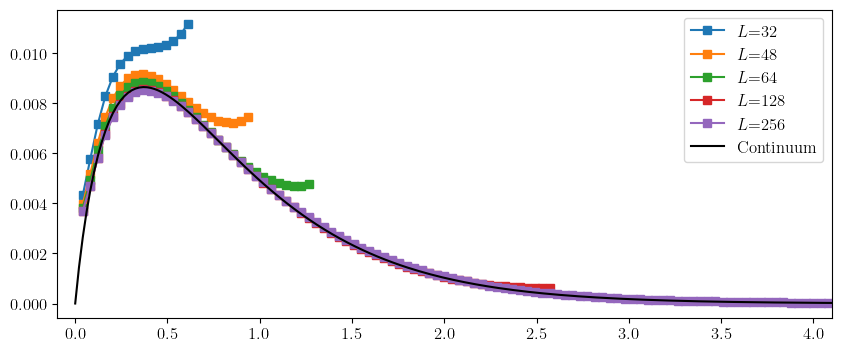

In [9]:
# anti-periodic boundary conditions, kappa = 0.245, L0 = 256

xm_values = [0.0, 0.020488195278111267, 0.040976390556222535, 0.0614645858343338, 0.08195278111244507, 0.10244097639055634, 0.1229291716686676, 0.14341736694677887, 0.16390556222489014, 0.1843937575030014, 0.20488195278111268, 0.22537014805922392, 0.2458583433373352, 0.2663465386154465, 0.28683473389355774, 0.307322929171669, 0.3278111244497803, 0.3482993197278915, 0.3687875150060028, 0.38927571028411406, 0.40976390556222536, 0.4302521008403366, 0.45074029611844785, 0.47122849139655915, 0.4917166866746704, 0.5122048819527817, 0.532693077230893, 0.5531812725090042, 0.5736694677871155, 0.5941576630652268, 0.614645858343338, 0.6351340536214493, 0.6556222488995606, 0.6761104441776717, 0.696598639455783, 0.7170868347338945, 0.7375750300120056, 0.7580632252901168, 0.7785514205682281, 0.7990396158463395, 0.8195278111244507, 0.8400160064025619, 0.8605042016806732, 0.8809923969587845, 0.9014805922368957, 0.921968787515007, 0.9424569827931183, 0.9629451780712296, 0.9834333733493408, 1.003921568627452, 1.0244097639055634, 1.0448979591836747, 1.065386154461786, 1.085874349739897, 1.1063625450180083, 1.1268507402961196, 1.147338935574231, 1.1678271308523422, 1.1883153261304535, 1.2088035214085648, 1.229291716686676, 1.2497799119647872, 1.2702681072428985, 1.2907563025210098, 1.3112444977991211, 1.3317326930772322, 1.3522208883553435, 1.372709083633455, 1.393197278911566, 1.4136854741896774, 1.434173669467789, 1.4546618647459, 1.4751500600240113, 1.4956382553021224, 1.5161264505802337, 1.5366146458583452, 1.5571028411364563, 1.5775910364145675, 1.598079231692679, 1.6185674269707901, 1.6390556222489014, 1.6595438175270125, 1.6800320128051238, 1.7005202080832353, 1.7210084033613464, 1.7414965986394577, 1.761984793917569, 1.7824729891956803, 1.8029611844737914, 1.8234493797519027, 1.843937575030014, 1.8644257703081253, 1.8849139655862366, 1.9054021608643477, 1.9258903561424592, 1.9463785514205705, 1.9668667466986816, 1.9873549419767929, 2.007843137254904, 2.0283313325330155, 2.0488195278111268, 2.069307723089238, 2.0897959183673493, 2.1102841136454606, 2.130772308923572, 2.151260504201683, 2.171748699479794, 2.192236894757906, 2.2127250900360167, 2.233213285314128, 2.2537014805922393, 2.2741896758703506, 2.294677871148462, 2.315166066426573, 2.3356542617046845, 2.356142456982796, 2.376630652260907, 2.3971188475390184, 2.4176070428171297, 2.438095238095241, 2.458583433373352, 2.479071628651463, 2.4995598239295744, 2.5200480192076857, 2.540536214485797, 2.5610244097639083, 2.5815126050420196, 2.602000800320131, 2.6224889955982422, 2.6429771908763535, 2.6634653861544644, 2.6839535814325757, 2.704441776710687, 2.7249299719887987, 2.74541816726691, 2.7659063625450213, 2.786394557823132, 2.8068827531012435, 2.8273709483793548, 2.847859143657466, 2.868347338935578, 2.8888355342136887, 2.9093237294918, 2.9298119247699113, 2.9503001200480226, 2.970788315326134, 2.9912765106042447, 3.011764705882356, 3.0322529011604673, 3.052741096438579, 3.0732292917166903, 3.093717486994801, 3.1142056822729125, 3.134693877551024, 3.155182072829135, 3.175670268107246, 3.196158463385358, 3.216646658663469, 3.2371348539415803, 3.2576230492196916, 3.278111244497803, 3.2985994397759137, 3.319087635054025, 3.3395758303321363, 3.3600640256102476, 3.3805522208883594, 3.4010404161664707, 3.4215286114445815, 3.442016806722693, 3.462505002000804, 3.4829931972789154, 3.5034813925570263, 3.523969587835138, 3.5444577831132493, 3.5649459783913606, 3.585434173669472, 3.605922368947583, 3.626410564225694, 3.6468987595038054, 3.6673869547819167, 3.687875150060028, 3.7083633453381397, 3.7288515406162506, 3.749339735894362, 3.769827931172473, 3.7903161264505845, 3.8108043217286953, 3.8312925170068066, 3.8517807122849184, 3.8722689075630297, 3.892757102841141, 3.9132452981192523, 3.933733493397363, 3.9542216886754744, 3.9747098839535857, 3.995198079231697, 4.015686274509808, 4.03617446978792, 4.056662665066031, 4.077150860344142, 4.0976390556222535, 4.118127250900365, 4.138615446178476, 4.159103641456587, 4.179591836734699, 4.20008003201281, 4.220568227290921, 4.241056422569033, 4.261544617847144, 4.282032813125254, 4.302521008403366, 4.323009203681477, 4.343497398959588, 4.3639855942377, 4.384473789515812, 4.404961984793922, 4.425450180072033, 4.445938375350145, 4.466426570628256, 4.486914765906367, 4.507402961184479, 4.52789115646259, 4.548379351740701, 4.5688675470188125, 4.589355742296924, 4.609843937575035, 4.630332132853146, 4.650820328131258, 4.671308523409369, 4.69179671868748, 4.712284913965592, 4.732773109243703, 4.753261304521814, 4.7737494997999255, 4.794237695078037, 4.814725890356147, 4.835214085634259, 4.855702280912371, 4.876190476190482, 4.896678671468593, 4.917166866746704, 4.937655062024815, 4.958143257302926, 4.978631452581038, 4.999119647859149, 5.019607843137261, 5.0400960384153715, 5.060584233693483, 5.081072428971594, 5.101560624249705, 5.122048819527817, 5.142537014805928, 5.163025210084039, 5.1835134053621506, 5.204001600640262, 5.224489795918373]
integral_values = [0.0, 0.018183943882657105, 0.033237891291428436, 0.045992466717950924, 0.056882643895930514, 0.06620590853623418, 0.07418611795217618, 0.08100072620532155, 0.08679510602064483, 0.09169106684315688, 0.09579236497229958, 0.09918847585906461, 0.10195730684953197, 0.10416721256636757, 0.10587853755943644, 0.10714482494198954, 0.10801378208845647, 0.10852806512227739, 0.10872592528605608, 0.10864174805182142, 0.10830650756320044, 0.10774815327380255, 0.10699194159797877, 0.10606072243354059, 0.10497518831666218, 0.10375409229336917, 0.10241443942780948, 0.10097165590542262, 0.09943973897064229, 0.09783139036734248, 0.09615813549966723, 0.09443043016381188, 0.09265775641718006, 0.09084870890555123, 0.08901107277811726, 0.08715189415784833, 0.08527754400087206, 0.08339377606655454, 0.08150577962577735, 0.07961822745525535, 0.07773531959804317, 0.07586082329172252, 0.0739981095829433, 0.07215018652056172, 0.07031972995007388, 0.06850911144069036, 0.06672042401584592, 0.06495550574977885, 0.06321596143813754, 0.061503182510846986, 0.05981836533880791, 0.05816252807125674, 0.056536526127529824, 0.05494106645533618, 0.053376720657264065, 0.0518439370779699, 0.050343051936189445, 0.048874299578254156, 0.04743782192308938, 0.04603367716262921, 0.04466184777612966, 0.04332224790896533, 0.04201473018320481, 0.040739091940609665, 0.039495081009538774, 0.03828240101945785, 0.03710071627081217, 0.035949656225396004, 0.034828819631941614, 0.033737778316825714, 0.032676080665113384, 0.03164325481521723, 0.03063881158866845, 0.029662247174862853, 0.02871304558914292, 0.027790680921197963, 0.02689461938949366, 0.026024321216274206, 0.025179242336602178, 0.024358835953908555, 0.023562553953608012, 0.022789848185489264, 0.02204017162480754, 0.02131297942128422, 0.020607729844550015, 0.019923885133949513, 0.019260912260052856, 0.01861828360468921, 0.01799547756559592, 0.01739197909294066, 0.01680728015967723, 0.016240880175440245, 0.015692286345347646, 0.015161013978462602, 0.014646586752261145, 0.014148536933383395, 0.013666405560813617, 0.01319974259362541, 0.012748107026470645, 0.012311066975588526, 0.01188819973790917, 0.011479091825638573, 0.01108333897853724, 0.010700546155942377, 0.010330327510432601, 0.009972306344893682, 0.0096261150546129, 0.009291395055908485, 0.008967796702686834, 0.00865497919221551, 0.008352610461301802, 0.00806036707397552, 0.0077779341016900195, 0.007505004996976492, 0.007241281461413302, 0.00698647330870382, 0.006740298323592793, 0.006502482117292295, 0.00627275798003343, 0.006050866731308917, 0.005836556568324424, 0.005629582913132287, 0.005429708258880569, 0.005236702015572207, 0.0050503403556938905, 0.0048704060600415185, 0.004696688364038699, 0.004528982804784624, 0.0043670910692656315, 0.00421082084346864, 0.004059985663230545, 0.0039144047665212334, 0.0037739029475059114, 0.0036383104124932076, 0.0035074626378906503, 0.0033812002302739306, 0.003259368788662473, 0.0031418187690808595, 0.0030284053514739147, 0.0029189883090322472, 0.002813431879975073, 0.002711604641827955, 0.0026133793882245444, 0.0025186330082538526, 0.0024272463683673107, 0.00233910419685155, 0.002254094970879495, 0.0021721108061137583, 0.0020930473488789524, 0.00201680367087587, 0.0019432821664249515, 0.0018723884522184465, 0.0018040312695578797, 0.0017381223890504899, 0.0016745765177357654, 0.001613311208610924, 0.0015542467725221379, 0.0014973061923866165, 0.0014424150397089786, 0.0013895013933542205, 0.0013384957605382616, 0.0012893309999962353, 0.0012419422472878254, 0.0011962668421983816, 0.0011522442581939855, 0.001109816033888325, 0.001068925706478969, 0.00102951874711047, 0.000991542498125315, 0.000954946112138061, 0.0009196804929468252, 0.000885698238162616, 0.0008529535835738808, 0.0008214023491803479, 0.0007910018868590244, 0.0007617110296215332, 0.0007334900424224122, 0.0007063005744785204, 0.0006801056130602419, 0.0006548694387157319, 0.0006305575818900705, 0.000607136780901788, 0.0005845749412398854, 0.0005628410961451033, 0.0005419053684398961, 0.0005217389335722109, 0.000502313983838887, 0.00048360369375517406, 0.0004655821865375698, 0.00044822450166788166, 0.0004315065635071114, 0.00041540515092848443, 0.0003998978679396246, 0.0003849631152645852, 0.00037058006285714746, 0.000356728623317467, 0.0003433894261848562, 0.000330543793080148, 0.0003181737136717659, 0.00030626182244028135, 0.00029479137621689475, 0.0002837462324719169, 0.00027311082832995955, 0.0002628701602891716, 0.00025300976462246474, 0.00024351569843927793, 0.00023437452138701787, 0.00022557327797189582, 0.00021709948047944695, 0.00020894109247557652, 0.0002010865128695215, 0.00019352456052065505, 0.00018624445937157579, 0.0001792358240904406, 0.00017248864620599984, 0.00016599328071927407, 0.0001597404331762973, 0.00015372114718681287, 0.0001479267923742554, 0.00014234905274280736, 0.00013697991544773863, 0.00013181165995566535, 0.00012683684758177047, 0.00012204831139142727, 0.00011743914645406002, 0.00011300270043744614, 0.00010873256453104236, 0.00010462256468726602, 0.00010066675317001777, 9.685940040006634e-05, 9.319498708724838e-05, 8.966819663975383e-05, 8.627390784107966e-05, 8.300718778553642e-05, 7.98632850634855e-05, 7.683762318777017e-05, 7.392579425307773e-05, 7.112355282024488e-05, 6.84268100177683e-05, 6.58316278530469e-05, 6.333421372611917e-05, 6.093091513889969e-05, 5.861821459315116e-05, 5.6392724670648336e-05, 5.4251183289209974e-05, 5.219044912848448e-05, 5.0207497219577925e-05, 4.8299414692809896e-05, 4.646339667807742e-05, 4.469674235248708e-05, 4.299685113009964e-05, 4.1361218988802616e-05, 3.9787434929495695e-05, 3.82731775629364e-05, 3.681621181975137e-05, 3.5414385779271216e-05]

fig, ax = plt.subplots(figsize=(10, 4))

L = 32
xm_lattice = [0.04081632653061229, 0.08163265306122458, 0.12244897959183687, 0.16326530612244916, 0.20408163265306145, 0.24489795918367374, 0.28571428571428603, 0.3265306122448983, 0.3673469387755106, 0.4081632653061229, 0.4489795918367352, 0.4897959183673475, 0.5306122448979598, 0.5714285714285721, 0.6122448979591844]
xG00_lattice = [0.004324155012244868, 0.005773226693877595, 0.007173696783673456, 0.008285567183673443, 0.009071668489795962, 0.009592822285714333, 0.009912918685714344, 0.010089368483265384, 0.01017457584979592, 0.010216391055510202, 0.010255669519183677, 0.01033331474938775, 0.010488553569795925, 0.010762667668571414, 0.011192942845714282]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L$={L}', marker='s')
L = 48
xm_lattice = [0.04081632653061229, 0.08163265306122458, 0.12244897959183687, 0.16326530612244916, 0.20408163265306145, 0.24489795918367374, 0.28571428571428603, 0.3265306122448983, 0.3673469387755106, 0.4081632653061229, 0.4489795918367352, 0.4897959183673475, 0.5306122448979598, 0.5714285714285721, 0.6122448979591844, 0.6530612244897966, 0.6938775510204089, 0.7346938775510212, 0.7755102040816335, 0.8163265306122458, 0.8571428571428581, 0.8979591836734704, 0.9387755102040827]
xG00_lattice = [0.003969835297959197, 0.005184408032653045, 0.006435147942857157, 0.007458937306122456, 0.008202024979591842, 0.008704406889795922, 0.009008357257142866, 0.009154385502040832, 0.009177894587755118, 0.009106260244897973, 0.008965115061795934, 0.008771888761469407, 0.008547277347673488, 0.00830647880228573, 0.008063396848163276, 0.007831034823836753, 0.007621171073877563, 0.007445630431836753, 0.0073149573252245075, 0.007240138852244914, 0.0072327087891428735, 0.007304335759510216, 0.0074661814902041]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L$={L}', marker='s')
L = 64
xm_lattice = [0.04081632653061229, 0.08163265306122458, 0.12244897959183687, 0.16326530612244916, 0.20408163265306145, 0.24489795918367374, 0.28571428571428603, 0.3265306122448983, 0.3673469387755106, 0.4081632653061229, 0.4489795918367352, 0.4897959183673475, 0.5306122448979598, 0.5714285714285721, 0.6122448979591844, 0.6530612244897966, 0.6938775510204089, 0.7346938775510212, 0.7755102040816335, 0.8163265306122458, 0.8571428571428581, 0.8979591836734704, 0.9387755102040827, 0.979591836734695, 1.0204081632653073, 1.0612244897959195, 1.1020408163265318, 1.1428571428571441, 1.1836734693877564, 1.2244897959183687, 1.265306122448981]
xG00_lattice = [0.003826384836326544, 0.004936274541224502, 0.006120368351020412, 0.0071041208424489945, 0.007832162391836747, 0.008334727680000016, 0.008651315048571445, 0.008819418582857154, 0.00886693739510206, 0.008819169412244914, 0.00869613088367349, 0.008514150675918375, 0.0082879398244898, 0.008028623337142864, 0.007746108354244912, 0.007448901893224516, 0.007144580418938789, 0.00683958366264491, 0.006538763456163278, 0.0062478216489796025, 0.005970311792571435, 0.005711340958040827, 0.005473338361346952, 0.005260780466938783, 0.005076746255102047, 0.004925342847020413, 0.004808985545387761, 0.004731999549714294, 0.004698620732571436, 0.004712295306122456, 0.004778178129134696]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L$={L}', marker='s')
L = 128
xm_lattice = [0.04081632653061229, 0.08163265306122458, 0.12244897959183687, 0.16326530612244916, 0.20408163265306145, 0.24489795918367374, 0.28571428571428603, 0.3265306122448983, 0.3673469387755106, 0.4081632653061229, 0.4489795918367352, 0.4897959183673475, 0.5306122448979598, 0.5714285714285721, 0.6122448979591844, 0.6530612244897966, 0.6938775510204089, 0.7346938775510212, 0.7755102040816335, 0.8163265306122458, 0.8571428571428581, 0.8979591836734704, 0.9387755102040827, 0.979591836734695, 1.0204081632653073, 1.0612244897959195, 1.1020408163265318, 1.1428571428571441, 1.1836734693877564, 1.2244897959183687, 1.265306122448981, 1.3061224489795933, 1.3469387755102056, 1.3877551020408179, 1.4285714285714302, 1.4693877551020424, 1.5102040816326547, 1.551020408163267, 1.5918367346938793, 1.6326530612244916, 1.673469387755104, 1.7142857142857162, 1.7551020408163285, 1.7959183673469408, 1.836734693877553, 1.8775510204081653, 1.9183673469387776, 1.95918367346939, 2.000000000000002, 2.0408163265306145, 2.081632653061227, 2.122448979591839, 2.1632653061224514, 2.2040816326530637, 2.244897959183676, 2.2857142857142883, 2.3265306122449005, 2.367346938775513, 2.408163265306125, 2.4489795918367374, 2.4897959183673497, 2.530612244897962, 2.5714285714285743]
xG00_lattice = [0.0037025704840816455, 0.004716365528979598, 0.0058353919114285755, 0.006773618747755112, 0.007479952271428581, 0.007975525023673472, 0.008299382345714286, 0.008483972388571435, 0.008558787673469402, 0.008542577951020425, 0.008454797187346952, 0.00831125928979594, 0.00812424916775511, 0.00790253128571429, 0.007655283789795924, 0.007389517394285723, 0.007110660803265323, 0.006823589025306125, 0.006532009643265309, 0.0062393536244898, 0.005947915268571432, 0.005660463244408172, 0.005377805083510212, 0.005101810948114291, 0.004832954534693884, 0.004573673948734705, 0.004322301631706948, 0.004080904046628575, 0.003848820810171428, 0.003626468807265315, 0.00341412680072653, 0.0032115059147755135, 0.0030186527712, 0.002835388860832657, 0.0026614072722857167, 0.0024966519531428592, 0.0023407372999673494, 0.002193364370155103, 0.0020543597867265333, 0.001923419343020409, 0.001800300962261227, 0.001684658065028573, 0.0015762229531183698, 0.0014747240410122463, 0.0013797826728979602, 0.001291453407004083, 0.0012091142425061244, 0.0011329559819755113, 0.0010625644118376807, 0.0009976388926530627, 0.0009381780271836741, 0.0008839857154938784, 0.0008349506259836744, 0.0007909838255020419, 0.0007519767477469402, 0.0007179047835428576, 0.0006887091850530617, 0.0006644393175183683, 0.0006450772715755106, 0.0006307287982040815, 0.0006214333883510208, 0.0006173782867265315, 0.0006186840428571433]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L$={L}', marker='s')
L = 256
xm_lattice = [0.04081632653061229, 0.08163265306122458, 0.12244897959183687, 0.16326530612244916, 0.20408163265306145, 0.24489795918367374, 0.28571428571428603, 0.3265306122448983, 0.3673469387755106, 0.4081632653061229, 0.4489795918367352, 0.4897959183673475, 0.5306122448979598, 0.5714285714285721, 0.6122448979591844, 0.6530612244897966, 0.6938775510204089, 0.7346938775510212, 0.7755102040816335, 0.8163265306122458, 0.8571428571428581, 0.8979591836734704, 0.9387755102040827, 0.979591836734695, 1.0204081632653073, 1.0612244897959195, 1.1020408163265318, 1.1428571428571441, 1.1836734693877564, 1.2244897959183687, 1.265306122448981, 1.3061224489795933, 1.3469387755102056, 1.3877551020408179, 1.4285714285714302, 1.4693877551020424, 1.5102040816326547, 1.551020408163267, 1.5918367346938793, 1.6326530612244916, 1.673469387755104, 1.7142857142857162, 1.7551020408163285, 1.7959183673469408, 1.836734693877553, 1.8775510204081653, 1.9183673469387776, 1.95918367346939, 2.000000000000002, 2.0408163265306145, 2.081632653061227, 2.122448979591839, 2.1632653061224514, 2.2040816326530637, 2.244897959183676, 2.2857142857142883, 2.3265306122449005, 2.367346938775513, 2.408163265306125, 2.4489795918367374, 2.4897959183673497, 2.530612244897962, 2.5714285714285743, 2.6122448979591866, 2.653061224489799, 2.693877551020411, 2.7346938775510234, 2.7755102040816357, 2.816326530612248, 2.8571428571428603, 2.8979591836734726, 2.938775510204085, 2.979591836734697, 3.0204081632653095, 3.0612244897959218, 3.102040816326534, 3.1428571428571463, 3.1836734693877586, 3.224489795918371, 3.265306122448983, 3.3061224489795955, 3.346938775510208, 3.38775510204082, 3.4285714285714324, 3.4693877551020447, 3.510204081632657, 3.5510204081632692, 3.5918367346938815, 3.632653061224494, 3.673469387755106, 3.7142857142857184, 3.7551020408163307, 3.795918367346943, 3.8367346938775553, 3.8775510204081676, 3.91836734693878, 3.959183673469392, 4.000000000000004, 4.040816326530617, 4.081632653061229, 4.122448979591841, 4.163265306122454, 4.204081632653066, 4.244897959183678, 4.28571428571429, 4.326530612244903, 4.3673469387755155, 4.408163265306127, 4.448979591836739, 4.489795918367352, 4.530612244897965, 4.5714285714285765, 4.612244897959188, 4.653061224489801, 4.693877551020414, 4.734693877551026, 4.7755102040816375, 4.81632653061225, 4.857142857142863, 4.897959183673475, 4.938775510204087, 4.979591836734699, 5.020408163265312, 5.061224489795924, 5.102040816326536, 5.142857142857149, 5.183673469387761]
xG00_lattice = [0.0036905395889795904, 0.004701583788571427, 0.0058125241297959295, 0.006750180266122458, 0.0074529373326530715, 0.007946485285714296, 0.008268892902857164, 0.008454187888979597, 0.008528856446938788, 0.008513748861224496, 0.008428421050612258, 0.008286911554285726, 0.008102197766530612, 0.007882640982857155, 0.0076383255489795975, 0.007375822151836741, 0.007099964743265319, 0.00681574908489797, 0.006528158141632661, 0.0062385525061224596, 0.005950547883428577, 0.005666311293387762, 0.0053869941355102115, 0.0051141465208163345, 0.0048490936326530685, 0.004592092906938785, 0.00434414320604082, 0.00410526916571429, 0.00387581670968082, 0.003656236660408169, 0.0034462167252979617, 0.003245823665632657, 0.0030550202808489802, 0.0028735807999346994, 0.002701060670857146, 0.00253764054279184, 0.002382687170538779, 0.0022360944274449, 0.002097387790775512, 0.0019665335601632677, 0.0018429044381224502, 0.0017263987265142887, 0.0016166552256693903, 0.0015133135517387771, 0.0014159978004489812, 0.0013244488187265314, 0.0012385433922612265, 0.0011577017254138797, 0.0010819680432000002, 0.0010108950263265312, 0.0009441645591428589, 0.0008816014980897972, 0.0008230152730285727, 0.0007681197384000005, 0.0007166834250534697, 0.0006685861942857148, 0.0006235622532244912, 0.0005814436001947759, 0.0005420728377632658, 0.0005052630920816328, 0.0004708578455812251, 0.000438705253792654, 0.000408695224628572, 0.00038067351536326567, 0.0003544885623102044, 0.00033005715837061233, 0.0003072747338285719, 0.00028600205596734734, 0.00026616693245387776, 0.0002476759512571432, 0.00023042422041224508, 0.00021434629577142864, 0.00019936609120734718, 0.0001854063437861227, 0.00017240309614285733, 0.00016029040745142885, 0.00014900495977714301, 0.0001384983337665308, 0.0001287150385714288, 0.0001196062624653062, 0.00011113321156163276, 0.00010323980159020421, 9.590340291428578e-05, 8.907462248845734e-05, 8.271971361102046e-05, 7.681275563428581e-05, 7.131630730775518e-05, 6.62108971363266e-05, 6.145753529959193e-05, 5.7044119812244955e-05, 5.293974258857148e-05, 4.9127231555918434e-05, 4.5585156570612295e-05, 4.229225225142862e-05, 3.923603391020413e-05, 3.6398847791020444e-05, 3.376456672326533e-05, 3.131999008000003e-05, 2.9051951899591855e-05, 2.6947931591836775e-05, 2.499686266938779e-05, 2.318944250204085e-05, 2.1515007781469404e-05, 1.9963899679869414e-05, 1.8529361254285744e-05, 1.7202960298285717e-05, 1.5977895713469405e-05, 1.4846875405714298e-05, 1.3804876960816343e-05, 1.2846345600000024e-05, 1.1964889383183676e-05, 1.11570603977143e-05, 1.0418328089714294e-05, 9.744853077551035e-06, 9.132895575510215e-06, 8.57985275853063e-06, 8.081734761551032e-06, 7.637885187428587e-06, 7.24491263428573e-06, 6.901685867755113e-06, 6.605804264489804e-06, 6.356846052244904e-06, 6.153460537224496e-06, 5.995223393632658e-06, 5.881914744897966e-06, 5.813525110628574e-06, 5.790392691583681e-06]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L$={L}', marker='s')

scale = 1/(4*np.pi)
ax.plot(xm_values, scale*np.array(integral_values), label='Continuum', color='black')

ax.set_xlim(-0.1, 4.1)
ax.legend()

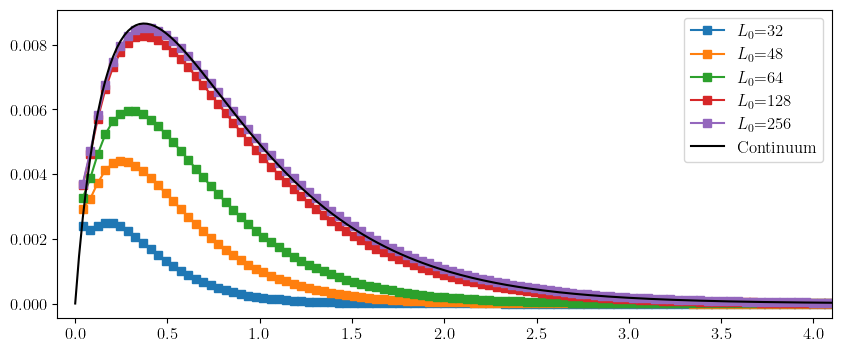

In [10]:
# anti-periodic boundary conditions, kappa = 0.245, L = 256

fig, ax = plt.subplots(figsize=(10, 4))

L0 = 32
xm_lattice = [0.04081632653061229, 0.08163265306122458, 0.12244897959183687, 0.16326530612244916, 0.20408163265306145, 0.24489795918367374, 0.28571428571428603, 0.3265306122448983, 0.3673469387755106, 0.4081632653061229, 0.4489795918367352, 0.4897959183673475, 0.5306122448979598, 0.5714285714285721, 0.6122448979591844, 0.6530612244897966, 0.6938775510204089, 0.7346938775510212, 0.7755102040816335, 0.8163265306122458, 0.8571428571428581, 0.8979591836734704, 0.9387755102040827, 0.979591836734695, 1.0204081632653073, 1.0612244897959195, 1.1020408163265318, 1.1428571428571441, 1.1836734693877564, 1.2244897959183687, 1.265306122448981, 1.3061224489795933, 1.3469387755102056, 1.3877551020408179, 1.4285714285714302, 1.4693877551020424, 1.5102040816326547, 1.551020408163267, 1.5918367346938793, 1.6326530612244916, 1.673469387755104, 1.7142857142857162, 1.7551020408163285, 1.7959183673469408, 1.836734693877553, 1.8775510204081653, 1.9183673469387776, 1.95918367346939, 2.000000000000002, 2.0408163265306145, 2.081632653061227, 2.122448979591839, 2.1632653061224514, 2.2040816326530637, 2.244897959183676, 2.2857142857142883, 2.3265306122449005, 2.367346938775513, 2.408163265306125, 2.4489795918367374, 2.4897959183673497, 2.530612244897962, 2.5714285714285743, 2.6122448979591866, 2.653061224489799, 2.693877551020411, 2.7346938775510234, 2.7755102040816357, 2.816326530612248, 2.8571428571428603, 2.8979591836734726, 2.938775510204085, 2.979591836734697, 3.0204081632653095, 3.0612244897959218, 3.102040816326534, 3.1428571428571463, 3.1836734693877586, 3.224489795918371, 3.265306122448983, 3.3061224489795955, 3.346938775510208, 3.38775510204082, 3.4285714285714324, 3.4693877551020447, 3.510204081632657, 3.5510204081632692, 3.5918367346938815, 3.632653061224494, 3.673469387755106, 3.7142857142857184, 3.7551020408163307, 3.795918367346943, 3.8367346938775553, 3.8775510204081676, 3.91836734693878, 3.959183673469392, 4.000000000000004, 4.040816326530617, 4.081632653061229, 4.122448979591841, 4.163265306122454, 4.204081632653066, 4.244897959183678, 4.28571428571429, 4.326530612244903, 4.3673469387755155, 4.408163265306127, 4.448979591836739, 4.489795918367352, 4.530612244897965, 4.5714285714285765, 4.612244897959188, 4.653061224489801, 4.693877551020414, 4.734693877551026, 4.7755102040816375, 4.81632653061225, 4.857142857142863, 4.897959183673475, 4.938775510204087, 4.979591836734699, 5.020408163265312, 5.061224489795924, 5.102040816326536, 5.142857142857149, 5.183673469387761]
xG00_lattice = [0.002400220408163268, 0.002272718367346942, 0.0023942204081632695, 0.002483438367346942, 0.0024740816326530644, 0.0023833469387755137, 0.002238689714285717, 0.0020642285714285737, 0.001875739591836737, 0.0016850448979591846, 0.0014978767346938788, 0.0013219983673469404, 0.0011589844897959198, 0.0010099320000000011, 0.0008756179591836745, 0.0007562448979591846, 0.0006501355102040825, 0.0005570595918367354, 0.0004760702040816332, 0.0004057469387755106, 0.00034479257142857174, 0.0002923324081632657, 0.0002474105306122451, 0.00020895673469387783, 0.00017619591836734707, 0.0001483209795918368, 0.00012473118367346952, 0.00010466285714285724, 8.779637551020419e-05, 7.350048979591843e-05, 6.147262040816334e-05, 5.136613877551025e-05, 4.2873600000000057e-05, 3.576161632653064e-05, 2.9793714285714324e-05, 2.4806497959183707e-05, 2.063935510204083e-05, 1.7155216326530627e-05, 1.4259036734693893e-05, 1.183343673469389e-05, 9.819918367346947e-06, 8.14193142857144e-06, 6.748683265306131e-06, 5.5905861224489865e-06, 4.627616326530617e-06, 3.82915265306123e-06, 3.167723265306125e-06, 2.6177044897959213e-06, 2.1635200000000032e-06, 1.7880081632653082e-06, 1.4761356734693895e-06, 1.2180989387755112e-06, 1.004944897959185e-06, 8.28756734693878e-07, 6.831314285714292e-07, 5.63149714285715e-07, 4.639241632653068e-07, 3.8211346938775544e-07, 3.146409795918371e-07, 2.590285714285717e-07, 2.1319325714285732e-07, 1.7533144489795934e-07, 1.4429005714285732e-07, 1.1862778775510216e-07, 9.753767346938786e-08, 8.015955918367358e-08, 6.587385306122455e-08, 5.4121893877551063e-08, 4.4458530612244954e-08, 3.649771428571433e-08, 2.996837551020412e-08, 2.460824816326532e-08, 2.0193111020408187e-08, 1.6569717551020427e-08, 1.3587551020408178e-08, 1.1148610612244906e-08, 9.141817142857154e-09, 7.496341224489801e-09, 6.145039183673479e-09, 5.039608163265313e-09, 4.127429387755106e-09, 3.3812783673469424e-09, 2.7700521632653104e-09, 2.270112000000003e-09, 1.8580930612244913e-09, 1.5214768979591848e-09, 1.245470693877553e-09, 1.0193848163265319e-09, 8.34028081632654e-10, 6.820824489795926e-10, 5.578337142857147e-10, 4.560120816326537e-10, 3.726756734693881e-10, 3.044725224489799e-10, 2.4836567346938795e-10, 2.0263915102040837e-10, 1.6519931428571448e-10, 1.345584000000002e-10, 1.0949804081632662e-10, 8.89477551020409e-11, 7.214780408163273e-11, 5.840977959183681e-11, 4.717063673469393e-11, 3.796297142857147e-11, 3.04371428571429e-11, 2.4257386122449002e-11, 1.9226895510204096e-11, 1.5102984489795934e-11, 1.172555265306124e-11, 8.958579591836738e-12, 6.6928922448979684e-12, 4.841051428571434e-12, 3.3168497959183704e-12, 2.072659591836738e-12, 1.0469318367346955e-12, 2.0936816326530544e-13, -4.806168979591834e-13, -1.0463469387755104e-12, -1.5103868571428593e-12, -1.891395918367349e-12, -2.2034248163265337e-12, -2.4576277551020438e-12, -2.663618718367351e-12, -2.8283640816326567e-12, -2.9569051020408195e-12, -3.0536228571428594e-12, -3.1207570040816367e-12]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L_0$={L0}', marker='s')
L0 = 48
xm_lattice = [0.04081632653061229, 0.08163265306122458, 0.12244897959183687, 0.16326530612244916, 0.20408163265306145, 0.24489795918367374, 0.28571428571428603, 0.3265306122448983, 0.3673469387755106, 0.4081632653061229, 0.4489795918367352, 0.4897959183673475, 0.5306122448979598, 0.5714285714285721, 0.6122448979591844, 0.6530612244897966, 0.6938775510204089, 0.7346938775510212, 0.7755102040816335, 0.8163265306122458, 0.8571428571428581, 0.8979591836734704, 0.9387755102040827, 0.979591836734695, 1.0204081632653073, 1.0612244897959195, 1.1020408163265318, 1.1428571428571441, 1.1836734693877564, 1.2244897959183687, 1.265306122448981, 1.3061224489795933, 1.3469387755102056, 1.3877551020408179, 1.4285714285714302, 1.4693877551020424, 1.5102040816326547, 1.551020408163267, 1.5918367346938793, 1.6326530612244916, 1.673469387755104, 1.7142857142857162, 1.7551020408163285, 1.7959183673469408, 1.836734693877553, 1.8775510204081653, 1.9183673469387776, 1.95918367346939, 2.000000000000002, 2.0408163265306145, 2.081632653061227, 2.122448979591839, 2.1632653061224514, 2.2040816326530637, 2.244897959183676, 2.2857142857142883, 2.3265306122449005, 2.367346938775513, 2.408163265306125, 2.4489795918367374, 2.4897959183673497, 2.530612244897962, 2.5714285714285743, 2.6122448979591866, 2.653061224489799, 2.693877551020411, 2.7346938775510234, 2.7755102040816357, 2.816326530612248, 2.8571428571428603, 2.8979591836734726, 2.938775510204085, 2.979591836734697, 3.0204081632653095, 3.0612244897959218, 3.102040816326534, 3.1428571428571463, 3.1836734693877586, 3.224489795918371, 3.265306122448983, 3.3061224489795955, 3.346938775510208, 3.38775510204082, 3.4285714285714324, 3.4693877551020447, 3.510204081632657, 3.5510204081632692, 3.5918367346938815, 3.632653061224494, 3.673469387755106, 3.7142857142857184, 3.7551020408163307, 3.795918367346943, 3.8367346938775553, 3.8775510204081676, 3.91836734693878, 3.959183673469392, 4.000000000000004, 4.040816326530617, 4.081632653061229, 4.122448979591841, 4.163265306122454, 4.204081632653066, 4.244897959183678, 4.28571428571429, 4.326530612244903, 4.3673469387755155, 4.408163265306127, 4.448979591836739, 4.489795918367352, 4.530612244897965, 4.5714285714285765, 4.612244897959188, 4.653061224489801, 4.693877551020414, 4.734693877551026, 4.7755102040816375, 4.81632653061225, 4.857142857142863, 4.897959183673475, 4.938775510204087, 4.979591836734699, 5.020408163265312, 5.061224489795924, 5.102040816326536, 5.142857142857149, 5.183673469387761]
xG00_lattice = [0.002924759183673472, 0.003239665306122452, 0.0037306040816326574, 0.004114595918367352, 0.004332673469387758, 0.004406865306122452, 0.004373040000000005, 0.004259369795918372, 0.004090649142857148, 0.003885216326530616, 0.0036559510204081684, 0.0034134269387755146, 0.0031671533877551065, 0.002922571428571433, 0.0026835465306122475, 0.002453696000000003, 0.0022352266122449005, 0.0020298269387755124, 0.0018373294693877565, 0.0016589730612244916, 0.0014940099428571447, 0.0013425836734693893, 0.0012040678367346948, 0.0010778899591836746, 0.0009630979591836745, 0.0008592671020408172, 0.0007654665306122457, 0.0006810217142857152, 0.0006051862040816333, 0.0005370832653061229, 0.0004761486122448985, 0.0004217466775510208, 0.000373115510204082, 0.0003298319183673473, 0.0002912768571428574, 0.0002570502857142861, 0.00022666341959183696, 0.00019969912000000018, 0.00017585991428571446, 0.0001547382400000002, 0.000136077795102041, 0.00011959388571428585, 0.00010505696816326542, 9.223136326530621e-05, 8.092943265306131e-05, 7.09735689795919e-05, 6.221783265306129e-05, 5.450825142857149e-05, 4.774656000000004e-05, 4.179502040816331e-05, 3.6578407346938815e-05, 3.199774367346943e-05, 2.7977596734693915e-05, 2.4455343673469415e-05, 2.1371913469387783e-05, 1.866842971428574e-05, 1.630404734693879e-05, 1.4232219918367361e-05, 1.2420824489795935e-05, 1.0837092244897967e-05, 9.453531020408178e-06, 8.242593795918377e-06, 7.186114285714294e-06, 6.262381714285724e-06, 5.45759102040817e-06, 4.752598040816333e-06, 4.139309224489801e-06, 3.604355265306127e-06, 3.137900326530616e-06, 2.7306091428571453e-06, 2.3758066367346957e-06, 2.066668016326533e-06, 1.797737330612247e-06, 1.5629851102040836e-06, 1.3587906122448995e-06, 1.1811678040816338e-06, 1.0263779428571443e-06, 8.916762612244907e-07, 7.744257142857154e-07, 6.725413877551028e-07, 5.83888995918368e-07, 5.067519673469394e-07, 4.398356326530618e-07, 3.815190857142862e-07, 3.3086114693877605e-07, 2.8684973551020447e-07, 2.486076489795921e-07, 2.1539447510204106e-07, 1.8653644408163287e-07, 1.614768244897961e-07, 1.397069885714287e-07, 1.2081635265306136e-07, 1.0438479428571442e-07, 9.014830204081643e-08, 7.775867102040824e-08, 6.703238008163271e-08, 5.770732710204087e-08, 4.962779200000004e-08, 4.2614748000000053e-08, 3.651506122448984e-08, 3.123125297959188e-08, 2.6645530775510235e-08, 2.266459085714289e-08, 1.9211864816326547e-08, 1.6216200000000022e-08, 1.361611102040818e-08, 1.1360342857142873e-08, 9.401995102040827e-09, 7.702874285714296e-09, 6.228343673469394e-09, 4.950156000000006e-09, 3.839552000000004e-09, 2.8774421469387776e-09, 2.0418191020408196e-09, 1.3182942857142874e-09, 6.920512653061234e-10, 1.503636244897961e-10, -3.168468571428578e-10, -7.191097142857157e-10, -1.0636486530612256e-09, -1.356928571428573e-09, -1.6041008163265319e-09, -1.810137281632655e-09, -1.977875918367349e-09, -2.1102121428571454e-09, -2.208925028571432e-09, -2.2753320000000017e-09]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L_0$={L0}', marker='s')
L0 = 64
xm_lattice = [0.04081632653061229, 0.08163265306122458, 0.12244897959183687, 0.16326530612244916, 0.20408163265306145, 0.24489795918367374, 0.28571428571428603, 0.3265306122448983, 0.3673469387755106, 0.4081632653061229, 0.4489795918367352, 0.4897959183673475, 0.5306122448979598, 0.5714285714285721, 0.6122448979591844, 0.6530612244897966, 0.6938775510204089, 0.7346938775510212, 0.7755102040816335, 0.8163265306122458, 0.8571428571428581, 0.8979591836734704, 0.9387755102040827, 0.979591836734695, 1.0204081632653073, 1.0612244897959195, 1.1020408163265318, 1.1428571428571441, 1.1836734693877564, 1.2244897959183687, 1.265306122448981, 1.3061224489795933, 1.3469387755102056, 1.3877551020408179, 1.4285714285714302, 1.4693877551020424, 1.5102040816326547, 1.551020408163267, 1.5918367346938793, 1.6326530612244916, 1.673469387755104, 1.7142857142857162, 1.7551020408163285, 1.7959183673469408, 1.836734693877553, 1.8775510204081653, 1.9183673469387776, 1.95918367346939, 2.000000000000002, 2.0408163265306145, 2.081632653061227, 2.122448979591839, 2.1632653061224514, 2.2040816326530637, 2.244897959183676, 2.2857142857142883, 2.3265306122449005, 2.367346938775513, 2.408163265306125, 2.4489795918367374, 2.4897959183673497, 2.530612244897962, 2.5714285714285743, 2.6122448979591866, 2.653061224489799, 2.693877551020411, 2.7346938775510234, 2.7755102040816357, 2.816326530612248, 2.8571428571428603, 2.8979591836734726, 2.938775510204085, 2.979591836734697, 3.0204081632653095, 3.0612244897959218, 3.102040816326534, 3.1428571428571463, 3.1836734693877586, 3.224489795918371, 3.265306122448983, 3.3061224489795955, 3.346938775510208, 3.38775510204082, 3.4285714285714324, 3.4693877551020447, 3.510204081632657, 3.5510204081632692, 3.5918367346938815, 3.632653061224494, 3.673469387755106, 3.7142857142857184, 3.7551020408163307, 3.795918367346943, 3.8367346938775553, 3.8775510204081676, 3.91836734693878, 3.959183673469392, 4.000000000000004, 4.040816326530617, 4.081632653061229, 4.122448979591841, 4.163265306122454, 4.204081632653066, 4.244897959183678, 4.28571428571429, 4.326530612244903, 4.3673469387755155, 4.408163265306127, 4.448979591836739, 4.489795918367352, 4.530612244897965, 4.5714285714285765, 4.612244897959188, 4.653061224489801, 4.693877551020414, 4.734693877551026, 4.7755102040816375, 4.81632653061225, 4.857142857142863, 4.897959183673475, 4.938775510204087, 4.979591836734699, 5.020408163265312, 5.061224489795924, 5.102040816326536, 5.142857142857149, 5.183673469387761]
xG00_lattice = [0.0032597183673469467, 0.0038710775510204117, 0.004620587755102044, 0.005228636734693884, 0.0056348734693877555, 0.005865619591836742, 0.005957622857142862, 0.0059415902040816405, 0.005844063673469395, 0.005685477551020415, 0.005481861224489802, 0.005246258938775517, 0.004990707428571436, 0.004722017142857149, 0.004446824081632658, 0.004171116408163268, 0.003898440701510207, 0.003631741714285719, 0.003374137877551024, 0.0031261237551020444, 0.0028899205714285744, 0.002665821714285718, 0.0024542295510204116, 0.002255626971428574, 0.0020693081632653086, 0.001895701387755104, 0.0017342000816326555, 0.0015841668571428583, 0.0014453938530612262, 0.0013173477306122462, 0.0011992133632653073, 0.0010906561306122462, 0.000990992424489797, 0.0008995783836734701, 0.000815878571428572, 0.0007394752653061234, 0.0006695224000000008, 0.000605889371428572, 0.0005479102040816333, 0.000495116734693878, 0.0004471289306122454, 0.0004036227428571433, 0.00036406678367346983, 0.0003282164375510208, 0.0002958006489795921, 0.00026642328816326555, 0.00023985665387755132, 0.0002158396604081635, 0.00019413376000000017, 0.0001745520816326533, 0.00015687336257142885, 0.0001409423578775512, 0.0001265704292244899, 0.00011362165126530627, 0.0001019635212244899, 9.14654582857144e-05, 8.203645665306134e-05, 7.35459980408164e-05, 6.592568971428577e-05, 5.906746775510211e-05, 5.290380612244903e-05, 4.737682677551026e-05, 4.241374971428577e-05, 3.7961748897959215e-05, 3.396654857142862e-05, 3.038663706122452e-05, 2.717416081632657e-05, 2.429802089795921e-05, 2.172011853061227e-05, 1.941081714285716e-05, 1.7343833632653084e-05, 1.5493065795918385e-05, 1.383516261224491e-05, 1.2354073469387767e-05, 1.102801224489797e-05, 9.840442775510217e-06, 8.7806462857143e-06, 7.831620244897968e-06, 6.98396759183674e-06, 6.2268597551020466e-06, 5.550026106122456e-06, 4.9454628408163325e-06, 4.405305967346944e-06, 3.923143542857147e-06, 3.4924848571428598e-06, 3.1079452244898007e-06, 2.764700914285717e-06, 2.4584606693877575e-06, 2.1851200081632675e-06, 1.9412933877551047e-06, 1.7238041600000017e-06, 1.5295363493877566e-06, 1.356362941224491e-06, 1.2020677872653077e-06, 1.0643211387755113e-06, 9.415861812244908e-07, 8.321249918367356e-07, 7.34574560000001e-07, 6.475615861224496e-07, 5.700000000000006e-07, 5.008816734693882e-07, 4.3930525714285754e-07, 3.8439852244897994e-07, 3.3551333877551065e-07, 2.919385714285718e-07, 2.5310697306122476e-07, 2.185421281632656e-07, 1.87746847346939e-07, 1.6032725469387774e-07, 1.3592920000000014e-07, 1.142156473469389e-07, 9.49167542857144e-08, 7.778403428571436e-08, 6.259328669387763e-08, 4.911175918367353e-08, 3.7198785306122494e-08, 2.6689466938775524e-08, 1.745205551020411e-08, 9.374480000000004e-09, 2.354409795918372e-09, -3.695982040816314e-09, -8.84574693877552e-09, -1.3150676233469393e-08, -1.6661044897959185e-08, -1.940908163265308e-08, -2.1413962285714315e-08, -2.2693008995918386e-08]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L_0$={L0}', marker='s')
L0 = 128
xm_lattice = [0.04081632653061229, 0.08163265306122458, 0.12244897959183687, 0.16326530612244916, 0.20408163265306145, 0.24489795918367374, 0.28571428571428603, 0.3265306122448983, 0.3673469387755106, 0.4081632653061229, 0.4489795918367352, 0.4897959183673475, 0.5306122448979598, 0.5714285714285721, 0.6122448979591844, 0.6530612244897966, 0.6938775510204089, 0.7346938775510212, 0.7755102040816335, 0.8163265306122458, 0.8571428571428581, 0.8979591836734704, 0.9387755102040827, 0.979591836734695, 1.0204081632653073, 1.0612244897959195, 1.1020408163265318, 1.1428571428571441, 1.1836734693877564, 1.2244897959183687, 1.265306122448981, 1.3061224489795933, 1.3469387755102056, 1.3877551020408179, 1.4285714285714302, 1.4693877551020424, 1.5102040816326547, 1.551020408163267, 1.5918367346938793, 1.6326530612244916, 1.673469387755104, 1.7142857142857162, 1.7551020408163285, 1.7959183673469408, 1.836734693877553, 1.8775510204081653, 1.9183673469387776, 1.95918367346939, 2.000000000000002, 2.0408163265306145, 2.081632653061227, 2.122448979591839, 2.1632653061224514, 2.2040816326530637, 2.244897959183676, 2.2857142857142883, 2.3265306122449005, 2.367346938775513, 2.408163265306125, 2.4489795918367374, 2.4897959183673497, 2.530612244897962, 2.5714285714285743, 2.6122448979591866, 2.653061224489799, 2.693877551020411, 2.7346938775510234, 2.7755102040816357, 2.816326530612248, 2.8571428571428603, 2.8979591836734726, 2.938775510204085, 2.979591836734697, 3.0204081632653095, 3.0612244897959218, 3.102040816326534, 3.1428571428571463, 3.1836734693877586, 3.224489795918371, 3.265306122448983, 3.3061224489795955, 3.346938775510208, 3.38775510204082, 3.4285714285714324, 3.4693877551020447, 3.510204081632657, 3.5510204081632692, 3.5918367346938815, 3.632653061224494, 3.673469387755106, 3.7142857142857184, 3.7551020408163307, 3.795918367346943, 3.8367346938775553, 3.8775510204081676, 3.91836734693878, 3.959183673469392, 4.000000000000004, 4.040816326530617, 4.081632653061229, 4.122448979591841, 4.163265306122454, 4.204081632653066, 4.244897959183678, 4.28571428571429, 4.326530612244903, 4.3673469387755155, 4.408163265306127, 4.448979591836739, 4.489795918367352, 4.530612244897965, 4.5714285714285765, 4.612244897959188, 4.653061224489801, 4.693877551020414, 4.734693877551026, 4.7755102040816375, 4.81632653061225, 4.857142857142863, 4.897959183673475, 4.938775510204087, 4.979591836734699, 5.020408163265312, 5.061224489795924, 5.102040816326536, 5.142857142857149, 5.183673469387761]
xG00_lattice = [0.003656247142857155, 0.004631213306122452, 0.00571110697959184, 0.006617727673469396, 0.007293136122448987, 0.007759931265306131, 0.008059161142857148, 0.008222199510204092, 0.008276334244897966, 0.00824323714285715, 0.008141709444897966, 0.007984717714285723, 0.007785606293877561, 0.0075561204571428595, 0.007301852081632661, 0.007030807902040825, 0.006747669128979599, 0.006458131836734701, 0.0061656312163265335, 0.0058731793469387825, 0.00558350720571429, 0.005298468236734699, 0.0050191873167347014, 0.004747269551020413, 0.004484054693877557, 0.004230200636734701, 0.003985517564081637, 0.0037508132571428634, 0.0035265456391836785, 0.003312186367346943, 0.0031081880995918404, 0.0029141331591836764, 0.002730199640816331, 0.0025557469714285737, 0.0023908090285714315, 0.002234900218775512, 0.002087859559183676, 0.0019492652163265334, 0.0018188037771428606, 0.001696180244897961, 0.0015809530048979618, 0.0014727313371428591, 0.001371326514285716, 0.001276326476408165, 0.0011872556081632668, 0.0011040048065306131, 0.0010261655795918384, 0.0009533622465306133, 0.0008854585760000007, 0.0008220612244897969, 0.0007629108734693886, 0.0007077653779591841, 0.0006564080718367352, 0.0006085485697959193, 0.0005640250897959189, 0.0005225943908571437, 0.00048405135695510257, 0.00044823145714285785, 0.0004149567867755106, 0.0003840229714285721, 0.00035529880734693934, 0.00032864848653061263, 0.00030391714285714306, 0.0002809780244897963, 0.00025971001510204127, 0.00024000158106122477, 0.00022172197330612266, 0.00020478159477551046, 0.0001891095138367349, 0.00017459115885714305, 0.00016113976269387773, 0.00014870386873469402, 0.00013719507967346957, 0.00012655084326530617, 0.00011670589591836752, 0.00010760310791836747, 9.91913120000001e-05, 9.141323657142871e-05, 8.422783306122461e-05, 7.75929077551021e-05, 7.146414440816333e-05, 6.580299183673478e-05, 6.0577722775510286e-05, 5.575461942857152e-05, 5.130212816326535e-05, 4.719451134693884e-05, 4.3405777224489834e-05, 3.9908272979591905e-05, 3.6685959836734736e-05, 3.3713177142857194e-05, 3.097203200000003e-05, 2.8445901322449015e-05, 2.6115212326530645e-05, 2.3970870938775532e-05, 2.1993394163265325e-05, 2.0172732342857163e-05, 1.849566622857144e-05, 1.6951542400000017e-05, 1.5530299471836756e-05, 1.4222185959183685e-05, 1.3018838987755119e-05, 1.1911952179591857e-05, 1.089418135510205e-05, 9.959068865306128e-06, 9.099718285714306e-06, 8.310902742857149e-06, 7.587665669387765e-06, 6.924330426122459e-06, 6.317392636734699e-06, 5.7609792653061305e-06, 5.253795820408168e-06, 4.790692022857147e-06, 4.369272759183678e-06, 3.9863305959183705e-06, 3.6404259183673507e-06, 3.32801689469388e-06, 3.0480763591836774e-06, 2.7978724734693904e-06, 2.5770140685714316e-06, 2.3830801959183696e-06, 2.215593959183676e-06, 2.073307537959185e-06, 1.9557045786122452e-06, 1.862209325714287e-06, 1.7924117346938796e-06, 1.7462602285714305e-06, 1.723714290612248e-06]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L_0$={L0}', marker='s')
L0 = 256
xm_lattice = [0.04081632653061229, 0.08163265306122458, 0.12244897959183687, 0.16326530612244916, 0.20408163265306145, 0.24489795918367374, 0.28571428571428603, 0.3265306122448983, 0.3673469387755106, 0.4081632653061229, 0.4489795918367352, 0.4897959183673475, 0.5306122448979598, 0.5714285714285721, 0.6122448979591844, 0.6530612244897966, 0.6938775510204089, 0.7346938775510212, 0.7755102040816335, 0.8163265306122458, 0.8571428571428581, 0.8979591836734704, 0.9387755102040827, 0.979591836734695, 1.0204081632653073, 1.0612244897959195, 1.1020408163265318, 1.1428571428571441, 1.1836734693877564, 1.2244897959183687, 1.265306122448981, 1.3061224489795933, 1.3469387755102056, 1.3877551020408179, 1.4285714285714302, 1.4693877551020424, 1.5102040816326547, 1.551020408163267, 1.5918367346938793, 1.6326530612244916, 1.673469387755104, 1.7142857142857162, 1.7551020408163285, 1.7959183673469408, 1.836734693877553, 1.8775510204081653, 1.9183673469387776, 1.95918367346939, 2.000000000000002, 2.0408163265306145, 2.081632653061227, 2.122448979591839, 2.1632653061224514, 2.2040816326530637, 2.244897959183676, 2.2857142857142883, 2.3265306122449005, 2.367346938775513, 2.408163265306125, 2.4489795918367374, 2.4897959183673497, 2.530612244897962, 2.5714285714285743, 2.6122448979591866, 2.653061224489799, 2.693877551020411, 2.7346938775510234, 2.7755102040816357, 2.816326530612248, 2.8571428571428603, 2.8979591836734726, 2.938775510204085, 2.979591836734697, 3.0204081632653095, 3.0612244897959218, 3.102040816326534, 3.1428571428571463, 3.1836734693877586, 3.224489795918371, 3.265306122448983, 3.3061224489795955, 3.346938775510208, 3.38775510204082, 3.4285714285714324, 3.4693877551020447, 3.510204081632657, 3.5510204081632692, 3.5918367346938815, 3.632653061224494, 3.673469387755106, 3.7142857142857184, 3.7551020408163307, 3.795918367346943, 3.8367346938775553, 3.8775510204081676, 3.91836734693878, 3.959183673469392, 4.000000000000004, 4.040816326530617, 4.081632653061229, 4.122448979591841, 4.163265306122454, 4.204081632653066, 4.244897959183678, 4.28571428571429, 4.326530612244903, 4.3673469387755155, 4.408163265306127, 4.448979591836739, 4.489795918367352, 4.530612244897965, 4.5714285714285765, 4.612244897959188, 4.653061224489801, 4.693877551020414, 4.734693877551026, 4.7755102040816375, 4.81632653061225, 4.857142857142863, 4.897959183673475, 4.938775510204087, 4.979591836734699, 5.020408163265312, 5.061224489795924, 5.102040816326536, 5.142857142857149, 5.183673469387761]
xG00_lattice = [0.0036905395889795904, 0.004701583788571427, 0.0058125241297959295, 0.006750180266122458, 0.0074529373326530715, 0.007946485285714296, 0.008268892902857164, 0.008454187888979597, 0.008528856446938788, 0.008513748861224496, 0.008428421050612258, 0.008286911554285726, 0.008102197766530612, 0.007882640982857155, 0.0076383255489795975, 0.007375822151836741, 0.007099964743265319, 0.00681574908489797, 0.006528158141632661, 0.0062385525061224596, 0.005950547883428577, 0.005666311293387762, 0.0053869941355102115, 0.0051141465208163345, 0.0048490936326530685, 0.004592092906938785, 0.00434414320604082, 0.00410526916571429, 0.00387581670968082, 0.003656236660408169, 0.0034462167252979617, 0.003245823665632657, 0.0030550202808489802, 0.0028735807999346994, 0.002701060670857146, 0.00253764054279184, 0.002382687170538779, 0.0022360944274449, 0.002097387790775512, 0.0019665335601632677, 0.0018429044381224502, 0.0017263987265142887, 0.0016166552256693903, 0.0015133135517387771, 0.0014159978004489812, 0.0013244488187265314, 0.0012385433922612265, 0.0011577017254138797, 0.0010819680432000002, 0.0010108950263265312, 0.0009441645591428589, 0.0008816014980897972, 0.0008230152730285727, 0.0007681197384000005, 0.0007166834250534697, 0.0006685861942857148, 0.0006235622532244912, 0.0005814436001947759, 0.0005420728377632658, 0.0005052630920816328, 0.0004708578455812251, 0.000438705253792654, 0.000408695224628572, 0.00038067351536326567, 0.0003544885623102044, 0.00033005715837061233, 0.0003072747338285719, 0.00028600205596734734, 0.00026616693245387776, 0.0002476759512571432, 0.00023042422041224508, 0.00021434629577142864, 0.00019936609120734718, 0.0001854063437861227, 0.00017240309614285733, 0.00016029040745142885, 0.00014900495977714301, 0.0001384983337665308, 0.0001287150385714288, 0.0001196062624653062, 0.00011113321156163276, 0.00010323980159020421, 9.590340291428578e-05, 8.907462248845734e-05, 8.271971361102046e-05, 7.681275563428581e-05, 7.131630730775518e-05, 6.62108971363266e-05, 6.145753529959193e-05, 5.7044119812244955e-05, 5.293974258857148e-05, 4.9127231555918434e-05, 4.5585156570612295e-05, 4.229225225142862e-05, 3.923603391020413e-05, 3.6398847791020444e-05, 3.376456672326533e-05, 3.131999008000003e-05, 2.9051951899591855e-05, 2.6947931591836775e-05, 2.499686266938779e-05, 2.318944250204085e-05, 2.1515007781469404e-05, 1.9963899679869414e-05, 1.8529361254285744e-05, 1.7202960298285717e-05, 1.5977895713469405e-05, 1.4846875405714298e-05, 1.3804876960816343e-05, 1.2846345600000024e-05, 1.1964889383183676e-05, 1.11570603977143e-05, 1.0418328089714294e-05, 9.744853077551035e-06, 9.132895575510215e-06, 8.57985275853063e-06, 8.081734761551032e-06, 7.637885187428587e-06, 7.24491263428573e-06, 6.901685867755113e-06, 6.605804264489804e-06, 6.356846052244904e-06, 6.153460537224496e-06, 5.995223393632658e-06, 5.881914744897966e-06, 5.813525110628574e-06, 5.790392691583681e-06]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L_0$={L0}', marker='s')

scale = 1/(4*np.pi)
ax.plot(xm_values, scale*np.array(integral_values), label='Continuum', color='black')

ax.set_xlim(-0.1, 4.1)
ax.legend()

## Periodic B.C. with $\kappa = 0.245$

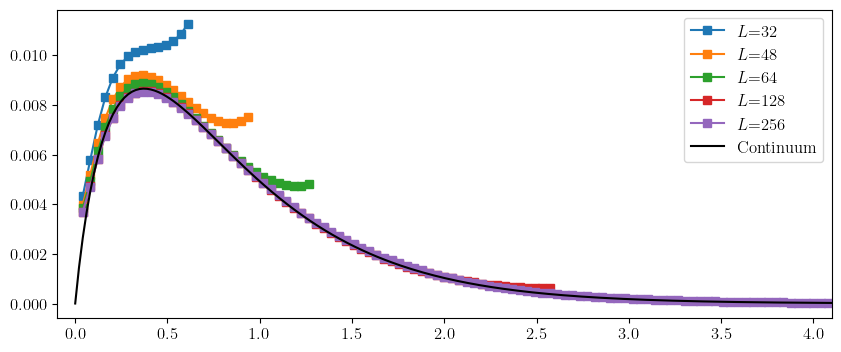

In [11]:
# periodic boundary conditions, kappa = 0.245, L0 = 256

fig, ax = plt.subplots(figsize=(10, 4))

L = 32
xm_lattice = [0.04081632653061229, 0.08163265306122458, 0.12244897959183687, 0.16326530612244916, 0.20408163265306145, 0.24489795918367374, 0.28571428571428603, 0.3265306122448983, 0.3673469387755106, 0.4081632653061229, 0.4489795918367352, 0.4897959183673475, 0.5306122448979598, 0.5714285714285721, 0.6122448979591844]
xG00_lattice = [0.004329747636734741, 0.005784801714285686, 0.007191925185306155, 0.00830811961142861, 0.009100166110204056, 0.00962780607967344, 0.009951904399199967, 0.010133888979591768, 0.010225152661224507, 0.010270723183673485, 0.010315563567346964, 0.01039917717551023, 0.010560827297959197, 0.010838990057142887, 0.011273978448979614]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L$={L}', marker='s')
L = 48
xm_lattice = [0.04081632653061229, 0.08163265306122458, 0.12244897959183687, 0.16326530612244916, 0.20408163265306145, 0.24489795918367374, 0.28571428571428603, 0.3265306122448983, 0.3673469387755106, 0.4081632653061229, 0.4489795918367352, 0.4897959183673475, 0.5306122448979598, 0.5714285714285721, 0.6122448979591844, 0.6530612244897966, 0.6938775510204089, 0.7346938775510212, 0.7755102040816335, 0.8163265306122458, 0.8571428571428581, 0.8979591836734704, 0.9387755102040827]
xG00_lattice = [0.003972594405632639, 0.005189535564734733, 0.006443122942040816, 0.007469474760163273, 0.008215755620816325, 0.008719457454367353, 0.00902551494685715, 0.009173917317224495, 0.009201282107510207, 0.009131047369795926, 0.008991794679102046, 0.008801553991836731, 0.00857961573061224, 0.008340465942857152, 0.008099798448979602, 0.007869267461224497, 0.0076614353795918435, 0.007488215118367358, 0.007359758106122455, 0.007287227591836743, 0.007282387714285723, 0.007355398285714293, 0.0075199113959183725]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L$={L}', marker='s')
L = 64
xm_lattice = [0.04081632653061229, 0.08163265306122458, 0.12244897959183687, 0.16326530612244916, 0.20408163265306145, 0.24489795918367374, 0.28571428571428603, 0.3265306122448983, 0.3673469387755106, 0.4081632653061229, 0.4489795918367352, 0.4897959183673475, 0.5306122448979598, 0.5714285714285721, 0.6122448979591844, 0.6530612244897966, 0.6938775510204089, 0.7346938775510212, 0.7755102040816335, 0.8163265306122458, 0.8571428571428581, 0.8979591836734704, 0.9387755102040827, 0.979591836734695, 1.0204081632653073, 1.0612244897959195, 1.1020408163265318, 1.1428571428571441, 1.1836734693877564, 1.2244897959183687, 1.265306122448981]
xG00_lattice = [0.0038279640916897943, 0.004939965285714306, 0.006125286729061229, 0.0071101611366530745, 0.007840267077959193, 0.00834346020489797, 0.008662282021142866, 0.008831443170612258, 0.008880987190775529, 0.008834136739591847, 0.008711501035510216, 0.008531921590922456, 0.008306556013387766, 0.008048217014057139, 0.0077668793387755, 0.007470636081632648, 0.007167271046122457, 0.006863502320816327, 0.006563906726938778, 0.006273987975510205, 0.005997613928571436, 0.005739601766530617, 0.005502751858775518, 0.005291546684081638, 0.005108701448979601, 0.004958007451428582, 0.004843241221224496, 0.004767542102857149, 0.004735497272244904, 0.004750107073469397, 0.004817243975102047]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L$={L}', marker='s')
L = 128
xm_lattice = [0.04081632653061229, 0.08163265306122458, 0.12244897959183687, 0.16326530612244916, 0.20408163265306145, 0.24489795918367374, 0.28571428571428603, 0.3265306122448983, 0.3673469387755106, 0.4081632653061229, 0.4489795918367352, 0.4897959183673475, 0.5306122448979598, 0.5714285714285721, 0.6122448979591844, 0.6530612244897966, 0.6938775510204089, 0.7346938775510212, 0.7755102040816335, 0.8163265306122458, 0.8571428571428581, 0.8979591836734704, 0.9387755102040827, 0.979591836734695, 1.0204081632653073, 1.0612244897959195, 1.1020408163265318, 1.1428571428571441, 1.1836734693877564, 1.2244897959183687, 1.265306122448981, 1.3061224489795933, 1.3469387755102056, 1.3877551020408179, 1.4285714285714302, 1.4693877551020424, 1.5102040816326547, 1.551020408163267, 1.5918367346938793, 1.6326530612244916, 1.673469387755104, 1.7142857142857162, 1.7551020408163285, 1.7959183673469408, 1.836734693877553, 1.8775510204081653, 1.9183673469387776, 1.95918367346939, 2.000000000000002, 2.0408163265306145, 2.081632653061227, 2.122448979591839, 2.1632653061224514, 2.2040816326530637, 2.244897959183676, 2.2857142857142883, 2.3265306122449005, 2.367346938775513, 2.408163265306125, 2.4489795918367374, 2.4897959183673497, 2.530612244897962, 2.5714285714285743]
xG00_lattice = [0.003703158111918384, 0.00471755713110204, 0.005837194186800008, 0.006779087764571429, 0.007482927964612245, 0.00797925724187755, 0.008303083358057153, 0.008488120594612255, 0.00856333421706123, 0.008547426223346949, 0.008460251176367358, 0.008316843616163277, 0.008130953815134703, 0.007909361107771433, 0.00766268937808164, 0.007397281946906129, 0.007118185447763277, 0.006831391477518382, 0.006540139720000009, 0.006247604119020419, 0.005956575709714293, 0.005668956559200009, 0.005386947936489803, 0.00511080327183674, 0.004843076020408171, 0.004582879387755113, 0.004331946210612247, 0.004090128045714292, 0.003858546883673473, 0.0036363167142857158, 0.0034240568677551073, 0.003221576463673471, 0.0030288727946938803, 0.002845565566530617, 0.002671731914285718, 0.002506989071020411, 0.0023511034591836765, 0.0022039019600000017, 0.0020649238151020446, 0.001934060555102044, 0.001811035984897961, 0.0016952976685714295, 0.0015870686942857167, 0.0014855675281632676, 0.0013907307857142876, 0.0013024126448979599, 0.0012201492359183675, 0.0011440303542857144, 0.001073645580000001, 0.0010088422448979602, 0.0009494548640816337, 0.0008953315216326545, 0.0008463988808163276, 0.000802519699591837, 0.0007636234795918378, 0.0007296520000000004, 0.0007005765538775517, 0.0006764531004081644, 0.0006572365685714291, 0.0006430092489795924, 0.0006338713416326537, 0.0006299969053061236, 0.0006314943342857146]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L$={L}', marker='s')
L = 256
xm_lattice = [0.04081632653061229, 0.08163265306122458, 0.12244897959183687, 0.16326530612244916, 0.20408163265306145, 0.24489795918367374, 0.28571428571428603, 0.3265306122448983, 0.3673469387755106, 0.4081632653061229, 0.4489795918367352, 0.4897959183673475, 0.5306122448979598, 0.5714285714285721, 0.6122448979591844, 0.6530612244897966, 0.6938775510204089, 0.7346938775510212, 0.7755102040816335, 0.8163265306122458, 0.8571428571428581, 0.8979591836734704, 0.9387755102040827, 0.979591836734695, 1.0204081632653073, 1.0612244897959195, 1.1020408163265318, 1.1428571428571441, 1.1836734693877564, 1.2244897959183687, 1.265306122448981, 1.3061224489795933, 1.3469387755102056, 1.3877551020408179, 1.4285714285714302, 1.4693877551020424, 1.5102040816326547, 1.551020408163267, 1.5918367346938793, 1.6326530612244916, 1.673469387755104, 1.7142857142857162, 1.7551020408163285, 1.7959183673469408, 1.836734693877553, 1.8775510204081653, 1.9183673469387776, 1.95918367346939, 2.000000000000002, 2.0408163265306145, 2.081632653061227, 2.122448979591839, 2.1632653061224514, 2.2040816326530637, 2.244897959183676, 2.2857142857142883, 2.3265306122449005, 2.367346938775513, 2.408163265306125, 2.4489795918367374, 2.4897959183673497, 2.530612244897962, 2.5714285714285743, 2.6122448979591866, 2.653061224489799, 2.693877551020411, 2.7346938775510234, 2.7755102040816357, 2.816326530612248, 2.8571428571428603, 2.8979591836734726, 2.938775510204085, 2.979591836734697, 3.0204081632653095, 3.0612244897959218, 3.102040816326534, 3.1428571428571463, 3.1836734693877586, 3.224489795918371, 3.265306122448983, 3.3061224489795955, 3.346938775510208, 3.38775510204082, 3.4285714285714324, 3.4693877551020447, 3.510204081632657, 3.5510204081632692, 3.5918367346938815, 3.632653061224494, 3.673469387755106, 3.7142857142857184, 3.7551020408163307, 3.795918367346943, 3.8367346938775553, 3.8775510204081676, 3.91836734693878, 3.959183673469392, 4.000000000000004, 4.040816326530617, 4.081632653061229, 4.122448979591841, 4.163265306122454, 4.204081632653066, 4.244897959183678, 4.28571428571429, 4.326530612244903, 4.3673469387755155, 4.408163265306127, 4.448979591836739, 4.489795918367352, 4.530612244897965, 4.5714285714285765, 4.612244897959188, 4.653061224489801, 4.693877551020414, 4.734693877551026, 4.7755102040816375, 4.81632653061225, 4.857142857142863, 4.897959183673475, 4.938775510204087, 4.979591836734699, 5.020408163265312, 5.061224489795924, 5.102040816326536, 5.142857142857149, 5.183673469387761]
xG00_lattice = [0.0036909868475673616, 0.004702349023281637, 0.005813933322171429, 0.006751722579983681, 0.007454969600693889, 0.007949259230497963, 0.00827202123354286, 0.008456889141681639, 0.008532065867363265, 0.00851713532318368, 0.008432129675918382, 0.008291039276669396, 0.008106279663273475, 0.007887411209462864, 0.007643249797714297, 0.007380507227350209, 0.007105137936383681, 0.006821299576065313, 0.00653361737316735, 0.006243947308032651, 0.0059561148426857165, 0.005672172445926537, 0.005392655591893889, 0.005120184184946945, 0.0048551980210204135, 0.004598076901387762, 0.004350324392081634, 0.0041112530217142906, 0.0038819529848979637, 0.0036625295118367374, 0.003452565930448983, 0.0032522063059591873, 0.0030613357823265357, 0.0028797225549387784, 0.0027072875200000036, 0.0025438021214693914, 0.0023888373640000033, 0.0022419841501224494, 0.002103420961836737, 0.001972457185306122, 0.0018488431174285744, 0.0017322466611428594, 0.001622424401755103, 0.0015188940674285725, 0.001421572334693879, 0.0013300538627755115, 0.0012440100769795922, 0.0011631731128163272, 0.0010872604720000008, 0.0010160165081632658, 0.0009491839291836746, 0.0008865123067755111, 0.0008278195772244909, 0.0007728168849795927, 0.0007212916453061229, 0.0006730950880000017, 0.0006279442015102049, 0.0005857370356734698, 0.0005462534096734699, 0.0005093263934693884, 0.00047481473048979636, 0.000442567111918368, 0.0004124316702857151, 0.00038430893453061287, 0.0003580481887755104, 0.00033349508791836736, 0.00031061890510204136, 0.0002892421049795922, 0.00026931646285714304, 0.00025073582571428615, 0.00023339358791836737, 0.00021721550106122478, 0.00020215618261224495, 0.00018810490408163285, 0.00017500928265306144, 0.00016281076734693897, 0.00015144604200000017, 0.00014085673297959197, 0.00013099318575510217, 0.0001218082775510206, 0.00011325691763265307, 0.00010529994857142874, 9.788790648979602e-05, 9.098703428571437e-05, 8.456865795918378e-05, 7.859420653061227e-05, 7.30387655510205e-05, 6.786764016326538e-05, 6.306078653061239e-05, 5.858652857142861e-05, 5.442836285714293e-05, 5.056264424489803e-05, 4.6970781183673507e-05, 4.362930579591843e-05, 4.052580959183676e-05, 3.764614138775518e-05, 3.4967106367347e-05, 3.248025600000005e-05, 3.017142183673474e-05, 2.8029453061224532e-05, 2.6042165673469422e-05, 2.4199812244897995e-05, 2.249175055102043e-05, 2.0909697926530644e-05, 1.944559114285717e-05, 1.8091052881632673e-05, 1.6839302314285743e-05, 1.5683720326530627e-05, 1.4617902800000016e-05, 1.3636786204081646e-05, 1.2735350767346956e-05, 1.1908097371428585e-05, 1.1151831171428591e-05, 1.0462186212244906e-05, 9.835499387755113e-06, 9.268810497959197e-06, 8.759385514285727e-06, 8.304728261224494e-06, 7.90279194285715e-06, 7.55138057142858e-06, 7.249424106122459e-06, 6.995628889795926e-06, 6.789378097959195e-06, 6.629117942857147e-06, 6.51547857142858e-06, 6.44764217142858e-06, 6.427276648979596e-06]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L$={L}', marker='s')

scale = 1/(4*np.pi)
ax.plot(xm_values, scale*np.array(integral_values), label='Continuum', color='black')

ax.set_xlim(-0.1, 4.1)
ax.legend()

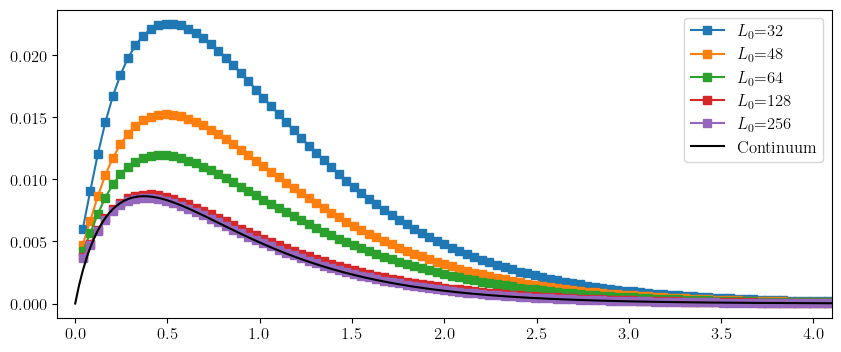

In [12]:
# periodic boundary conditions, kappa = 0.245, L = 256

fig, ax = plt.subplots(figsize=(10, 4))

L0 = 32
xm_lattice = [0.04081632653061229, 0.08163265306122458, 0.12244897959183687, 0.16326530612244916, 0.20408163265306145, 0.24489795918367374, 0.28571428571428603, 0.3265306122448983, 0.3673469387755106, 0.4081632653061229, 0.4489795918367352, 0.4897959183673475, 0.5306122448979598, 0.5714285714285721, 0.6122448979591844, 0.6530612244897966, 0.6938775510204089, 0.7346938775510212, 0.7755102040816335, 0.8163265306122458, 0.8571428571428581, 0.8979591836734704, 0.9387755102040827, 0.979591836734695, 1.0204081632653073, 1.0612244897959195, 1.1020408163265318, 1.1428571428571441, 1.1836734693877564, 1.2244897959183687, 1.265306122448981, 1.3061224489795933, 1.3469387755102056, 1.3877551020408179, 1.4285714285714302, 1.4693877551020424, 1.5102040816326547, 1.551020408163267, 1.5918367346938793, 1.6326530612244916, 1.673469387755104, 1.7142857142857162, 1.7551020408163285, 1.7959183673469408, 1.836734693877553, 1.8775510204081653, 1.9183673469387776, 1.95918367346939, 2.000000000000002, 2.0408163265306145, 2.081632653061227, 2.122448979591839, 2.1632653061224514, 2.2040816326530637, 2.244897959183676, 2.2857142857142883, 2.3265306122449005, 2.367346938775513, 2.408163265306125, 2.4489795918367374, 2.4897959183673497, 2.530612244897962, 2.5714285714285743, 2.6122448979591866, 2.653061224489799, 2.693877551020411, 2.7346938775510234, 2.7755102040816357, 2.816326530612248, 2.8571428571428603, 2.8979591836734726, 2.938775510204085, 2.979591836734697, 3.0204081632653095, 3.0612244897959218, 3.102040816326534, 3.1428571428571463, 3.1836734693877586, 3.224489795918371, 3.265306122448983, 3.3061224489795955, 3.346938775510208, 3.38775510204082, 3.4285714285714324, 3.4693877551020447, 3.510204081632657, 3.5510204081632692, 3.5918367346938815, 3.632653061224494, 3.673469387755106, 3.7142857142857184, 3.7551020408163307, 3.795918367346943, 3.8367346938775553, 3.8775510204081676, 3.91836734693878, 3.959183673469392, 4.000000000000004, 4.040816326530617, 4.081632653061229, 4.122448979591841, 4.163265306122454, 4.204081632653066, 4.244897959183678, 4.28571428571429, 4.326530612244903, 4.3673469387755155, 4.408163265306127, 4.448979591836739, 4.489795918367352, 4.530612244897965, 4.5714285714285765, 4.612244897959188, 4.653061224489801, 4.693877551020414, 4.734693877551026, 4.7755102040816375, 4.81632653061225, 4.857142857142863, 4.897959183673475, 4.938775510204087, 4.979591836734699, 5.020408163265312, 5.061224489795924, 5.102040816326536, 5.142857142857149, 5.183673469387761]
xG00_lattice = [0.005997559183673479, 0.009079248979591845, 0.012038595918367364, 0.01460244897959185, 0.01672326530612247, 0.018433224489795938, 0.019781714285714305, 0.02081893877551023, 0.02158346938775513, 0.02210857142857145, 0.022431020408163294, 0.022572734693877577, 0.022562057142857174, 0.02242160000000002, 0.022169632653061253, 0.021826089795918387, 0.021402861224489818, 0.02091673469387758, 0.020379865306122468, 0.019801551020408193, 0.019192371428571445, 0.01855973877551022, 0.01791089795918369, 0.017252081632653085, 0.01658928571428573, 0.015925902040816346, 0.015267012244897975, 0.014614628571428586, 0.013972555102040833, 0.013343020408163283, 0.012727081632653075, 0.01212786938775512, 0.011545285714285723, 0.010980195918367358, 0.010434428571428584, 0.009906906122448992, 0.009399510204081644, 0.008910767346938785, 0.008441669387755113, 0.0079926530612245, 0.007562408163265316, 0.00715165714285715, 0.0067587224489796, 0.0063835918367347, 0.0060270612244898, 0.005687421224489801, 0.005364273061224495, 0.005057064489795924, 0.004765560000000004, 0.004488897959183678, 0.004226546938775515, 0.0039781061224489845, 0.003742838367346943, 0.00352018285714286, 0.0033097428571428602, 0.0031107657142857175, 0.0029228669387755144, 0.0027454122448979613, 0.002578059183673471, 0.0024202530612244936, 0.0022712665306122482, 0.002131003265306125, 0.0019987200000000007, 0.001874468571428574, 0.0017573877551020432, 0.0016473600000000033, 0.0015436800000000006, 0.0014459297959183702, 0.0013545404081632677, 0.0012690285714285737, 0.0011879314285714294, 0.0011115624489795935, 0.0010411885714285724, 0.0009742628571428583, 0.0009112163265306126, 0.0008523911836734706, 0.000797229714285715, 0.0007455399183673477, 0.0006970218367346946, 0.00065159836734694, 0.0006090671020408173, 0.0005692473469387765, 0.000531958857142858, 0.000497005714285715, 0.00046439836734693904, 0.0004338050612244901, 0.00040510040816326554, 0.00037837844897959207, 0.00035338448979591866, 0.00032996571428571477, 0.00030807771428571464, 0.0002876708571428575, 0.000268568816326531, 0.00025070759183673486, 0.0002341420408163267, 0.00021855085714285742, 0.00020410383673469417, 0.00019059200000000012, 0.00017792522448979627, 0.0001662693877551022, 0.00015526791836734702, 0.00014508146938775523, 0.00013560685714285732, 0.00012677642448979606, 0.00011858742857142865, 0.00011098070204081637, 0.0001039218938775512, 9.738866938775516e-05, 9.135712653061235e-05, 8.577306122448988e-05, 8.063764897959192e-05, 7.590765714285721e-05, 7.158204081632656e-05, 6.762945306122455e-05, 6.401697959183677e-05, 6.077074285714295e-05, 5.782569795918371e-05, 5.520666122448984e-05, 5.2892342857142946e-05, 5.087608163265313e-05, 4.913488979591844e-05, 4.7692538775510266e-05, 4.650906122448986e-05, 4.5623902040816384e-05, 4.4995918367347005e-05, 4.4648228571428634e-05, 4.45712979591837e-05]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L_0$={L0}', marker='s')
L0 = 48
xm_lattice = [0.04081632653061229, 0.08163265306122458, 0.12244897959183687, 0.16326530612244916, 0.20408163265306145, 0.24489795918367374, 0.28571428571428603, 0.3265306122448983, 0.3673469387755106, 0.4081632653061229, 0.4489795918367352, 0.4897959183673475, 0.5306122448979598, 0.5714285714285721, 0.6122448979591844, 0.6530612244897966, 0.6938775510204089, 0.7346938775510212, 0.7755102040816335, 0.8163265306122458, 0.8571428571428581, 0.8979591836734704, 0.9387755102040827, 0.979591836734695, 1.0204081632653073, 1.0612244897959195, 1.1020408163265318, 1.1428571428571441, 1.1836734693877564, 1.2244897959183687, 1.265306122448981, 1.3061224489795933, 1.3469387755102056, 1.3877551020408179, 1.4285714285714302, 1.4693877551020424, 1.5102040816326547, 1.551020408163267, 1.5918367346938793, 1.6326530612244916, 1.673469387755104, 1.7142857142857162, 1.7551020408163285, 1.7959183673469408, 1.836734693877553, 1.8775510204081653, 1.9183673469387776, 1.95918367346939, 2.000000000000002, 2.0408163265306145, 2.081632653061227, 2.122448979591839, 2.1632653061224514, 2.2040816326530637, 2.244897959183676, 2.2857142857142883, 2.3265306122449005, 2.367346938775513, 2.408163265306125, 2.4489795918367374, 2.4897959183673497, 2.530612244897962, 2.5714285714285743, 2.6122448979591866, 2.653061224489799, 2.693877551020411, 2.7346938775510234, 2.7755102040816357, 2.816326530612248, 2.8571428571428603, 2.8979591836734726, 2.938775510204085, 2.979591836734697, 3.0204081632653095, 3.0612244897959218, 3.102040816326534, 3.1428571428571463, 3.1836734693877586, 3.224489795918371, 3.265306122448983, 3.3061224489795955, 3.346938775510208, 3.38775510204082, 3.4285714285714324, 3.4693877551020447, 3.510204081632657, 3.5510204081632692, 3.5918367346938815, 3.632653061224494, 3.673469387755106, 3.7142857142857184, 3.7551020408163307, 3.795918367346943, 3.8367346938775553, 3.8775510204081676, 3.91836734693878, 3.959183673469392, 4.000000000000004, 4.040816326530617, 4.081632653061229, 4.122448979591841, 4.163265306122454, 4.204081632653066, 4.244897959183678, 4.28571428571429, 4.326530612244903, 4.3673469387755155, 4.408163265306127, 4.448979591836739, 4.489795918367352, 4.530612244897965, 4.5714285714285765, 4.612244897959188, 4.653061224489801, 4.693877551020414, 4.734693877551026, 4.7755102040816375, 4.81632653061225, 4.857142857142863, 4.897959183673475, 4.938775510204087, 4.979591836734699, 5.020408163265312, 5.061224489795924, 5.102040816326536, 5.142857142857149, 5.183673469387761]
xG00_lattice = [0.00472619020408163, 0.006679982040816333, 0.008648578775510214, 0.010355748571428586, 0.01173957142857144, 0.012835420408163281, 0.013680628571428584, 0.014314253061224507, 0.014765987755102062, 0.015062204081632677, 0.015226334693877571, 0.015278008163265324, 0.015232073469387781, 0.015106285714285732, 0.014910306122448994, 0.014656653061224505, 0.01435514693877552, 0.014015020408163282, 0.013643783673469405, 0.013247183673469403, 0.012832542857142868, 0.012402432653061238, 0.011964318367346953, 0.011520685714285724, 0.011074591836734702, 0.01062933061224491, 0.010187595918367355, 0.009750628571428582, 0.009321191836734704, 0.00889995918367348, 0.00848906530612246, 0.008088032653061232, 0.007699371428571437, 0.007322115102040825, 0.0069572571428571485, 0.0066057355102040905, 0.006267014693877557, 0.005941276734693883, 0.005628702857142862, 0.0053289632653061286, 0.005042213469387763, 0.004767994285714291, 0.004506066530612251, 0.004256344489795923, 0.004018242857142862, 0.0037917518367346988, 0.0035762971428571462, 0.0033714808163265346, 0.0031771000000000043, 0.0029926734693877573, 0.0028178853061224525, 0.002652148571428575, 0.0024952400000000036, 0.0023467959183673492, 0.0022063979591836758, 0.002073897142857145, 0.0019486089795918396, 0.0018303616326530627, 0.001718706122448982, 0.0016134367346938793, 0.0015142440816326543, 0.0014207616326530632, 0.0013325914285714307, 0.001249630040816328, 0.0011715997959183687, 0.0010981915102040829, 0.0010290926530612257, 0.0009641456326530621, 0.000903108612244899, 0.0008457600000000011, 0.0007919021224489805, 0.000741314938775511, 0.0006938337142857151, 0.0006492760000000008, 0.0006074571428571435, 0.0005682535510204088, 0.000531472857142858, 0.0004970255510204086, 0.000464697346938776, 0.00043444244897959233, 0.00040605134693877593, 0.00037949934693877604, 0.00035464375510204114, 0.000331354285714286, 0.0003095734693877554, 0.0002891565714285716, 0.00027010481632653086, 0.00025226187755102077, 0.00023557755102040842, 0.00021997102040816332, 0.00020541114285714293, 0.00019178057142857173, 0.00017905422857142876, 0.0001671715183673471, 0.00015607491836734717, 0.00014571742040816346, 0.00013605536734693897, 0.00012704200000000025, 0.00011863877142857148, 0.00011080408163265318, 0.00010350727346938778, 9.671223673469407e-05, 9.039322040816332e-05, 8.451464489795932e-05, 7.905600000000009e-05, 7.39849714285715e-05, 6.928359183673472e-05, 6.493268571428584e-05, 6.090475102040826e-05, 5.718518367346943e-05, 5.375843265306128e-05, 5.060434285714294e-05, 4.772889387755108e-05, 4.508676734693887e-05, 4.2672979591836806e-05, 4.049867755102046e-05, 3.855555918367353e-05, 3.6804440816326586e-05, 3.527111428571431e-05, 3.392522448979592e-05, 3.27618612244898e-05, 3.178971428571433e-05, 3.101407346938781e-05, 3.0415934693877604e-05, 3.000000000000005e-05, 2.9770971428571482e-05, 2.970866938775515e-05]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L_0$={L0}', marker='s')
L0 = 64
xm_lattice = [0.04081632653061229, 0.08163265306122458, 0.12244897959183687, 0.16326530612244916, 0.20408163265306145, 0.24489795918367374, 0.28571428571428603, 0.3265306122448983, 0.3673469387755106, 0.4081632653061229, 0.4489795918367352, 0.4897959183673475, 0.5306122448979598, 0.5714285714285721, 0.6122448979591844, 0.6530612244897966, 0.6938775510204089, 0.7346938775510212, 0.7755102040816335, 0.8163265306122458, 0.8571428571428581, 0.8979591836734704, 0.9387755102040827, 0.979591836734695, 1.0204081632653073, 1.0612244897959195, 1.1020408163265318, 1.1428571428571441, 1.1836734693877564, 1.2244897959183687, 1.265306122448981, 1.3061224489795933, 1.3469387755102056, 1.3877551020408179, 1.4285714285714302, 1.4693877551020424, 1.5102040816326547, 1.551020408163267, 1.5918367346938793, 1.6326530612244916, 1.673469387755104, 1.7142857142857162, 1.7551020408163285, 1.7959183673469408, 1.836734693877553, 1.8775510204081653, 1.9183673469387776, 1.95918367346939, 2.000000000000002, 2.0408163265306145, 2.081632653061227, 2.122448979591839, 2.1632653061224514, 2.2040816326530637, 2.244897959183676, 2.2857142857142883, 2.3265306122449005, 2.367346938775513, 2.408163265306125, 2.4489795918367374, 2.4897959183673497, 2.530612244897962, 2.5714285714285743, 2.6122448979591866, 2.653061224489799, 2.693877551020411, 2.7346938775510234, 2.7755102040816357, 2.816326530612248, 2.8571428571428603, 2.8979591836734726, 2.938775510204085, 2.979591836734697, 3.0204081632653095, 3.0612244897959218, 3.102040816326534, 3.1428571428571463, 3.1836734693877586, 3.224489795918371, 3.265306122448983, 3.3061224489795955, 3.346938775510208, 3.38775510204082, 3.4285714285714324, 3.4693877551020447, 3.510204081632657, 3.5510204081632692, 3.5918367346938815, 3.632653061224494, 3.673469387755106, 3.7142857142857184, 3.7551020408163307, 3.795918367346943, 3.8367346938775553, 3.8775510204081676, 3.91836734693878, 3.959183673469392, 4.000000000000004, 4.040816326530617, 4.081632653061229, 4.122448979591841, 4.163265306122454, 4.204081632653066, 4.244897959183678, 4.28571428571429, 4.326530612244903, 4.3673469387755155, 4.408163265306127, 4.448979591836739, 4.489795918367352, 4.530612244897965, 4.5714285714285765, 4.612244897959188, 4.653061224489801, 4.693877551020414, 4.734693877551026, 4.7755102040816375, 4.81632653061225, 4.857142857142863, 4.897959183673475, 4.938775510204087, 4.979591836734699, 5.020408163265312, 5.061224489795924, 5.102040816326536, 5.142857142857149, 5.183673469387761]
xG00_lattice = [0.004197234938775512, 0.005675366530612252, 0.007217653224489801, 0.008542847346938779, 0.009598939591836744, 0.010407797387755114, 0.011012154285714294, 0.011442083265306137, 0.011729270204081642, 0.011896448979591846, 0.011963824489795931, 0.011947640816326542, 0.011859926530612257, 0.011715200000000018, 0.011522326530612257, 0.011290122448979605, 0.01102608897959185, 0.01073689714285716, 0.010427960000000017, 0.010103559183673482, 0.009768437142857153, 0.009425662040816333, 0.009079085714285725, 0.008730357551020416, 0.008382795918367355, 0.008037671836734704, 0.007695738367346944, 0.007359154285714293, 0.007030322040816337, 0.006708195918367355, 0.00639435102040817, 0.0060894693877551085, 0.005793978367346945, 0.00550806938775511, 0.005232014285714292, 0.004965898775510209, 0.004710009387755106, 0.00446408489795919, 0.004228316326530618, 0.004002334693877556, 0.0037862914285714338, 0.0035797714285714334, 0.0033827661224489825, 0.0031949387755102073, 0.0030159734693877577, 0.0028457477551020443, 0.0026837959183673497, 0.002529952653061226, 0.0023839000000000017, 0.0022453673469387775, 0.0021141061224489817, 0.0019897110204081647, 0.0018719600000000026, 0.0017605102040816347, 0.001655208163265308, 0.0015556274285714305, 0.0014616568163265328, 0.0013729239183673482, 0.0012891740816326545, 0.0012102097959183686, 0.0011357751836734709, 0.0010656053877551035, 0.0009995117142857148, 0.0009372969795918381, 0.0008787522448979602, 0.0008236665306122457, 0.0007718509387755112, 0.0007231425306122455, 0.0006773603265306131, 0.000634345714285715, 0.0005939483265306129, 0.0005560075102040824, 0.000520382734693878, 0.00048694718367346993, 0.0004556204081632658, 0.0004262017959183678, 0.0003986148571428576, 0.000372754040816327, 0.00034853510204081685, 0.0003258318367346942, 0.0003045500816326535, 0.0002846337142857145, 0.0002659929795918372, 0.00024851314285714317, 0.0002321887755102043, 0.00021688182040816348, 0.00020257719183673493, 0.0001891924571428574, 0.00017668280000000016, 0.0001649843265306124, 0.0001540522285714287, 0.0001438354285714287, 0.00013429275918367355, 0.00012537758367346948, 0.00011705395918367359, 0.00010928953469387768, 0.00010204162448979601, 9.528040000000009e-05, 8.897594693877561e-05, 8.310408163265316e-05, 7.762983673469393e-05, 7.253532244897965e-05, 6.779375918367353e-05, 6.338608979591844e-05, 5.929071428571439e-05, 5.548862040816332e-05, 5.196356734693886e-05, 4.869742040816331e-05, 4.567767346938779e-05, 4.288967346938779e-05, 4.032108979591842e-05, 3.795885714285716e-05, 3.579240408163267e-05, 3.381240000000003e-05, 3.2014591836734726e-05, 3.0383477551020423e-05, 2.8914902448979618e-05, 2.760544979591839e-05, 2.64476285714286e-05, 2.5437453061224514e-05, 2.4570655102040838e-05, 2.3845074285714288e-05, 2.3258195510204112e-05, 2.2808661224489803e-05, 2.249607142857145e-05, 2.2320977142857174e-05, 2.2284197551020425e-05]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L_0$={L0}', marker='s')
L0 = 128
xm_lattice = [0.04081632653061229, 0.08163265306122458, 0.12244897959183687, 0.16326530612244916, 0.20408163265306145, 0.24489795918367374, 0.28571428571428603, 0.3265306122448983, 0.3673469387755106, 0.4081632653061229, 0.4489795918367352, 0.4897959183673475, 0.5306122448979598, 0.5714285714285721, 0.6122448979591844, 0.6530612244897966, 0.6938775510204089, 0.7346938775510212, 0.7755102040816335, 0.8163265306122458, 0.8571428571428581, 0.8979591836734704, 0.9387755102040827, 0.979591836734695, 1.0204081632653073, 1.0612244897959195, 1.1020408163265318, 1.1428571428571441, 1.1836734693877564, 1.2244897959183687, 1.265306122448981, 1.3061224489795933, 1.3469387755102056, 1.3877551020408179, 1.4285714285714302, 1.4693877551020424, 1.5102040816326547, 1.551020408163267, 1.5918367346938793, 1.6326530612244916, 1.673469387755104, 1.7142857142857162, 1.7551020408163285, 1.7959183673469408, 1.836734693877553, 1.8775510204081653, 1.9183673469387776, 1.95918367346939, 2.000000000000002, 2.0408163265306145, 2.081632653061227, 2.122448979591839, 2.1632653061224514, 2.2040816326530637, 2.244897959183676, 2.2857142857142883, 2.3265306122449005, 2.367346938775513, 2.408163265306125, 2.4489795918367374, 2.4897959183673497, 2.530612244897962, 2.5714285714285743, 2.6122448979591866, 2.653061224489799, 2.693877551020411, 2.7346938775510234, 2.7755102040816357, 2.816326530612248, 2.8571428571428603, 2.8979591836734726, 2.938775510204085, 2.979591836734697, 3.0204081632653095, 3.0612244897959218, 3.102040816326534, 3.1428571428571463, 3.1836734693877586, 3.224489795918371, 3.265306122448983, 3.3061224489795955, 3.346938775510208, 3.38775510204082, 3.4285714285714324, 3.4693877551020447, 3.510204081632657, 3.5510204081632692, 3.5918367346938815, 3.632653061224494, 3.673469387755106, 3.7142857142857184, 3.7551020408163307, 3.795918367346943, 3.8367346938775553, 3.8775510204081676, 3.91836734693878, 3.959183673469392, 4.000000000000004, 4.040816326530617, 4.081632653061229, 4.122448979591841, 4.163265306122454, 4.204081632653066, 4.244897959183678, 4.28571428571429, 4.326530612244903, 4.3673469387755155, 4.408163265306127, 4.448979591836739, 4.489795918367352, 4.530612244897965, 4.5714285714285765, 4.612244897959188, 4.653061224489801, 4.693877551020414, 4.734693877551026, 4.7755102040816375, 4.81632653061225, 4.857142857142863, 4.897959183673475, 4.938775510204087, 4.979591836734699, 5.020408163265312, 5.061224489795924, 5.102040816326536, 5.142857142857149, 5.183673469387761]
xG00_lattice = [0.0037305135934693904, 0.004773260336326539, 0.005916951477551031, 0.006886111673469395, 0.0076168308163265365, 0.008136837071020418, 0.008485116057142866, 0.008691635069387764, 0.008787613878367356, 0.008790229387755111, 0.008723435970857143, 0.00859764564244899, 0.00842550702367348, 0.008218386857142865, 0.007984505510204092, 0.007730757877551026, 0.007462125020408168, 0.007184439918367352, 0.006901305632653067, 0.006614959183673476, 0.006328974857142866, 0.006046046285714292, 0.005766774040816332, 0.005493389387755107, 0.005226318367346946, 0.004966226040816334, 0.004714692612244902, 0.004471802285714294, 0.004237790122448986, 0.004012824489795923, 0.003796816734693882, 0.003590127020408165, 0.00339249697959184, 0.0032039018775510235, 0.003023918571428576, 0.0028525694693877584, 0.0026896160816326565, 0.0025350048163265337, 0.002388073469387758, 0.0022488261224489813, 0.0021167312653061245, 0.001991717142857146, 0.0018734748979591868, 0.0017616073469387777, 0.0016558457142857158, 0.0015560035102040837, 0.0014617191836734712, 0.0013729038367346963, 0.0012890280000000015, 0.001209914285714287, 0.00113544318367347, 0.0010653017142857153, 0.0009992317142857154, 0.0009370675102040831, 0.0008785691020408173, 0.0008235778285714299, 0.0007718504938775513, 0.0007232100489795925, 0.0006775497387755113, 0.0006346381224489803, 0.000594328726530613, 0.0005564920081632659, 0.0005209680857142866, 0.0004876282775510212, 0.00045636287755102114, 0.00042704074285714337, 0.00039951525714285754, 0.00037370995918367396, 0.0003495585061224495, 0.00032686400000000044, 0.00030564166938775535, 0.00028574302040816336, 0.0002671114693877555, 0.00024965244081632686, 0.00023331397959183695, 0.00021801701224489822, 0.00020369737142857163, 0.0001902964408163267, 0.00017775677142857165, 0.00016602514285714304, 0.00015505284489795946, 0.00014478957551020428, 0.00013519514285714304, 0.00012621737142857155, 0.0001178325510204083, 0.00010999505306122464, 0.00010266994285714295, 9.582984489795927e-05, 8.943591836734704e-05, 8.345975510204089e-05, 7.788411428571436e-05, 7.268184000000006e-05, 6.782406489795923e-05, 6.329054530612251e-05, 5.9055528571428634e-05, 5.511426612244903e-05, 5.143502204081639e-05, 4.8007600000000086e-05, 4.4811885306122535e-05, 4.183514285714291e-05, 3.906581061224497e-05, 3.648719020408168e-05, 3.4089678775510244e-05, 3.186093061224495e-05, 2.9791114285714315e-05, 2.7871120816326556e-05, 2.6090661632653097e-05, 2.444295673469391e-05, 2.2919051836734715e-05, 2.151240816326534e-05, 2.0216905714285734e-05, 1.9025782857142876e-05, 1.793480653061227e-05, 1.6937561632653078e-05, 1.6030953061224515e-05, 1.5209351836734705e-05, 1.4470798775510217e-05, 1.381134612244899e-05, 1.32285742857143e-05, 1.2720146938775522e-05, 1.2283623673469406e-05, 1.1918304489795938e-05, 1.1622194693877561e-05, 1.1396004897959192e-05, 1.1238418367346946e-05, 1.1149508571428583e-05, 1.113085020408164e-05]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L_0$={L0}', marker='s')
L0 = 256
xm_lattice = [0.04081632653061229, 0.08163265306122458, 0.12244897959183687, 0.16326530612244916, 0.20408163265306145, 0.24489795918367374, 0.28571428571428603, 0.3265306122448983, 0.3673469387755106, 0.4081632653061229, 0.4489795918367352, 0.4897959183673475, 0.5306122448979598, 0.5714285714285721, 0.6122448979591844, 0.6530612244897966, 0.6938775510204089, 0.7346938775510212, 0.7755102040816335, 0.8163265306122458, 0.8571428571428581, 0.8979591836734704, 0.9387755102040827, 0.979591836734695, 1.0204081632653073, 1.0612244897959195, 1.1020408163265318, 1.1428571428571441, 1.1836734693877564, 1.2244897959183687, 1.265306122448981, 1.3061224489795933, 1.3469387755102056, 1.3877551020408179, 1.4285714285714302, 1.4693877551020424, 1.5102040816326547, 1.551020408163267, 1.5918367346938793, 1.6326530612244916, 1.673469387755104, 1.7142857142857162, 1.7551020408163285, 1.7959183673469408, 1.836734693877553, 1.8775510204081653, 1.9183673469387776, 1.95918367346939, 2.000000000000002, 2.0408163265306145, 2.081632653061227, 2.122448979591839, 2.1632653061224514, 2.2040816326530637, 2.244897959183676, 2.2857142857142883, 2.3265306122449005, 2.367346938775513, 2.408163265306125, 2.4489795918367374, 2.4897959183673497, 2.530612244897962, 2.5714285714285743, 2.6122448979591866, 2.653061224489799, 2.693877551020411, 2.7346938775510234, 2.7755102040816357, 2.816326530612248, 2.8571428571428603, 2.8979591836734726, 2.938775510204085, 2.979591836734697, 3.0204081632653095, 3.0612244897959218, 3.102040816326534, 3.1428571428571463, 3.1836734693877586, 3.224489795918371, 3.265306122448983, 3.3061224489795955, 3.346938775510208, 3.38775510204082, 3.4285714285714324, 3.4693877551020447, 3.510204081632657, 3.5510204081632692, 3.5918367346938815, 3.632653061224494, 3.673469387755106, 3.7142857142857184, 3.7551020408163307, 3.795918367346943, 3.8367346938775553, 3.8775510204081676, 3.91836734693878, 3.959183673469392, 4.000000000000004, 4.040816326530617, 4.081632653061229, 4.122448979591841, 4.163265306122454, 4.204081632653066, 4.244897959183678, 4.28571428571429, 4.326530612244903, 4.3673469387755155, 4.408163265306127, 4.448979591836739, 4.489795918367352, 4.530612244897965, 4.5714285714285765, 4.612244897959188, 4.653061224489801, 4.693877551020414, 4.734693877551026, 4.7755102040816375, 4.81632653061225, 4.857142857142863, 4.897959183673475, 4.938775510204087, 4.979591836734699, 5.020408163265312, 5.061224489795924, 5.102040816326536, 5.142857142857149, 5.183673469387761]
xG00_lattice = [0.0036909868475673616, 0.004702349023281637, 0.005813933322171429, 0.006751722579983681, 0.007454969600693889, 0.007949259230497963, 0.00827202123354286, 0.008456889141681639, 0.008532065867363265, 0.00851713532318368, 0.008432129675918382, 0.008291039276669396, 0.008106279663273475, 0.007887411209462864, 0.007643249797714297, 0.007380507227350209, 0.007105137936383681, 0.006821299576065313, 0.00653361737316735, 0.006243947308032651, 0.0059561148426857165, 0.005672172445926537, 0.005392655591893889, 0.005120184184946945, 0.0048551980210204135, 0.004598076901387762, 0.004350324392081634, 0.0041112530217142906, 0.0038819529848979637, 0.0036625295118367374, 0.003452565930448983, 0.0032522063059591873, 0.0030613357823265357, 0.0028797225549387784, 0.0027072875200000036, 0.0025438021214693914, 0.0023888373640000033, 0.0022419841501224494, 0.002103420961836737, 0.001972457185306122, 0.0018488431174285744, 0.0017322466611428594, 0.001622424401755103, 0.0015188940674285725, 0.001421572334693879, 0.0013300538627755115, 0.0012440100769795922, 0.0011631731128163272, 0.0010872604720000008, 0.0010160165081632658, 0.0009491839291836746, 0.0008865123067755111, 0.0008278195772244909, 0.0007728168849795927, 0.0007212916453061229, 0.0006730950880000017, 0.0006279442015102049, 0.0005857370356734698, 0.0005462534096734699, 0.0005093263934693884, 0.00047481473048979636, 0.000442567111918368, 0.0004124316702857151, 0.00038430893453061287, 0.0003580481887755104, 0.00033349508791836736, 0.00031061890510204136, 0.0002892421049795922, 0.00026931646285714304, 0.00025073582571428615, 0.00023339358791836737, 0.00021721550106122478, 0.00020215618261224495, 0.00018810490408163285, 0.00017500928265306144, 0.00016281076734693897, 0.00015144604200000017, 0.00014085673297959197, 0.00013099318575510217, 0.0001218082775510206, 0.00011325691763265307, 0.00010529994857142874, 9.788790648979602e-05, 9.098703428571437e-05, 8.456865795918378e-05, 7.859420653061227e-05, 7.30387655510205e-05, 6.786764016326538e-05, 6.306078653061239e-05, 5.858652857142861e-05, 5.442836285714293e-05, 5.056264424489803e-05, 4.6970781183673507e-05, 4.362930579591843e-05, 4.052580959183676e-05, 3.764614138775518e-05, 3.4967106367347e-05, 3.248025600000005e-05, 3.017142183673474e-05, 2.8029453061224532e-05, 2.6042165673469422e-05, 2.4199812244897995e-05, 2.249175055102043e-05, 2.0909697926530644e-05, 1.944559114285717e-05, 1.8091052881632673e-05, 1.6839302314285743e-05, 1.5683720326530627e-05, 1.4617902800000016e-05, 1.3636786204081646e-05, 1.2735350767346956e-05, 1.1908097371428585e-05, 1.1151831171428591e-05, 1.0462186212244906e-05, 9.835499387755113e-06, 9.268810497959197e-06, 8.759385514285727e-06, 8.304728261224494e-06, 7.90279194285715e-06, 7.55138057142858e-06, 7.249424106122459e-06, 6.995628889795926e-06, 6.789378097959195e-06, 6.629117942857147e-06, 6.51547857142858e-06, 6.44764217142858e-06, 6.427276648979596e-06]
ax.plot(xm_lattice, xG00_lattice, label=rf'$L_0$={L0}', marker='s')

scale = 1/(4*np.pi)
ax.plot(xm_values, scale*np.array(integral_values), label='Continuum', color='black')

ax.set_xlim(-0.1, 4.1)
ax.legend()